# Comprehensive Exploratory Data Analysis (EDA)
## Cardio Train & Credit Card Datasets

This notebook provides a complete exploratory data analysis for both datasets:
1. **Cardio Train Dataset** - Cardiovascular disease prediction
2. **Credit Card Dataset** - Credit card fraud detection

## 1. Import Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, normaltest
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

## 2. Load Datasets

In [92]:
# Load Cardio Train dataset
cardio_df = pd.read_csv(r'E:\thong\code\cls_review\data\raw\cardio_train.csv', sep=';')
print("Cardio Train Dataset Loaded")
print(f"Shape: {cardio_df.shape}")

# Load Credit Card dataset
credit_df = pd.read_csv(r'E:\thong\code\cls_review\data\raw\creditcard.csv')
print("\nCredit Card Dataset Loaded")
print(f"Shape: {credit_df.shape}")

Cardio Train Dataset Loaded
Shape: (70000, 13)

Credit Card Dataset Loaded
Shape: (284807, 31)


---
# Part 1: CARDIO TRAIN DATASET ANALYSIS
---

## 3. Cardio Dataset - Basic Information

In [93]:
# First few rows
print("First 5 rows:")
display(cardio_df.head())

print("\nLast 5 rows:")
display(cardio_df.tail())

First 5 rows:


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168 62.0000    110     80            1     1      0   
1   1  20228       1     156 85.0000    140     90            3     1      0   
2   2  18857       1     165 64.0000    130     70            3     1      0   
3   3  17623       2     169 82.0000    150    100            1     1      0   
4   4  17474       1     156 56.0000    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0


Last 5 rows:


id    age  gender  height   weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168  76.0000    120     80            1     1   
69996  99995  22601       1     158 126.0000    140     90            2     2   
69997  99996  19066       2     183 105.0000    180     90            3     1   
69998  99998  22431       1     163  72.0000    135     80            1     2   
69999  99999  20540       1     170  72.0000    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

In [94]:
# Dataset info
print("Dataset Info:")
cardio_df.info()

print("\nColumn Names:")
print(cardio_df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

Column Names:
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [95]:
# Statistical summary
print("Statistical Summary:")
display(cardio_df.describe())

print("\nStatistical Summary (All columns including categorical):")
display(cardio_df.describe(include='all'))

Statistical Summary:


id        age     gender     height     weight      ap_hi  \
count 70000.0000 70000.0000 70000.0000 70000.0000 70000.0000 70000.0000   
mean  49972.4199 19468.8658     1.3496   164.3592    74.2057   128.8173   
std   28851.3023  2467.2517     0.4768     8.2101    14.3958   154.0114   
min       0.0000 10798.0000     1.0000    55.0000    10.0000  -150.0000   
25%   25006.7500 17664.0000     1.0000   159.0000    65.0000   120.0000   
50%   50001.5000 19703.0000     1.0000   165.0000    72.0000   120.0000   
75%   74889.2500 21327.0000     2.0000   170.0000    82.0000   140.0000   
max   99999.0000 23713.0000     2.0000   250.0000   200.0000 16020.0000   

           ap_lo  cholesterol       gluc      smoke       alco     active  \
count 70000.0000   70000.0000 70000.0000 70000.0000 70000.0000 70000.0000   
mean     96.6304       1.3669     1.2265     0.0881     0.0538     0.8037   
std     188.4725       0.6803     0.5723     0.2835     0.2256     0.3972   
min     -70.0000       1.0000     1.0000     0.0000     0.0000     0.0000   
25%      80.0000       1.0000     1.0000     0.0000     0.0000     1.0000   
50%      80.0000       1.0000     1.0000     0.0000     0.0000     1.0000   
75%      90.0000       2.0000     1.0000     0.0000     0.0000     1.0000   
max   11000.0000       3.0000     3.0000     1.0000     1.0000     1.0000   

          cardio  
count 70000.0000  
mean      0.4997  
std       0.5000  
min       0.0000  
25%       0.0000  
50%       0.0000  
75%       1.0000  
max       1.0000


Statistical Summary (All columns including categorical):


id        age     gender     height     weight      ap_hi  \
count 70000.0000 70000.0000 70000.0000 70000.0000 70000.0000 70000.0000   
mean  49972.4199 19468.8658     1.3496   164.3592    74.2057   128.8173   
std   28851.3023  2467.2517     0.4768     8.2101    14.3958   154.0114   
min       0.0000 10798.0000     1.0000    55.0000    10.0000  -150.0000   
25%   25006.7500 17664.0000     1.0000   159.0000    65.0000   120.0000   
50%   50001.5000 19703.0000     1.0000   165.0000    72.0000   120.0000   
75%   74889.2500 21327.0000     2.0000   170.0000    82.0000   140.0000   
max   99999.0000 23713.0000     2.0000   250.0000   200.0000 16020.0000   

           ap_lo  cholesterol       gluc      smoke       alco     active  \
count 70000.0000   70000.0000 70000.0000 70000.0000 70000.0000 70000.0000   
mean     96.6304       1.3669     1.2265     0.0881     0.0538     0.8037   
std     188.4725       0.6803     0.5723     0.2835     0.2256     0.3972   
min     -70.0000       1.0000     1.0000     0.0000     0.0000     0.0000   
25%      80.0000       1.0000     1.0000     0.0000     0.0000     1.0000   
50%      80.0000       1.0000     1.0000     0.0000     0.0000     1.0000   
75%      90.0000       2.0000     1.0000     0.0000     0.0000     1.0000   
max   11000.0000       3.0000     3.0000     1.0000     1.0000     1.0000   

          cardio  
count 70000.0000  
mean      0.4997  
std       0.5000  
min       0.0000  
25%       0.0000  
50%       0.0000  
75%       1.0000  
max       1.0000

## 4. Cardio Dataset - Data Quality Check

In [96]:
# Missing values
print("Missing Values:")
missing = pd.DataFrame({
    'Column': cardio_df.columns,
    'Missing_Count': cardio_df.isnull().sum(),
    'Missing_Percentage': (cardio_df.isnull().sum() / len(cardio_df) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
display(missing)

if len(missing) == 0:
    print("✓ No missing values found!")

Missing Values:


Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []

✓ No missing values found!


In [97]:
# Duplicate rows
duplicates = cardio_df.duplicated().sum()
print(f"Duplicate Rows: {duplicates} ({duplicates/len(cardio_df)*100:.2f}%)")

if duplicates > 0:
    print("\nSample duplicate rows:")
    display(cardio_df[cardio_df.duplicated(keep=False)].head(10))

Duplicate Rows: 0 (0.00%)


In [98]:
# Data types
print("Data Types:")
dtypes_df = pd.DataFrame({
    'Column': cardio_df.dtypes.index,
    'Data_Type': cardio_df.dtypes.values,
    'Unique_Values': [cardio_df[col].nunique() for col in cardio_df.columns]
})
display(dtypes_df)

Data Types:


Column Data_Type  Unique_Values
0            id     int64          70000
1           age     int64           8076
2        gender     int64              2
3        height     int64            109
4        weight   float64            287
5         ap_hi     int64            153
6         ap_lo     int64            157
7   cholesterol     int64              3
8          gluc     int64              3
9         smoke     int64              2
10         alco     int64              2
11       active     int64              2
12       cardio     int64              2

## 5. Cardio Dataset - Target Variable Analysis

Target Variable: cardio

Value Counts:
cardio
0    35021
1    34979
Name: count, dtype: int64

Percentage Distribution:
cardio
0   50.0300
1   49.9700
Name: proportion, dtype: float64


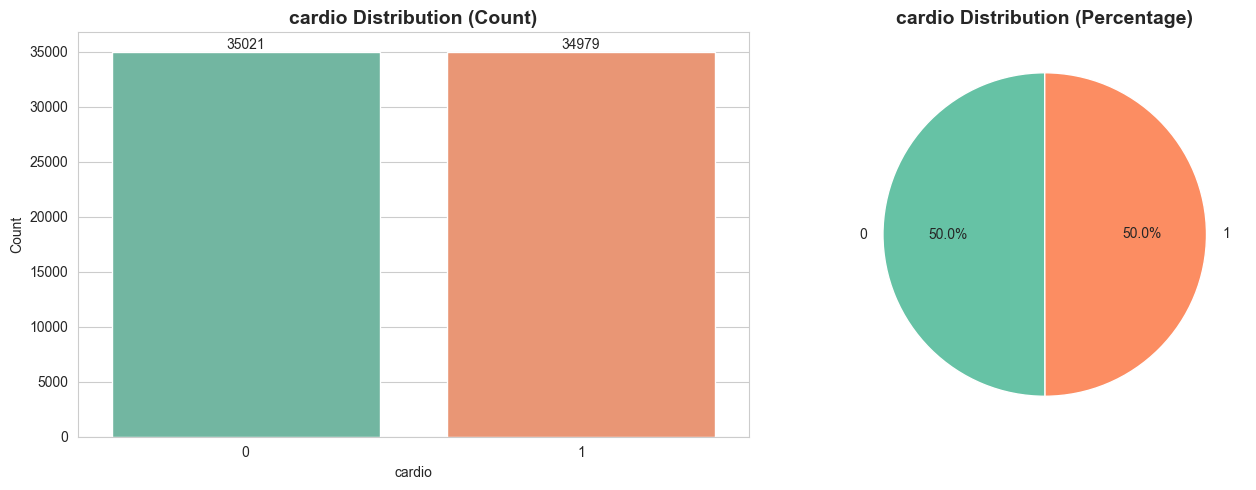


Class Imbalance Ratio: 1.00:1


In [99]:
# Target variable distribution
target_col = 'cardio'

print(f"Target Variable: {target_col}")
print("\nValue Counts:")
value_counts = cardio_df[target_col].value_counts()
print(value_counts)

print("\nPercentage Distribution:")
print(cardio_df[target_col].value_counts(normalize=True) * 100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=cardio_df, x=target_col, ax=axes[0], palette='Set2')
axes[0].set_title(f'{target_col} Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(target_col)
axes[0].set_ylabel('Count')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title(f'{target_col} Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class imbalance ratio
if len(value_counts) == 2:
    ratio = value_counts.max() / value_counts.min()
    print(f"\nClass Imbalance Ratio: {ratio:.2f}:1")

## 6. Cardio Dataset - Feature Engineering & Derived Features

In [100]:
# Create age in years (age is in days)
cardio_df['age_years'] = (cardio_df['age'] / 365.25).round(1)

# Create BMI
cardio_df['bmi'] = cardio_df['weight'] / ((cardio_df['height'] / 100) ** 2)

# Create pulse pressure
cardio_df['pulse_pressure'] = cardio_df['ap_hi'] - cardio_df['ap_lo']

# Create mean arterial pressure
cardio_df['mean_arterial_pressure'] = (cardio_df['ap_hi'] + 2 * cardio_df['ap_lo']) / 3

# BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

cardio_df['bmi_category'] = cardio_df['bmi'].apply(categorize_bmi)

# Age groups
cardio_df['age_group'] = pd.cut(cardio_df['age_years'], 
                                 bins=[0, 40, 50, 60, 100],
                                 labels=['<40', '40-50', '50-60', '60+'])

print("Derived features created:")
print("- age_years: Age in years")
print("- bmi: Body Mass Index")
print("- pulse_pressure: Systolic - Diastolic BP")
print("- mean_arterial_pressure: MAP")
print("- bmi_category: BMI classification")
print("- age_group: Age groups")

display(cardio_df[['age_years', 'bmi', 'pulse_pressure', 'mean_arterial_pressure', 'bmi_category', 'age_group']].head())

Derived features created:
- age_years: Age in years
- bmi: Body Mass Index
- pulse_pressure: Systolic - Diastolic BP
- mean_arterial_pressure: MAP
- bmi_category: BMI classification
- age_group: Age groups


age_years     bmi  pulse_pressure  mean_arterial_pressure bmi_category  \
0    50.4000 21.9671              30                 90.0000       Normal   
1    55.4000 34.9277              50                106.6667        Obese   
2    51.6000 23.5078              60                 90.0000       Normal   
3    48.2000 28.7105              50                116.6667   Overweight   
4    47.8000 23.0112              40                 73.3333       Normal   

  age_group  
0     50-60  
1     50-60  
2     50-60  
3     40-50  
4     40-50

## 7. Cardio Dataset - Univariate Analysis (Numerical Features)

In [101]:
# Identify numerical columns
numerical_cols = cardio_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['id', 'cardio']]

print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")

Numerical Features (15): ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'pulse_pressure', 'mean_arterial_pressure']


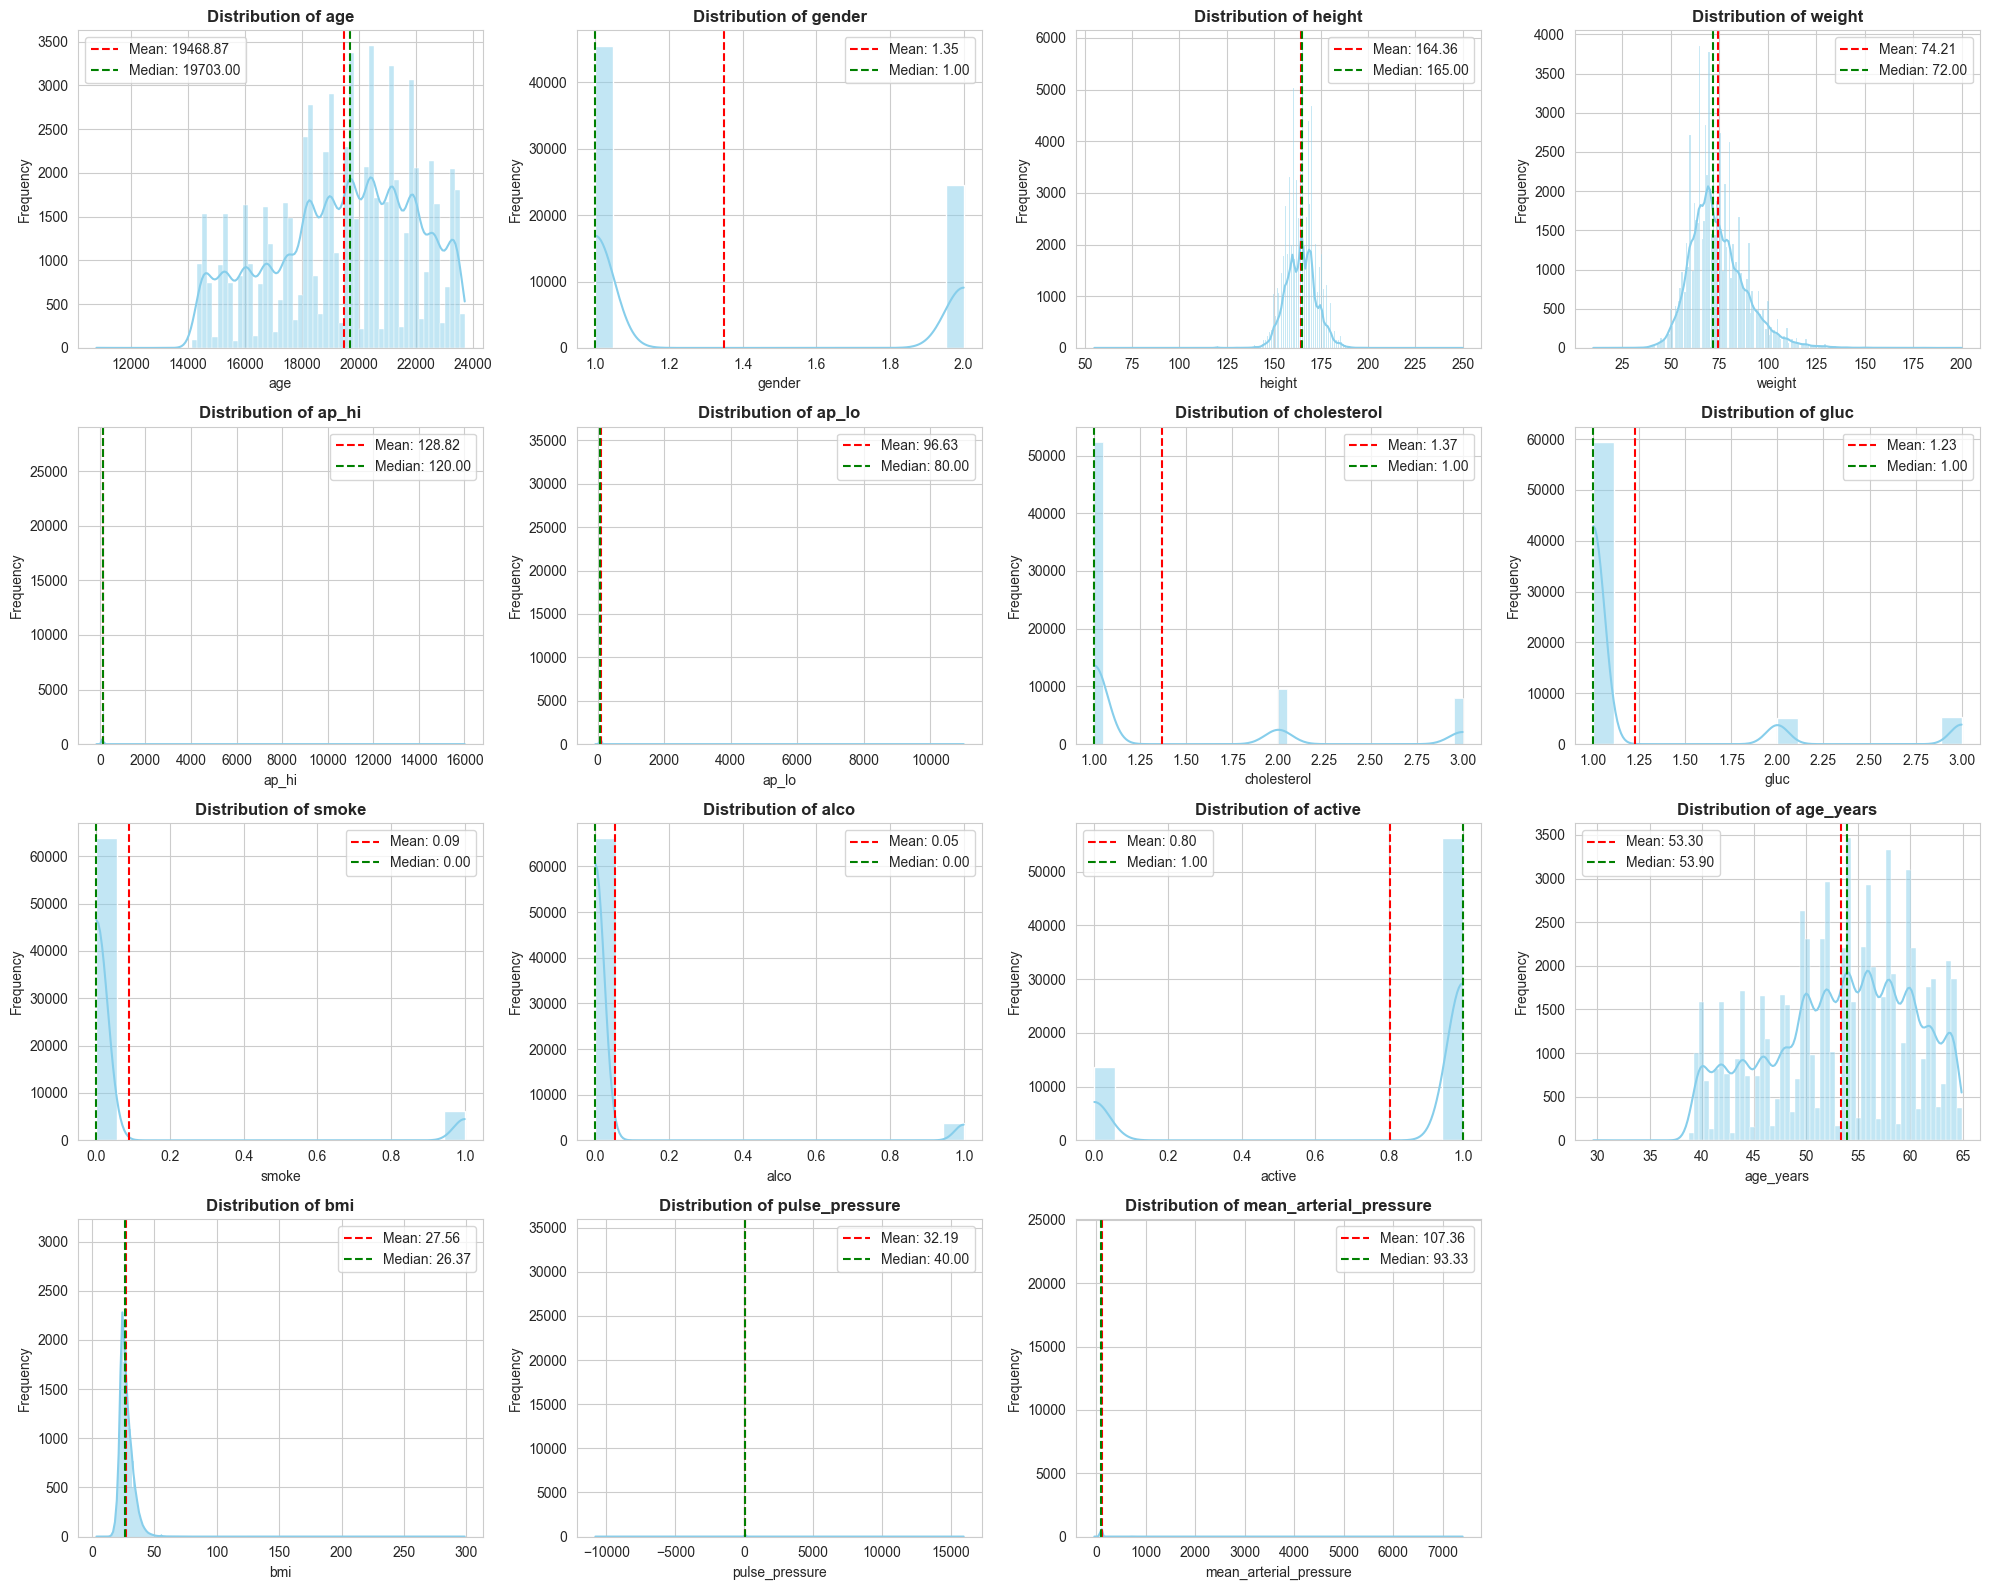

In [102]:
# Distribution plots for numerical features
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(cardio_df[col], kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add statistics
    mean_val = cardio_df[col].mean()
    median_val = cardio_df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

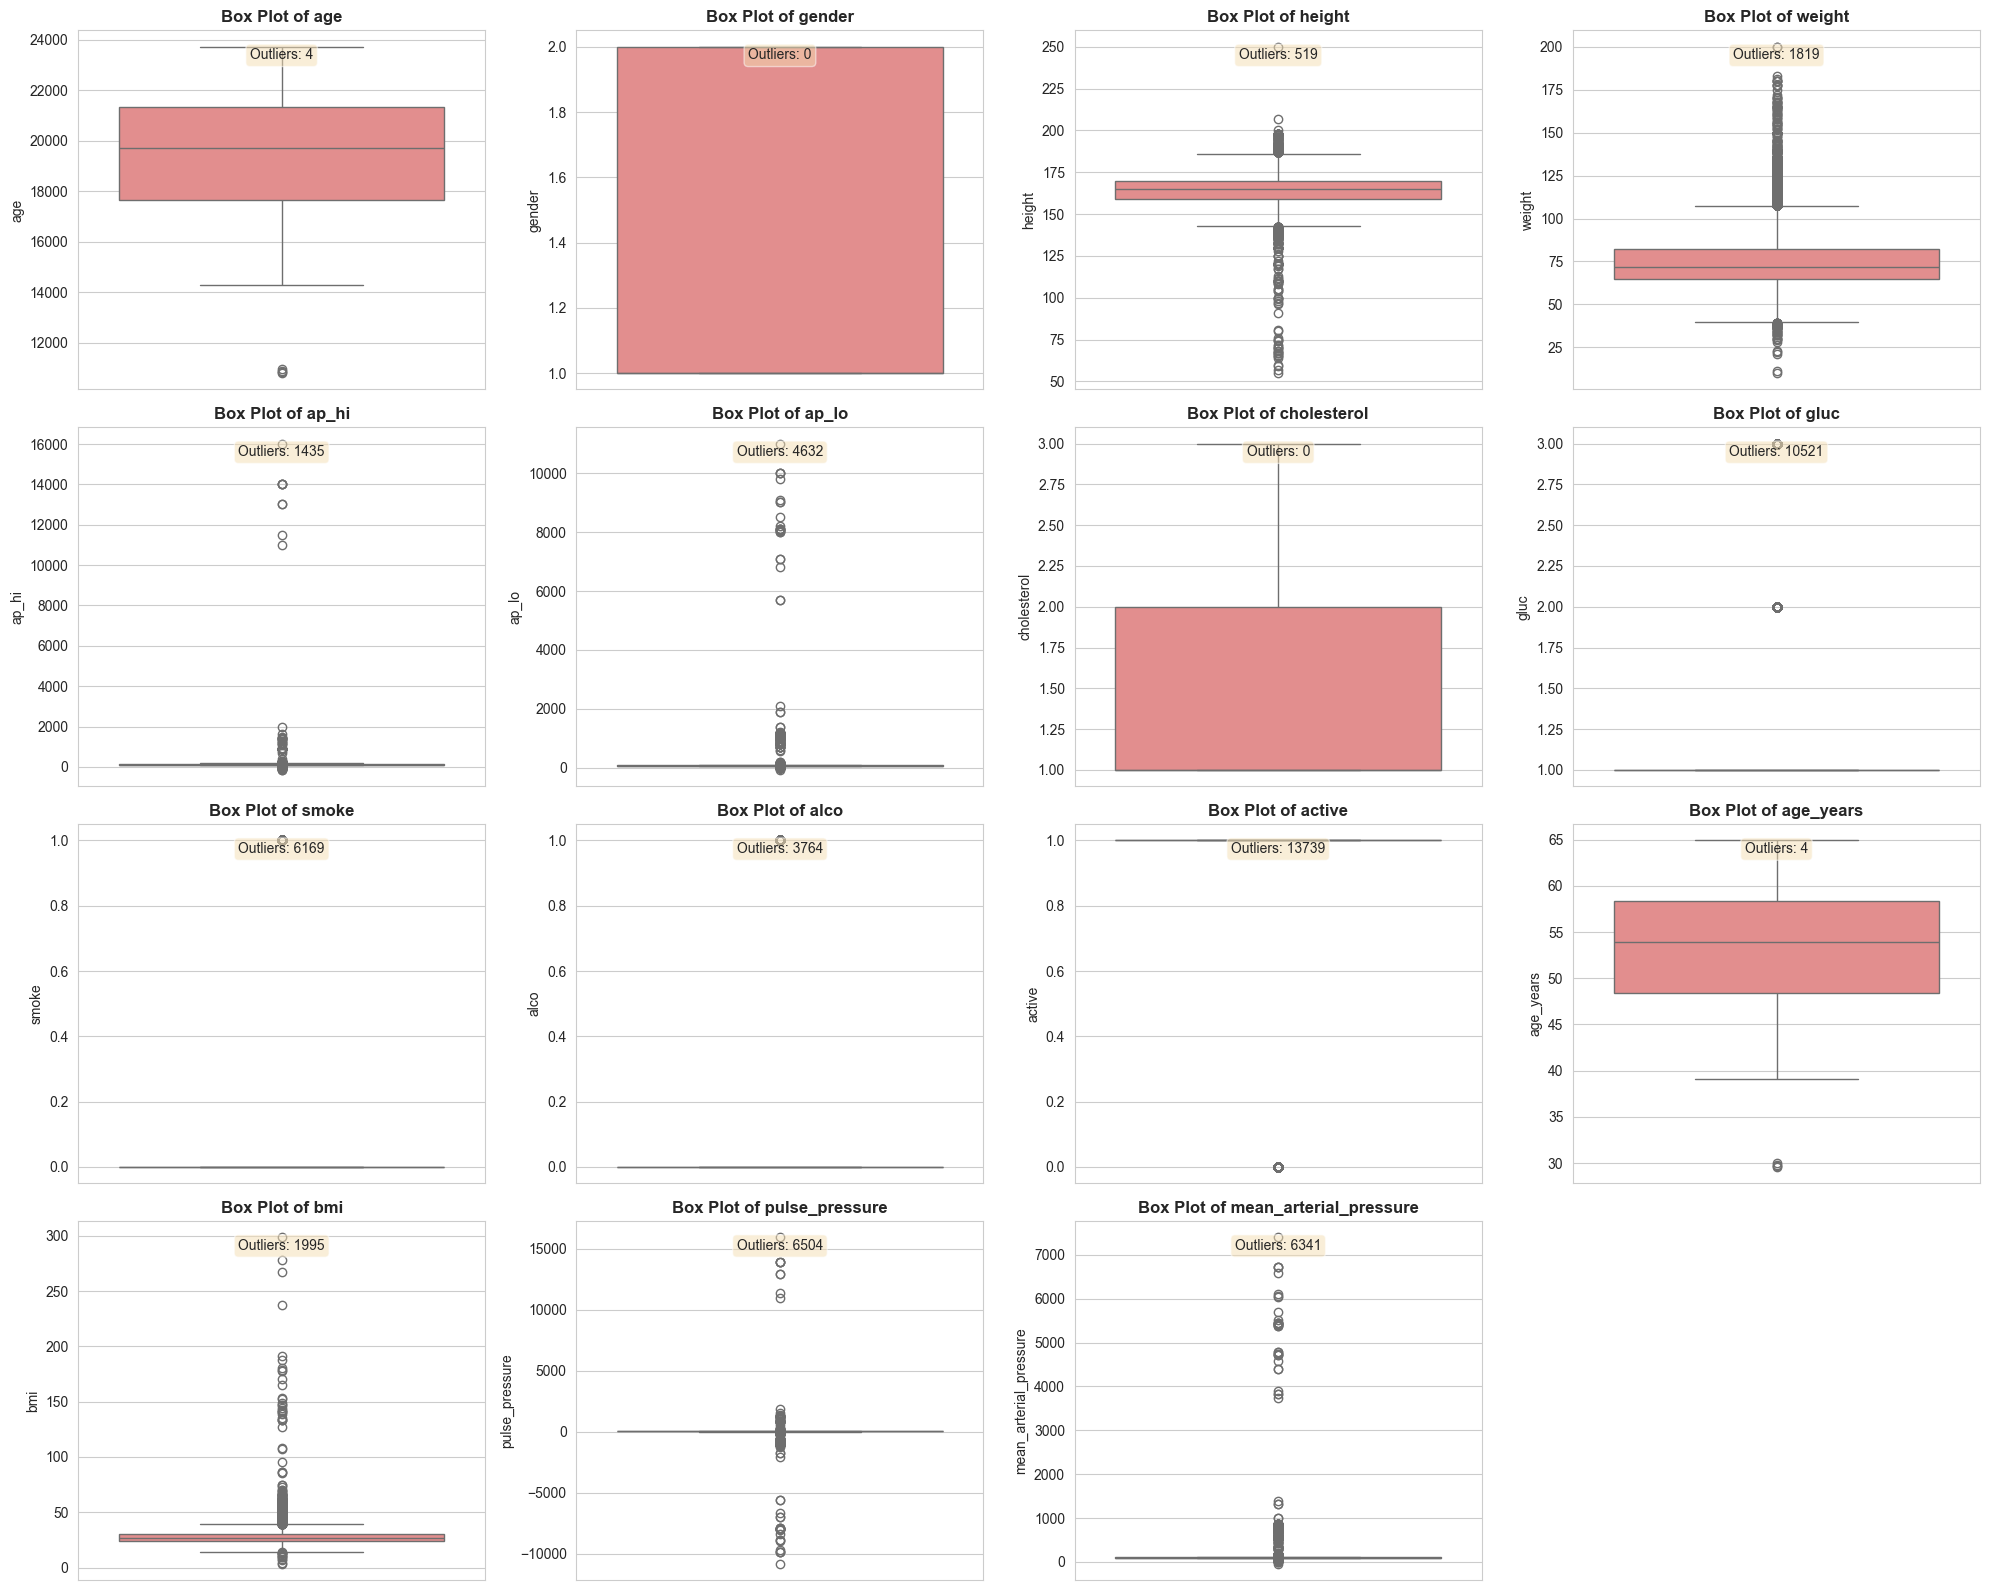

In [103]:
# Box plots for outlier detection
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=cardio_df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Box Plot of {col}', fontweight='bold')
    axes[idx].set_ylabel(col)
    
    # Calculate outliers
    Q1 = cardio_df[col].quantile(0.25)
    Q3 = cardio_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((cardio_df[col] < (Q1 - 1.5 * IQR)) | (cardio_df[col] > (Q3 + 1.5 * IQR))).sum()
    axes[idx].text(0.5, 0.95, f'Outliers: {outliers}', 
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [104]:
# Statistical summary for numerical features
stats_summary = cardio_df[numerical_cols].describe().T
stats_summary['skewness'] = cardio_df[numerical_cols].skew()
stats_summary['kurtosis'] = cardio_df[numerical_cols].kurtosis()
stats_summary['cv'] = (stats_summary['std'] / stats_summary['mean'] * 100).round(2)  # Coefficient of variation

print("\nDetailed Statistical Summary:")
display(stats_summary)


Detailed Statistical Summary:


count       mean       std         min        25%  \
age                    70000.0000 19468.8658 2467.2517  10798.0000 17664.0000   
gender                 70000.0000     1.3496    0.4768      1.0000     1.0000   
height                 70000.0000   164.3592    8.2101     55.0000   159.0000   
weight                 70000.0000    74.2057   14.3958     10.0000    65.0000   
ap_hi                  70000.0000   128.8173  154.0114   -150.0000   120.0000   
ap_lo                  70000.0000    96.6304  188.4725    -70.0000    80.0000   
cholesterol            70000.0000     1.3669    0.6803      1.0000     1.0000   
gluc                   70000.0000     1.2265    0.5723      1.0000     1.0000   
smoke                  70000.0000     0.0881    0.2835      0.0000     0.0000   
alco                   70000.0000     0.0538    0.2256      0.0000     0.0000   
active                 70000.0000     0.8037    0.3972      0.0000     1.0000   
age_years              70000.0000    53.3029    6.7551     29.6000    48.4000   
bmi                    70000.0000    27.5565    6.0915      3.4718    23.8751   
pulse_pressure         70000.0000    32.1869  241.4696 -10800.0000    40.0000   
mean_arterial_pressure 70000.0000   107.3594  136.4937    -41.6667    93.3333   

                              50%        75%        max  skewness  kurtosis  \
age                    19703.0000 21327.0000 23713.0000   -0.3071   -0.8234   
gender                     1.0000     2.0000     2.0000    0.6310   -1.6019   
height                   165.0000   170.0000   250.0000   -0.6422    7.9437   
weight                    72.0000    82.0000   200.0000    1.0121    2.5868   
ap_hi                    120.0000   140.0000 16020.0000   85.2962 7580.0747   
ap_lo                     80.0000    90.0000 11000.0000   32.1141 1425.9146   
cholesterol                1.0000     2.0000     3.0000    1.5871    0.9939   
gluc                       1.0000     1.0000     3.0000    2.3975    4.2944   
smoke                      0.0000     0.0000     1.0000    2.9059    6.4442   
alco                       0.0000     0.0000     1.0000    3.9566   13.6551   
active                     1.0000     1.0000     1.0000   -1.5295    0.3393   
age_years                 53.9000    58.4000    64.9000   -0.3071   -0.8234   
bmi                       26.3741    30.2222   298.6667    7.7284  221.2162   
pulse_pressure            40.0000    50.0000 15940.0000    7.0458 1783.8100   
mean_arterial_pressure    93.3333   103.3333  7400.0000   29.6609 1176.9753   

                             cv  
age                     12.6700  
gender                  35.3300  
height                   5.0000  
weight                  19.4000  
ap_hi                  119.5600  
ap_lo                  195.0400  
cholesterol             49.7700  
gluc                    46.6600  
smoke                  321.6700  
alco                   419.4900  
active                  49.4200  
age_years               12.6700  
bmi                     22.1100  
pulse_pressure         750.2100  
mean_arterial_pressure 127.1400

## 8. Cardio Dataset - Univariate Analysis (Categorical Features)

In [105]:
# Identify categorical columns
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category', 'age_group']
categorical_cols = [col for col in categorical_cols if col in cardio_df.columns]

print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols}")

Categorical Features (8): ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category', 'age_group']


In [106]:
# Value counts for categorical features
for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Feature: {col}")
    print(f"{'='*60}")
    value_counts = cardio_df[col].value_counts()
    percentage = cardio_df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentage.round(2)
    })
    display(summary)


Feature: gender


Count  Percentage
gender                   
1       45530     65.0400
2       24470     34.9600


Feature: cholesterol


Count  Percentage
cholesterol                   
1            52385     74.8400
2             9549     13.6400
3             8066     11.5200


Feature: gluc


Count  Percentage
gluc                   
1     59479     84.9700
3      5331      7.6200
2      5190      7.4100


Feature: smoke


Count  Percentage
smoke                   
0      63831     91.1900
1       6169      8.8100


Feature: alco


Count  Percentage
alco                   
0     66236     94.6200
1      3764      5.3800


Feature: active


Count  Percentage
active                   
1       56261     80.3700
0       13739     19.6300


Feature: bmi_category


Count  Percentage
bmi_category                   
Normal        25790     36.8400
Overweight    25086     35.8400
Obese         18474     26.3900
Underweight     650      0.9300


Feature: age_group


Count  Percentage
age_group                   
50-60      35613     50.8800
40-50      19894     28.4200
60+        12416     17.7400
<40         2077      2.9700

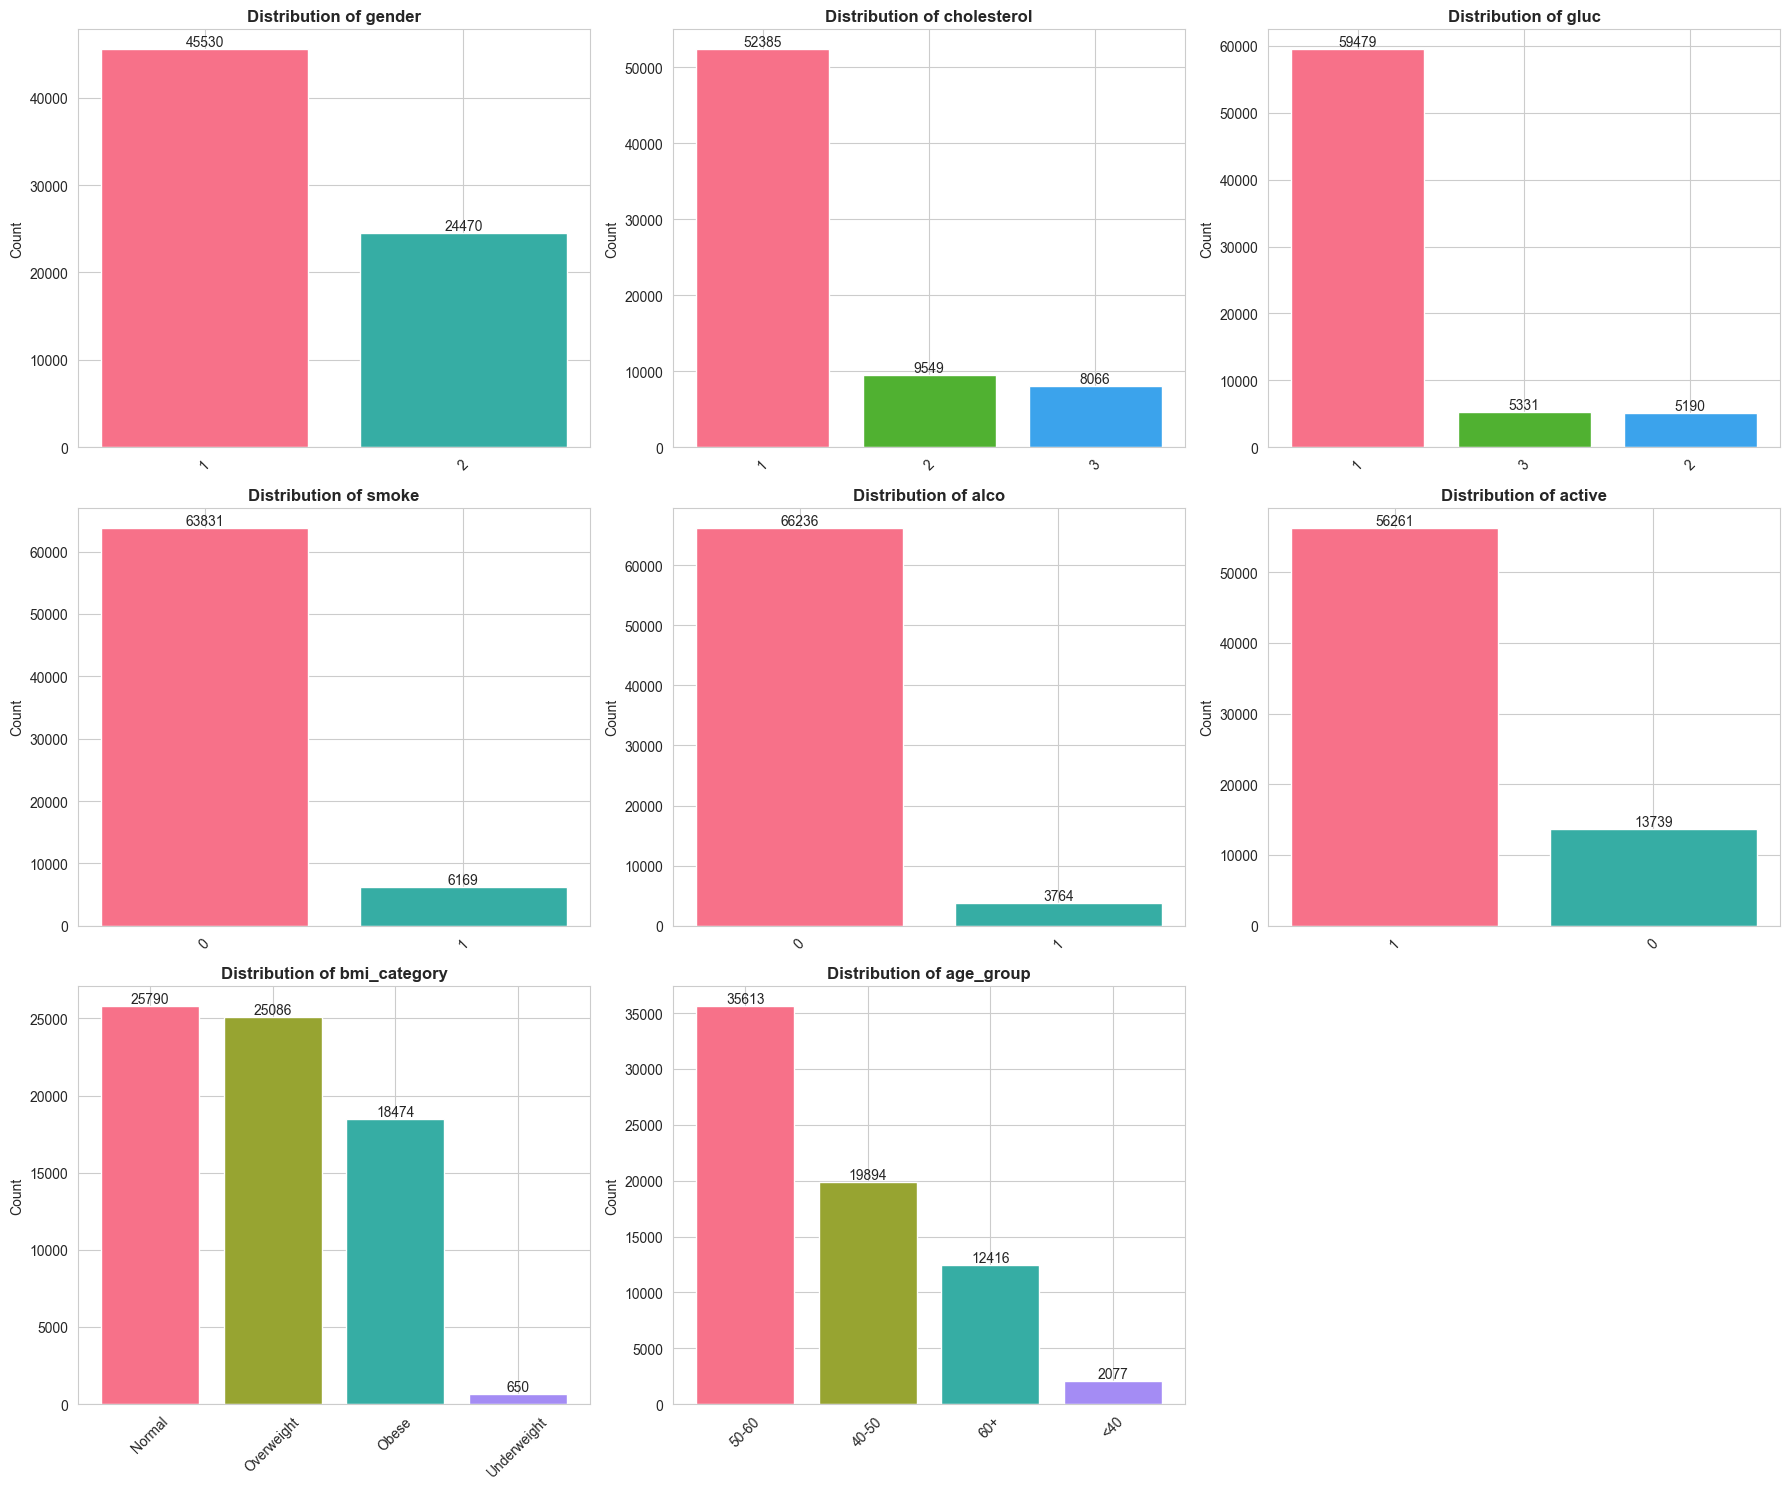

In [107]:
# Visualize categorical features
n_cols = 3
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    value_counts = cardio_df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color=sns.color_palette('husl', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_ylabel('Count')
    
    # Add value labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom')

for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 9. Cardio Dataset - Bivariate Analysis (Numerical vs Target)

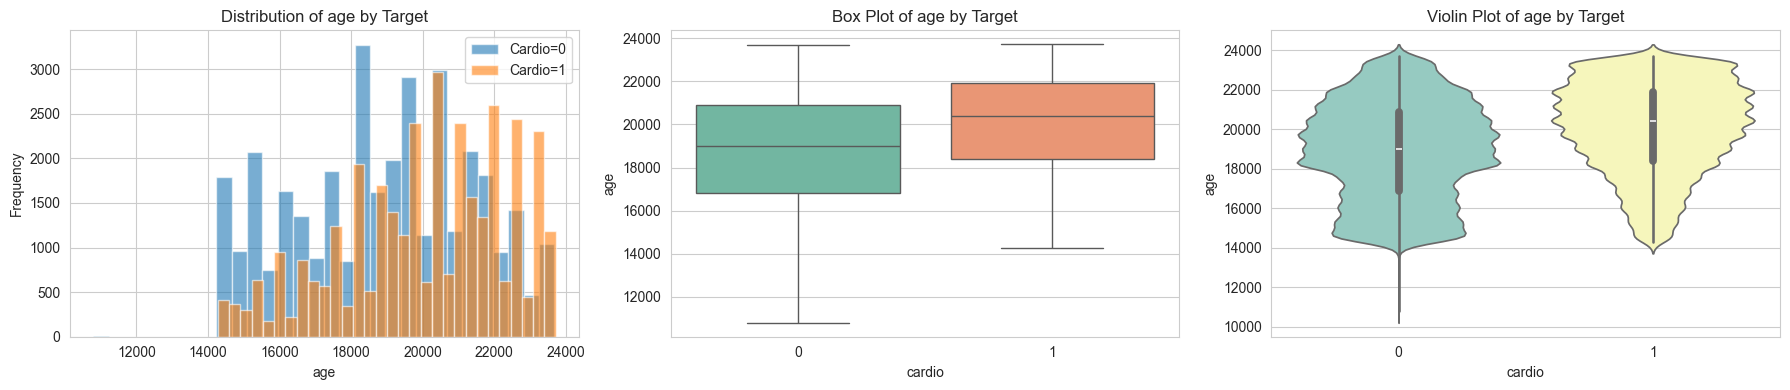


age:
  Mean (Cardio=0): 18881.6237
  Mean (Cardio=1): 20056.8130
  T-test p-value: 0.0000e+00
  Significant difference: Yes
------------------------------------------------------------


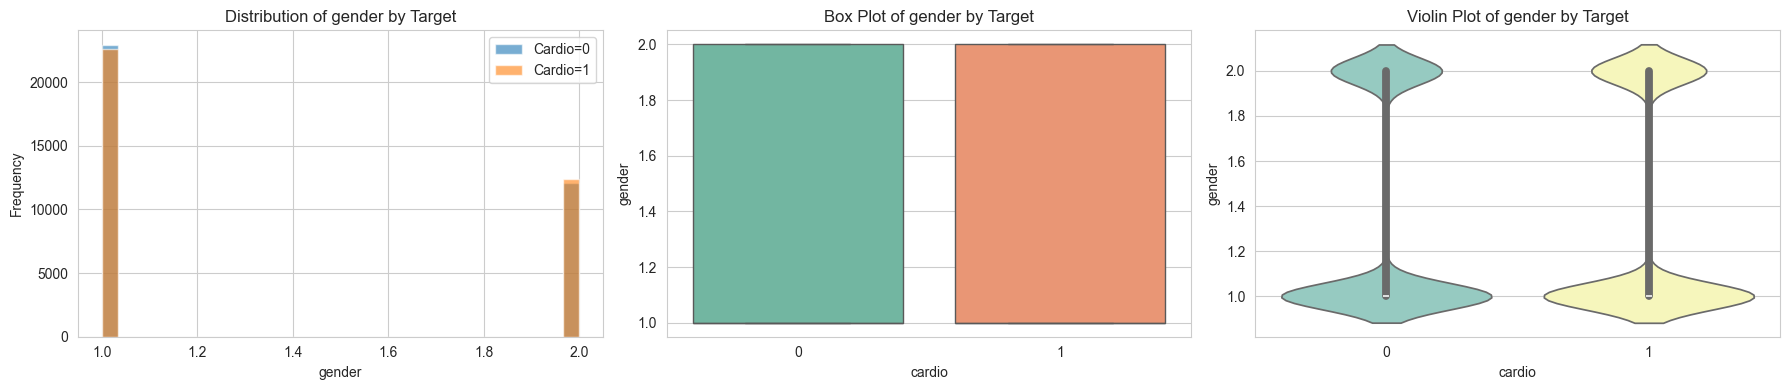


gender:
  Mean (Cardio=0): 1.3457
  Mean (Cardio=1): 1.3534
  T-test p-value: 3.1908e-02
  Significant difference: Yes
------------------------------------------------------------


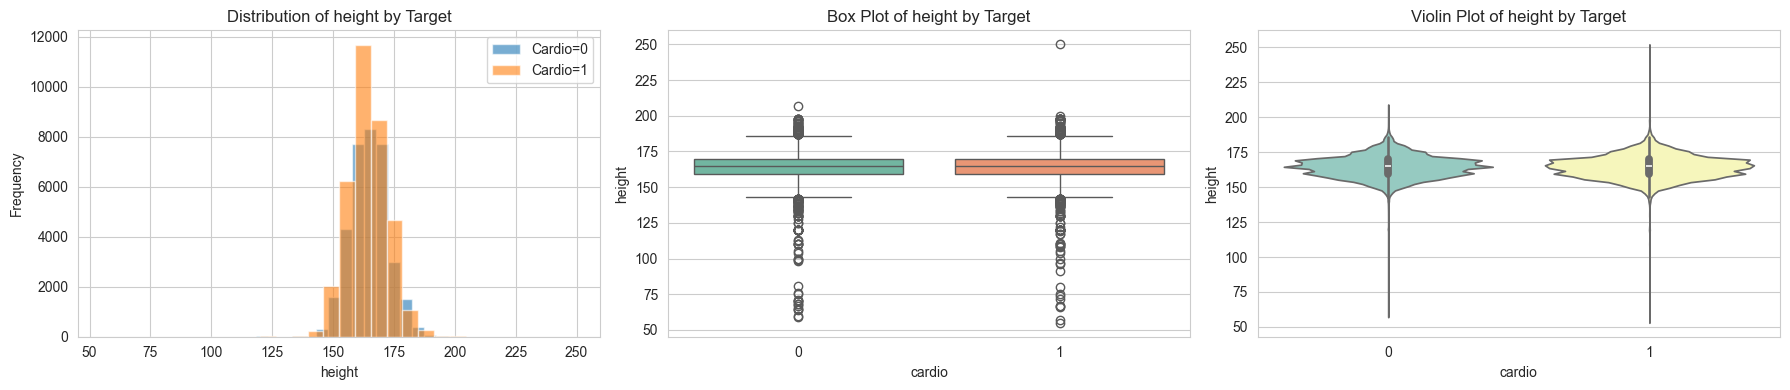


height:
  Mean (Cardio=0): 164.4480
  Mean (Cardio=1): 164.2703
  T-test p-value: 4.1963e-03
  Significant difference: Yes
------------------------------------------------------------


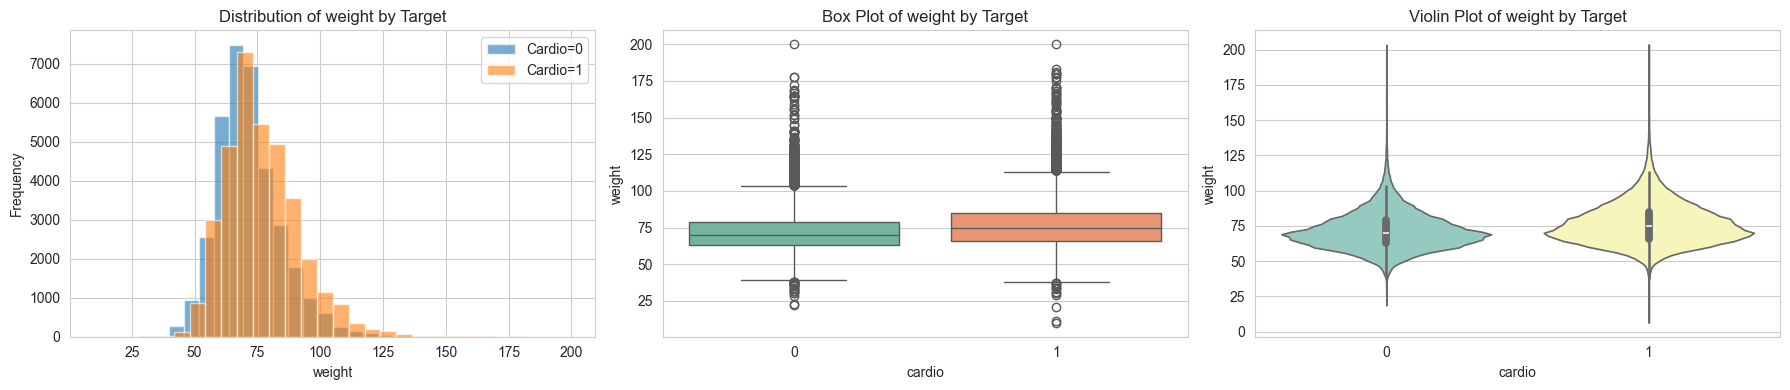


weight:
  Mean (Cardio=0): 71.5922
  Mean (Cardio=1): 76.8224
  T-test p-value: 0.0000e+00
  Significant difference: Yes
------------------------------------------------------------


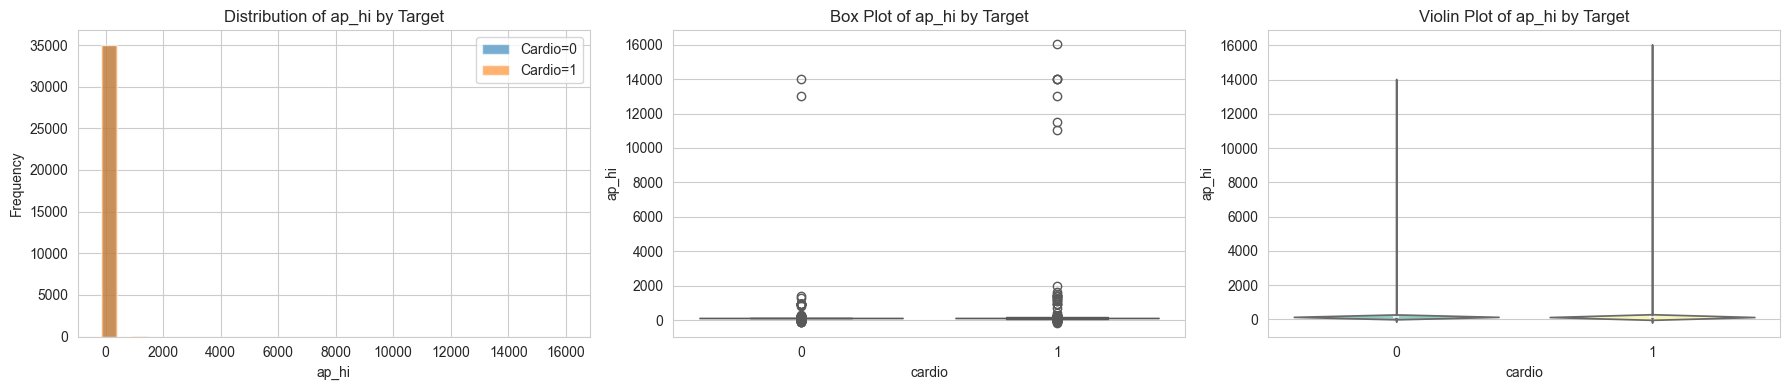


ap_hi:
  Mean (Cardio=0): 120.4326
  Mean (Cardio=1): 137.2120
  T-test p-value: 3.6981e-47
  Significant difference: Yes
------------------------------------------------------------


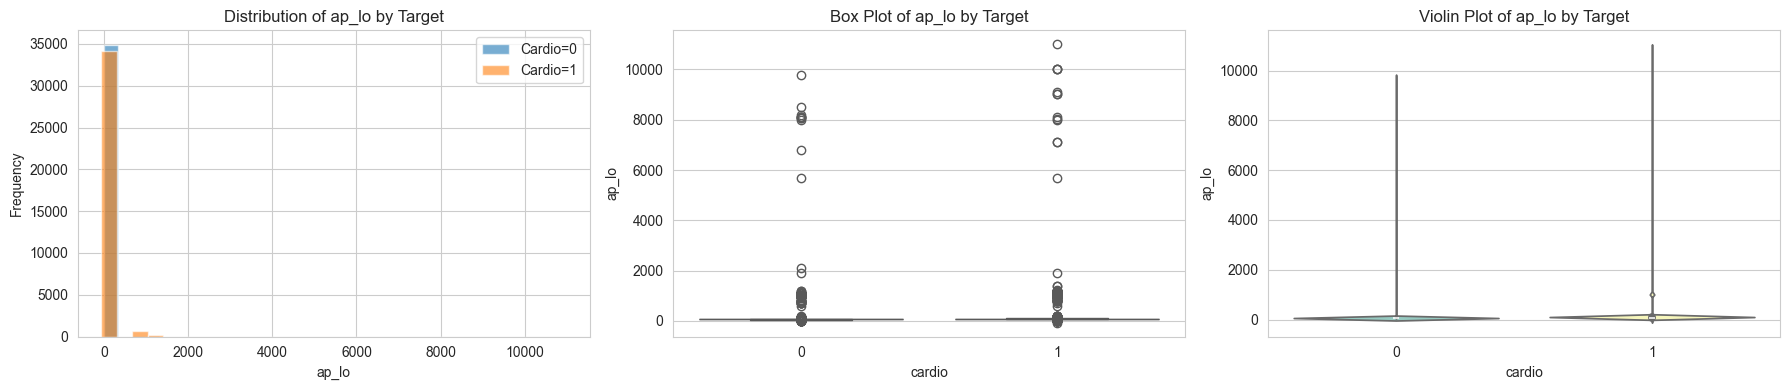


ap_lo:
  Mean (Cardio=0): 84.2518
  Mean (Cardio=1): 109.0239
  T-test p-value: 7.4246e-68
  Significant difference: Yes
------------------------------------------------------------


In [108]:
# Distribution of numerical features by target variable
for col in numerical_cols[:6]:  # First 6 features
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # Histogram
    for target_val in cardio_df['cardio'].unique():
        data = cardio_df[cardio_df['cardio'] == target_val][col]
        axes[0].hist(data, alpha=0.6, label=f'Cardio={target_val}', bins=30)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Distribution of {col} by Target')
    axes[0].legend()
    
    # Box plot
    sns.boxplot(data=cardio_df, x='cardio', y=col, ax=axes[1], palette='Set2')
    axes[1].set_title(f'Box Plot of {col} by Target')
    
    # Violin plot
    sns.violinplot(data=cardio_df, x='cardio', y=col, ax=axes[2], palette='Set3')
    axes[2].set_title(f'Violin Plot of {col} by Target')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical test
    group_0 = cardio_df[cardio_df['cardio'] == 0][col].dropna()
    group_1 = cardio_df[cardio_df['cardio'] == 1][col].dropna()
    
    # T-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    print(f"\n{col}:")
    print(f"  Mean (Cardio=0): {group_0.mean():.4f}")
    print(f"  Mean (Cardio=1): {group_1.mean():.4f}")
    print(f"  T-test p-value: {p_value:.4e}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")
    print("-" * 60)

## 10. Cardio Dataset - Bivariate Analysis (Categorical vs Target)

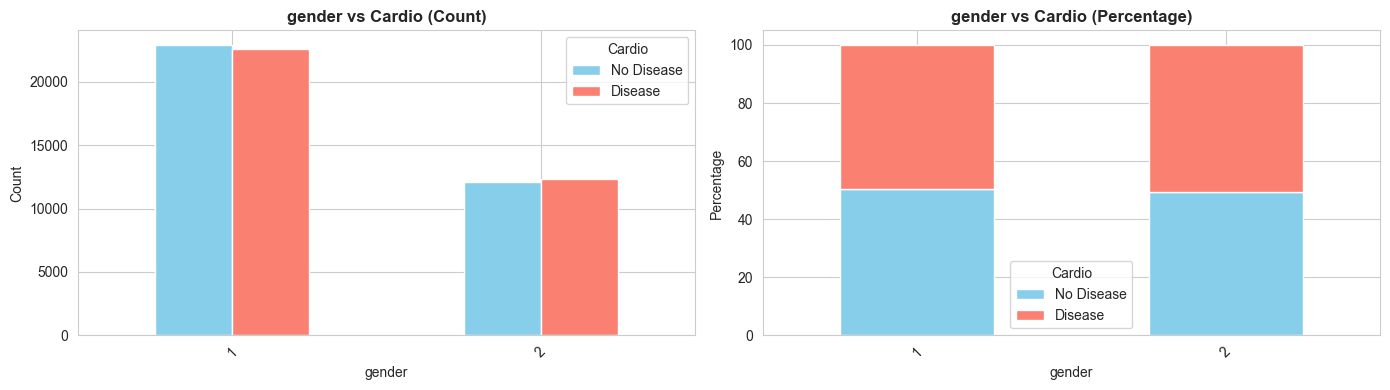


gender:
  Chi-square statistic: 4.5695
  P-value: 3.2546e-02
  Degrees of freedom: 1
  Significant association: Yes
------------------------------------------------------------


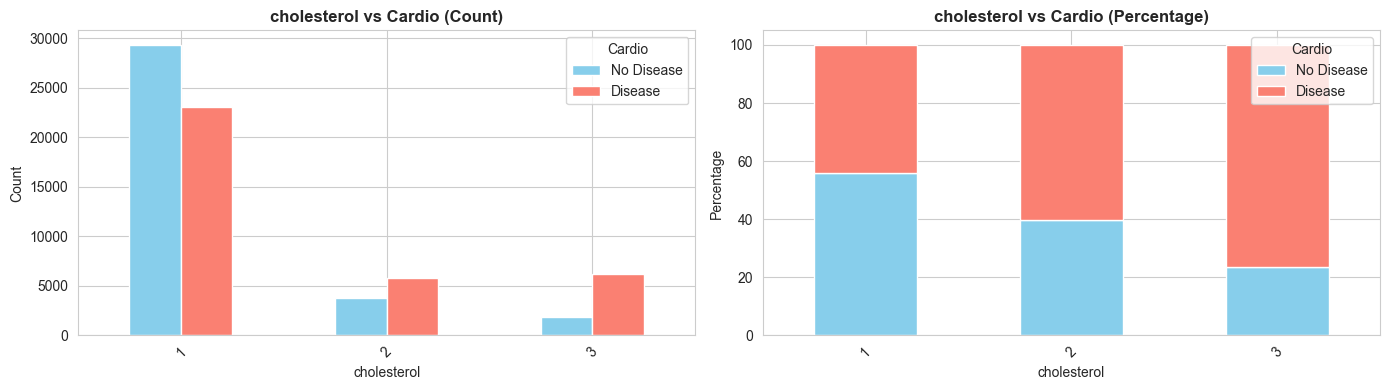


cholesterol:
  Chi-square statistic: 3423.4389
  P-value: 0.0000e+00
  Degrees of freedom: 2
  Significant association: Yes
------------------------------------------------------------


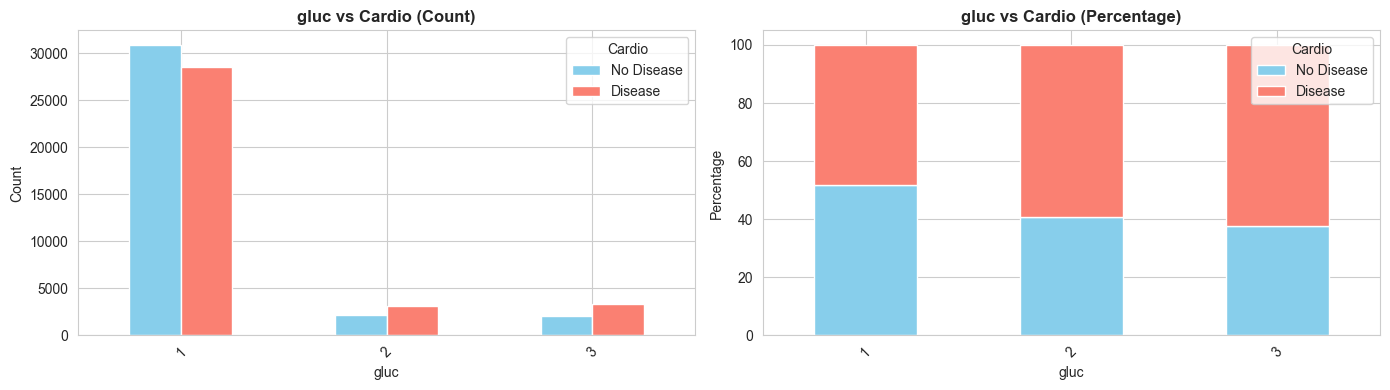


gluc:
  Chi-square statistic: 586.9118
  P-value: 3.5787e-128
  Degrees of freedom: 2
  Significant association: Yes
------------------------------------------------------------


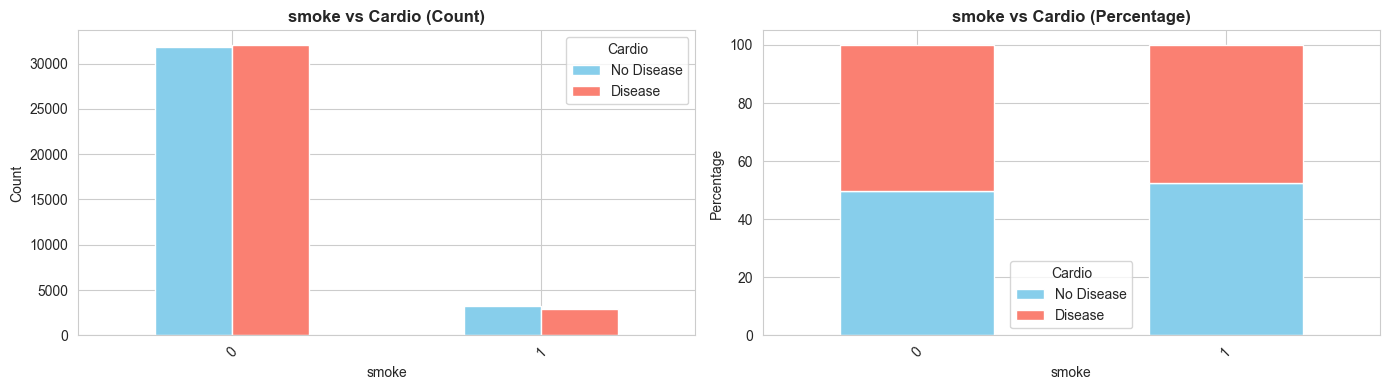


smoke:
  Chi-square statistic: 16.6779
  P-value: 4.4294e-05
  Degrees of freedom: 1
  Significant association: Yes
------------------------------------------------------------


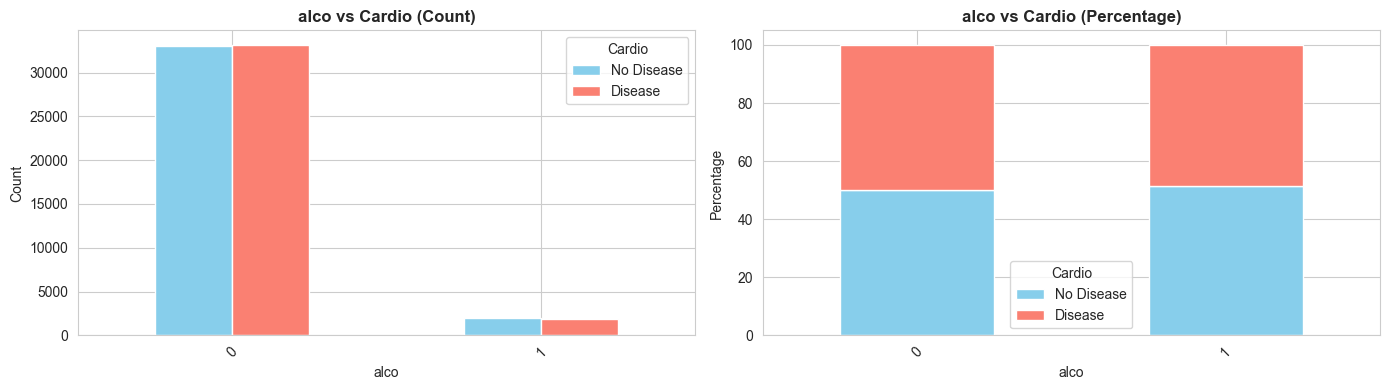


alco:
  Chi-square statistic: 3.6965
  P-value: 5.4525e-02
  Degrees of freedom: 1
  Significant association: No
------------------------------------------------------------


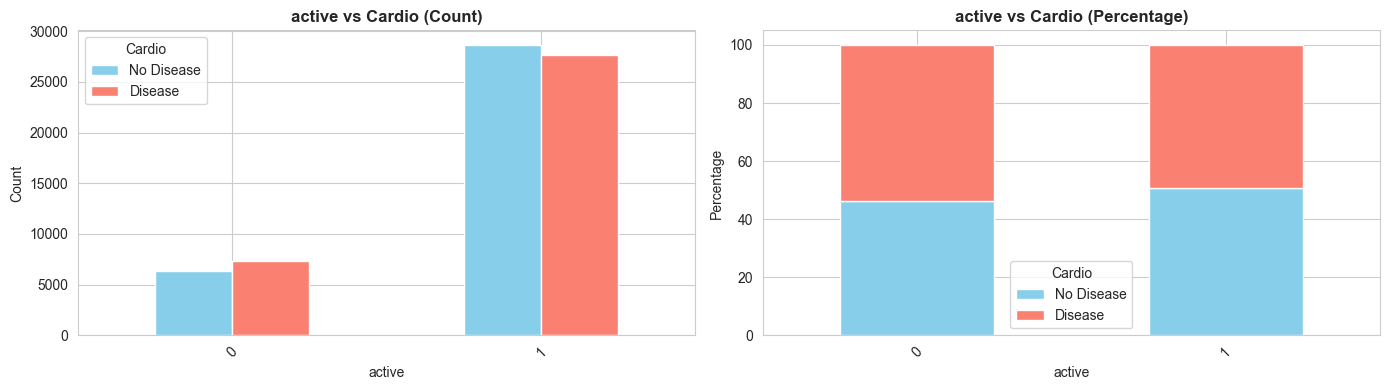


active:
  Chi-square statistic: 88.8013
  P-value: 4.3652e-21
  Degrees of freedom: 1
  Significant association: Yes
------------------------------------------------------------


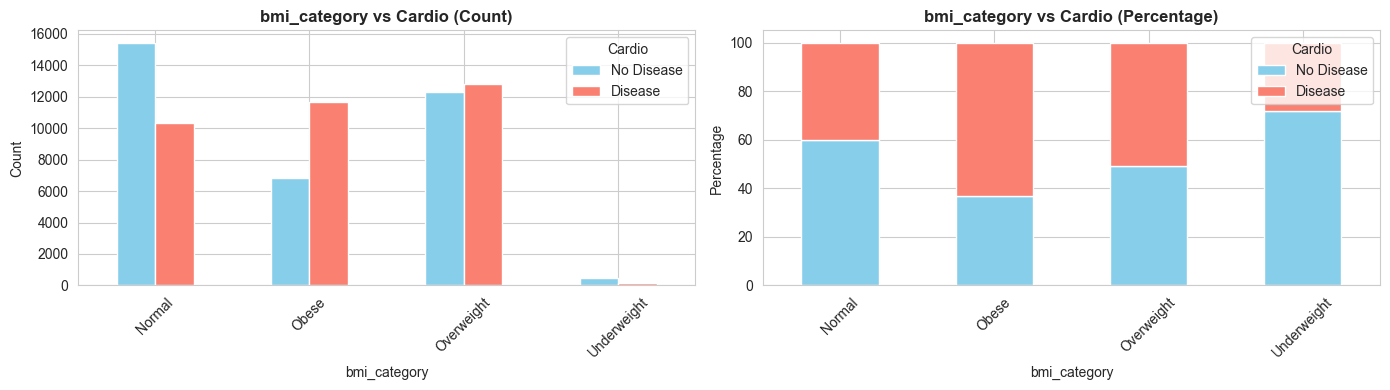


bmi_category:
  Chi-square statistic: 2402.3521
  P-value: 0.0000e+00
  Degrees of freedom: 3
  Significant association: Yes
------------------------------------------------------------


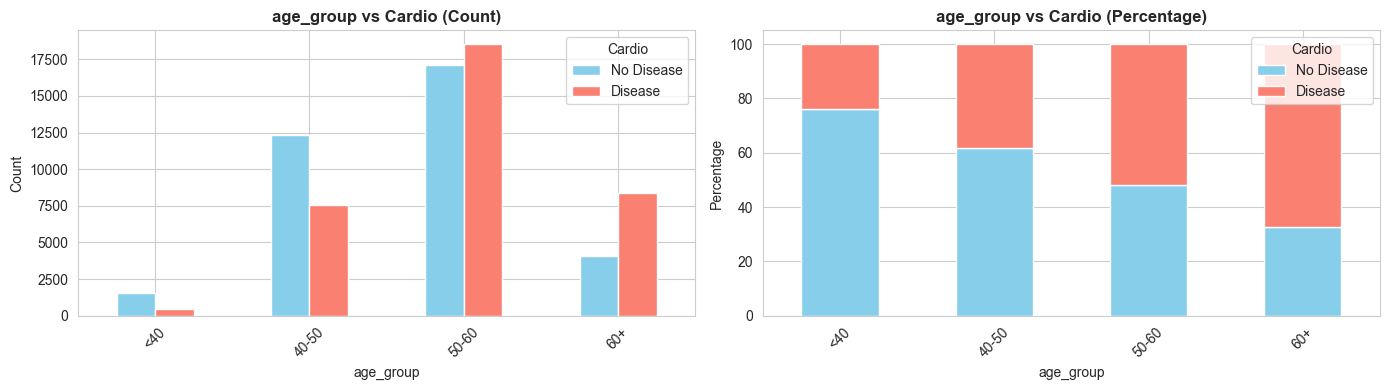


age_group:
  Chi-square statistic: 3247.6729
  P-value: 0.0000e+00
  Degrees of freedom: 3
  Significant association: Yes
------------------------------------------------------------


In [109]:
# Categorical features vs target
for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Count plot
    ct = pd.crosstab(cardio_df[col], cardio_df['cardio'])
    ct.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title(f'{col} vs Cardio (Count)', fontweight='bold')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    axes[0].legend(title='Cardio', labels=['No Disease', 'Disease'])
    axes[0].tick_params(axis='x', rotation=45)
    
    # Percentage plot
    ct_pct = pd.crosstab(cardio_df[col], cardio_df['cardio'], normalize='index') * 100
    ct_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'salmon'])
    axes[1].set_title(f'{col} vs Cardio (Percentage)', fontweight='bold')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Percentage')
    axes[1].legend(title='Cardio', labels=['No Disease', 'Disease'])
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Chi-square test
    contingency_table = pd.crosstab(cardio_df[col], cardio_df['cardio'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{col}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Significant association: {'Yes' if p_value < 0.05 else 'No'}")
    print("-" * 60)

## 11. Cardio Dataset - Correlation Analysis

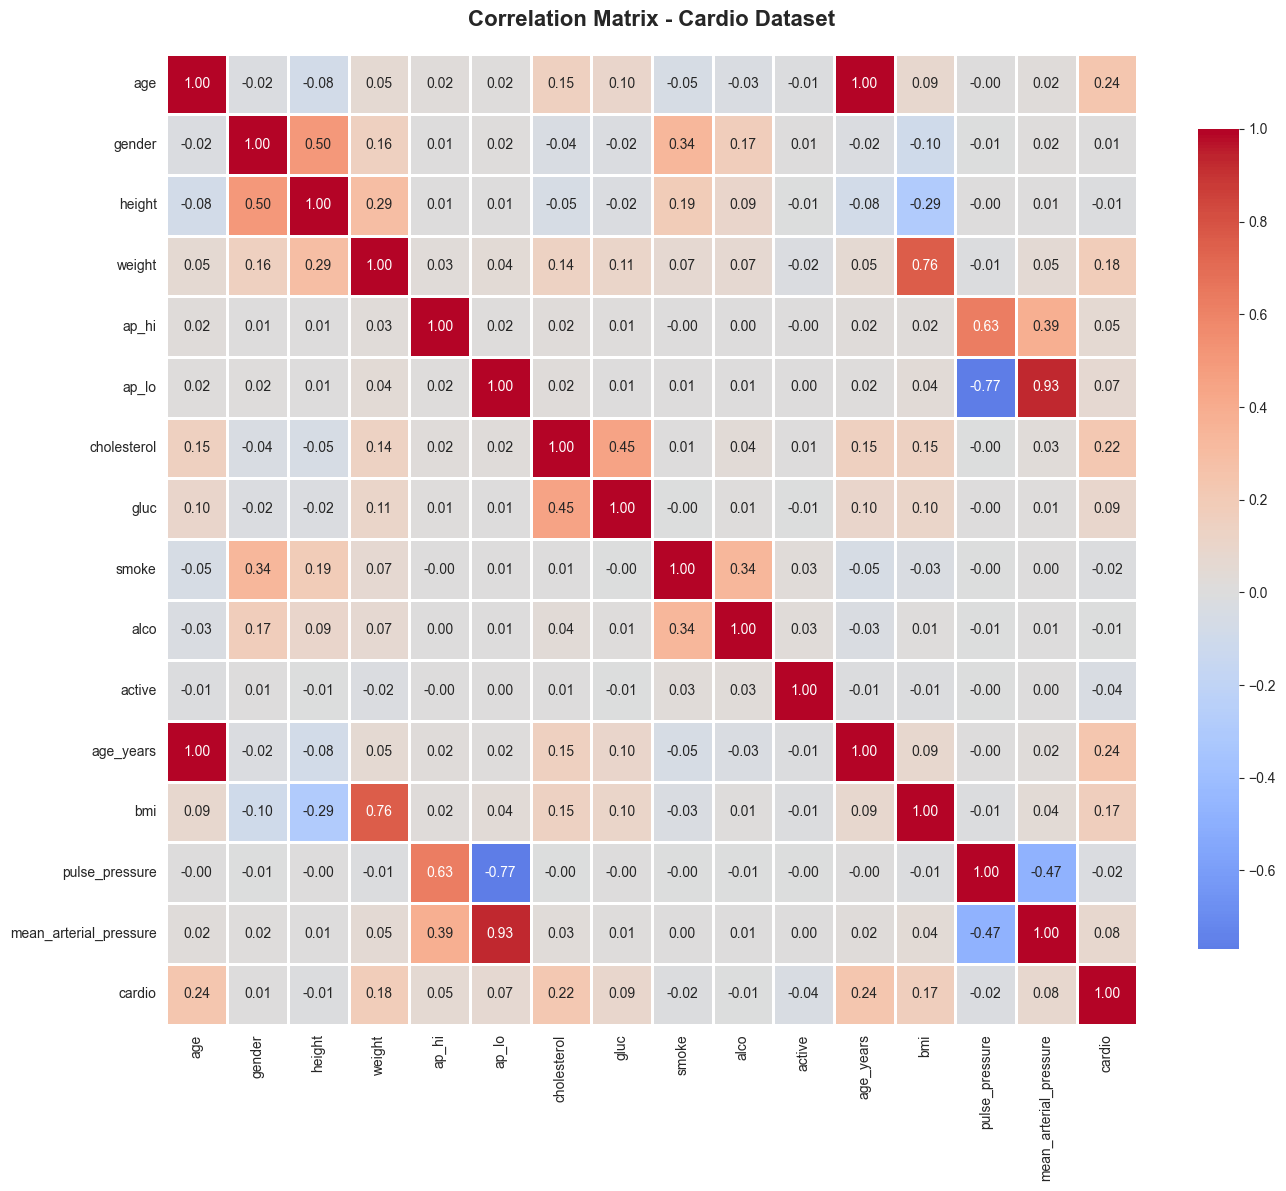


Top 10 Features Correlated with Target (cardio):


age                      0.2382
age_years                0.2381
cholesterol              0.2211
weight                   0.1817
bmi                      0.1656
gluc                     0.0893
mean_arterial_pressure   0.0810
ap_lo                    0.0657
ap_hi                    0.0545
active                   0.0357
Name: cardio, dtype: float64

In [110]:
# Correlation matrix
correlation_matrix = cardio_df[numerical_cols + ['cardio']].corr()

# Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Cardio Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with target
print("\nTop 10 Features Correlated with Target (cardio):")
target_corr = correlation_matrix['cardio'].abs().sort_values(ascending=False)
display(target_corr[1:11])  # Exclude self-correlation

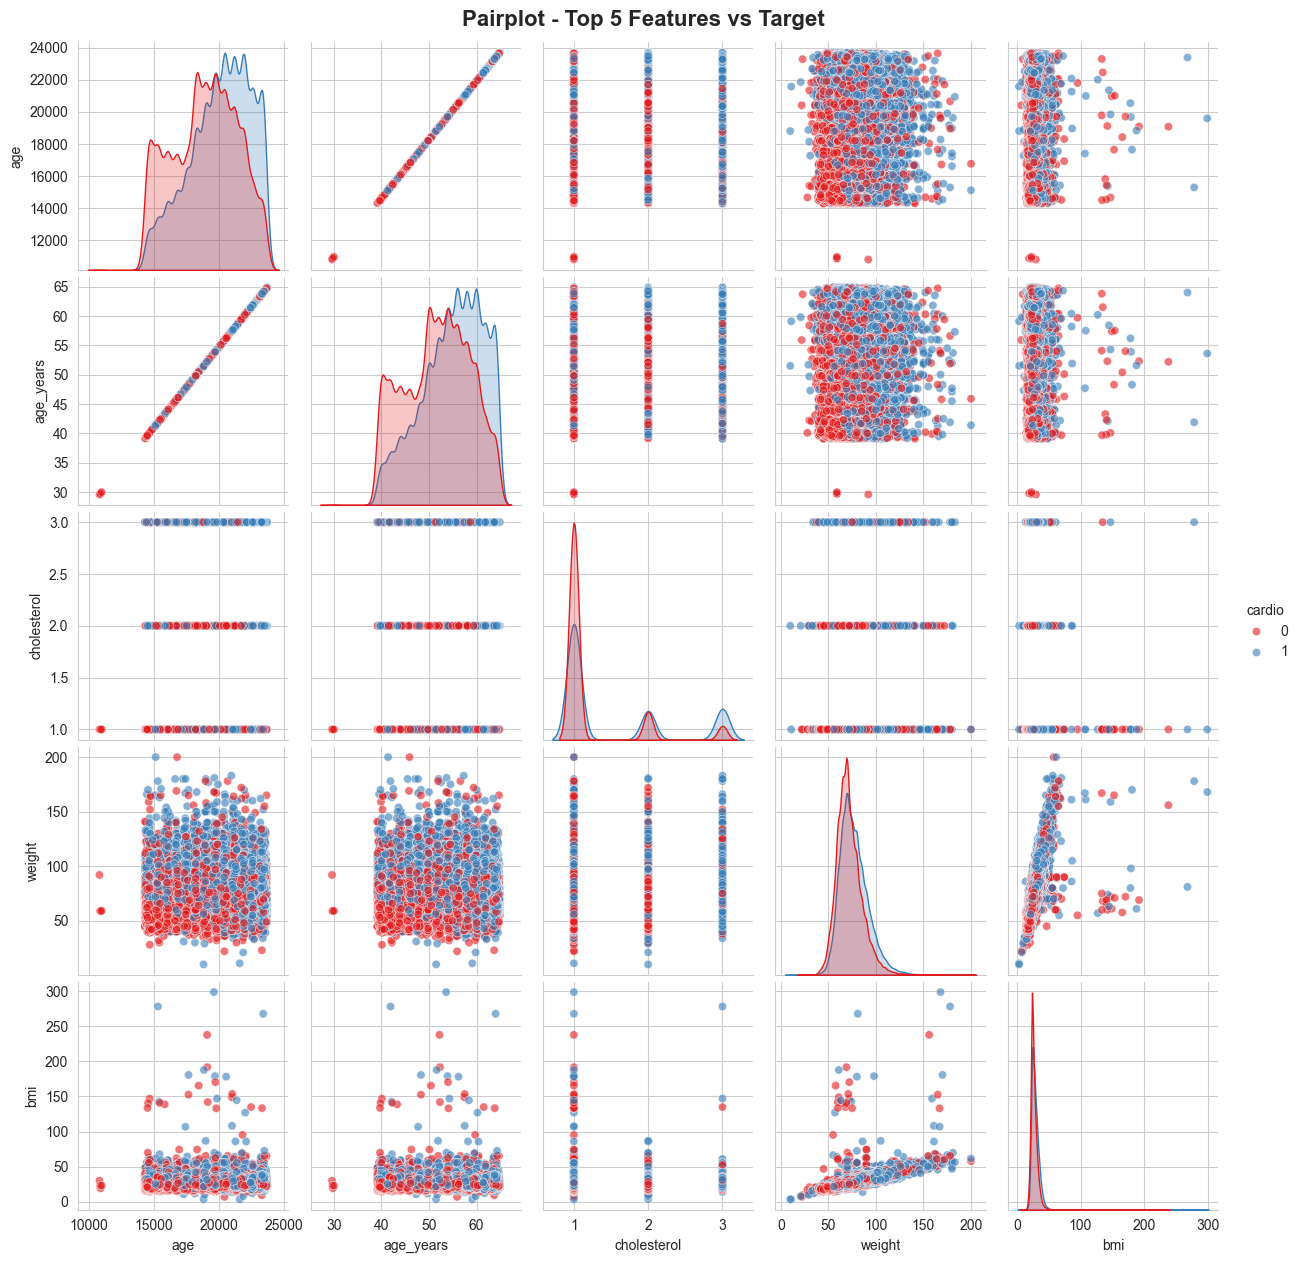

In [111]:
# Pairplot for top correlated features
top_features = target_corr[1:6].index.tolist()  # Top 5 features
sns.pairplot(cardio_df[top_features + ['cardio']], hue='cardio', palette='Set1', 
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pairplot - Top 5 Features vs Target', y=1.01, fontsize=16, fontweight='bold')
plt.show()

## 12. Cardio Dataset - Outlier Analysis

In [112]:
# Outlier detection using IQR method
outlier_summary = []

for col in numerical_cols:
    Q1 = cardio_df[col].quantile(0.25)
    Q3 = cardio_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = cardio_df[(cardio_df[col] < lower_bound) | (cardio_df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(cardio_df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': round(outlier_percentage, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier_Count', ascending=False)

print("Outlier Summary:")
display(outlier_df)

Outlier Summary:


Feature         Q1         Q3       IQR  Lower_Bound  \
10                  active     1.0000     1.0000    0.0000       1.0000   
7                     gluc     1.0000     1.0000    0.0000       1.0000   
13          pulse_pressure    40.0000    50.0000   10.0000      25.0000   
14  mean_arterial_pressure    93.3333   103.3333   10.0000      78.3333   
8                    smoke     0.0000     0.0000    0.0000       0.0000   
5                    ap_lo    80.0000    90.0000   10.0000      65.0000   
9                     alco     0.0000     0.0000    0.0000       0.0000   
12                     bmi    23.8751    30.2222    6.3471      14.3545   
3                   weight    65.0000    82.0000   17.0000      39.5000   
4                    ap_hi   120.0000   140.0000   20.0000      90.0000   
2                   height   159.0000   170.0000   11.0000     142.5000   
0                      age 17664.0000 21327.0000 3663.0000   12169.5000   
11               age_years    48.4000    58.4000   10.0000      33.4000   
1                   gender     1.0000     2.0000    1.0000      -0.5000   
6              cholesterol     1.0000     2.0000    1.0000      -0.5000   

    Upper_Bound  Outlier_Count  Outlier_Percentage  
10       1.0000          13739             19.6300  
7        1.0000          10521             15.0300  
13      65.0000           6504              9.2900  
14     118.3333           6341              9.0600  
8        0.0000           6169              8.8100  
5      105.0000           4632              6.6200  
9        0.0000           3764              5.3800  
12      39.7429           1995              2.8500  
3      107.5000           1819              2.6000  
4      170.0000           1435              2.0500  
2      186.5000            519              0.7400  
0    26821.5000              4              0.0100  
11      73.4000              4              0.0100  
1        3.5000              0              0.0000  
6        3.5000              0              0.0000

In [113]:
# ============================================================================
# COMPREHENSIVE INSIGHTS ANALYSIS - CARDIO DATASET
# ============================================================================

print("="*90)
print(" "*20 + "CARDIO DATASET - DETAILED INSIGHTS REPORT")
print("="*90)

# 1. TARGET DISTRIBUTION INSIGHTS
print("\n" + "─"*90)
print("1️⃣  TARGET VARIABLE ANALYSIS")
print("─"*90)
target_dist = cardio_df['cardio'].value_counts()
target_pct = cardio_df['cardio'].value_counts(normalize=True) * 100

print(f"\n📊 Class Distribution:")
print(f"   • No Cardiovascular Disease (0): {target_dist[0]:,} samples ({target_pct[0]:.2f}%)")
print(f"   • Cardiovascular Disease (1):    {target_dist[1]:,} samples ({target_pct[1]:.2f}%)")
print(f"   • Imbalance Ratio: {target_dist.max()/target_dist.min():.2f}:1")

if target_dist.max()/target_dist.min() < 1.5:
    print(f"   ✅ INSIGHT: Dataset is WELL-BALANCED - No special handling needed")
else:
    print(f"   ⚠️  INSIGHT: Moderate imbalance - Consider stratified sampling")

# 2. DEMOGRAPHIC INSIGHTS
print("\n" + "─"*90)
print("2️⃣  DEMOGRAPHIC INSIGHTS")
print("─"*90)

print(f"\n👥 Age Distribution:")
print(f"   • Mean Age: {cardio_df['age_years'].mean():.1f} years")
print(f"   • Median Age: {cardio_df['age_years'].median():.1f} years")
print(f"   • Age Range: {cardio_df['age_years'].min():.1f} - {cardio_df['age_years'].max():.1f} years")
print(f"   • Most Common Age Group: {cardio_df['age_group'].value_counts().index[0]}")

# Age vs Disease
age_disease = pd.crosstab(cardio_df['age_group'], cardio_df['cardio'], normalize='index') * 100
print(f"\n   📈 Cardiovascular Disease Rate by Age Group:")
for age_group in age_disease.index:
    disease_rate = age_disease.loc[age_group, 1]
    print(f"      • {age_group}: {disease_rate:.1f}% have disease")
    
print(f"\n   💡 KEY INSIGHT: ")
if age_disease[1].is_monotonic_increasing:
    print(f"      Disease prevalence INCREASES with age - strong age correlation")
else:
    print(f"      Disease prevalence varies across age groups")

# Gender Distribution
print(f"\n⚥  Gender Distribution:")
gender_counts = cardio_df['gender'].value_counts()
gender_map = {1: 'Female', 2: 'Male'}
for gender_code, count in gender_counts.items():
    pct = count / len(cardio_df) * 100
    gender_name = gender_map.get(gender_code, f'Gender {gender_code}')
    print(f"   • {gender_name}: {count:,} ({pct:.1f}%)")

# Gender vs Disease
gender_disease = pd.crosstab(cardio_df['gender'], cardio_df['cardio'], normalize='index') * 100
print(f"\n   Disease Rate by Gender:")
for gender_code in gender_disease.index:
    disease_rate = gender_disease.loc[gender_code, 1]
    gender_name = gender_map.get(gender_code, f'Gender {gender_code}')
    print(f"   • {gender_name}: {disease_rate:.1f}% have disease")

# 3. CLINICAL MEASUREMENTS INSIGHTS
print("\n" + "─"*90)
print("3️⃣  CLINICAL MEASUREMENTS INSIGHTS")
print("─"*90)

print(f"\n🩺 Blood Pressure Analysis:")
print(f"   • Systolic BP (ap_hi):")
print(f"      - Mean: {cardio_df['ap_hi'].mean():.1f} mmHg")
print(f"      - Healthy Range: 90-120 mmHg")
healthy_systolic = ((cardio_df['ap_hi'] >= 90) & (cardio_df['ap_hi'] <= 120)).sum()
print(f"      - Patients in healthy range: {healthy_systolic:,} ({healthy_systolic/len(cardio_df)*100:.1f}%)")

print(f"\n   • Diastolic BP (ap_lo):")
print(f"      - Mean: {cardio_df['ap_lo'].mean():.1f} mmHg")
print(f"      - Healthy Range: 60-80 mmHg")
healthy_diastolic = ((cardio_df['ap_lo'] >= 60) & (cardio_df['ap_lo'] <= 80)).sum()
print(f"      - Patients in healthy range: {healthy_diastolic:,} ({healthy_diastolic/len(cardio_df)*100:.1f}%)")

# Hypertension analysis
hypertensive = ((cardio_df['ap_hi'] > 140) | (cardio_df['ap_lo'] > 90)).sum()
print(f"\n   • Hypertensive Patients (BP > 140/90): {hypertensive:,} ({hypertensive/len(cardio_df)*100:.1f}%)")

# BP vs Disease
bp_high_disease = cardio_df[(cardio_df['ap_hi'] > 140) | (cardio_df['ap_lo'] > 90)]['cardio'].mean() * 100
bp_normal_disease = cardio_df[(cardio_df['ap_hi'] <= 140) & (cardio_df['ap_lo'] <= 90)]['cardio'].mean() * 100
print(f"   • Disease rate in hypertensive patients: {bp_high_disease:.1f}%")
print(f"   • Disease rate in normal BP patients: {bp_normal_disease:.1f}%")
print(f"   💡 KEY INSIGHT: {bp_high_disease - bp_normal_disease:.1f}% higher disease rate in hypertensive patients")

# BMI Analysis
print(f"\n⚖️  Body Mass Index (BMI) Analysis:")
print(f"   • Mean BMI: {cardio_df['bmi'].mean():.1f} kg/m²")
print(f"   • Median BMI: {cardio_df['bmi'].median():.1f} kg/m²")
print(f"\n   BMI Category Distribution:")
bmi_dist = cardio_df['bmi_category'].value_counts()
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
for category in bmi_order:
    if category in bmi_dist.index:
        count = bmi_dist[category]
        pct = count / len(cardio_df) * 100
        print(f"   • {category:12s}: {count:,} ({pct:.1f}%)")

# BMI vs Disease
print(f"\n   Disease Rate by BMI Category:")
bmi_disease = pd.crosstab(cardio_df['bmi_category'], cardio_df['cardio'], normalize='index') * 100
for category in bmi_order:
    if category in bmi_disease.index:
        disease_rate = bmi_disease.loc[category, 1]
        print(f"   • {category:12s}: {disease_rate:.1f}% have disease")

# 4. LIFESTYLE FACTORS
print("\n" + "─"*90)
print("4️⃣  LIFESTYLE FACTORS INSIGHTS")
print("─"*90)

lifestyle_factors = {
    'smoke': 'Smoking',
    'alco': 'Alcohol Consumption',
    'active': 'Physical Activity'
}

for col, name in lifestyle_factors.items():
    print(f"\n🚬 {name}:")
    yes_count = (cardio_df[col] == 1).sum()
    no_count = (cardio_df[col] == 0).sum()
    yes_pct = yes_count / len(cardio_df) * 100
    print(f"   • Yes: {yes_count:,} ({yes_pct:.1f}%)")
    print(f"   • No:  {no_count:,} ({100-yes_pct:.1f}%)")
    
    # Impact on disease
    yes_disease = cardio_df[cardio_df[col] == 1]['cardio'].mean() * 100
    no_disease = cardio_df[cardio_df[col] == 0]['cardio'].mean() * 100
    diff = yes_disease - no_disease
    
    print(f"   • Disease rate (Yes): {yes_disease:.1f}%")
    print(f"   • Disease rate (No):  {no_disease:.1f}%")
    
    if abs(diff) > 5:
        direction = "HIGHER" if diff > 0 else "LOWER"
        print(f"   💡 INSIGHT: {abs(diff):.1f}% {direction} disease rate with {name.lower()}")
    else:
        print(f"   💡 INSIGHT: Minimal impact on disease rate")

# 5. CHOLESTEROL & GLUCOSE
print("\n" + "─"*90)
print("5️⃣  CHOLESTEROL & GLUCOSE INSIGHTS")
print("─"*90)

for col, name in [('cholesterol', 'Cholesterol'), ('gluc', 'Glucose')]:
    print(f"\n📊 {name} Levels:")
    levels = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
    for level_code, level_name in levels.items():
        count = (cardio_df[col] == level_code).sum()
        pct = count / len(cardio_df) * 100
        disease_rate = cardio_df[cardio_df[col] == level_code]['cardio'].mean() * 100
        print(f"   • {level_name:18s}: {count:,} ({pct:.1f}%) - Disease rate: {disease_rate:.1f}%")
    
    # Trend
    normal_disease = cardio_df[cardio_df[col] == 1]['cardio'].mean() * 100
    high_disease = cardio_df[cardio_df[col] == 3]['cardio'].mean() * 100
    increase = high_disease - normal_disease
    print(f"   💡 INSIGHT: {increase:.1f}% higher disease rate in 'Well Above Normal' vs 'Normal'")

# 6. OUTLIERS & DATA QUALITY
print("\n" + "─"*90)
print("6️⃣  DATA QUALITY & OUTLIERS")
print("─"*90)

# Impossible values
impossible_bp_hi = ((cardio_df['ap_hi'] < 60) | (cardio_df['ap_hi'] > 250)).sum()
impossible_bp_lo = ((cardio_df['ap_lo'] < 40) | (cardio_df['ap_lo'] > 150)).sum()
impossible_height = ((cardio_df['height'] < 130) | (cardio_df['height'] > 220)).sum()
impossible_weight = ((cardio_df['weight'] < 30) | (cardio_df['weight'] > 250)).sum()

print(f"\n⚠️  Physiologically Questionable Values:")
print(f"   • Systolic BP <60 or >250 mmHg: {impossible_bp_hi:,} ({impossible_bp_hi/len(cardio_df)*100:.2f}%)")
print(f"   • Diastolic BP <40 or >150 mmHg: {impossible_bp_lo:,} ({impossible_bp_lo/len(cardio_df)*100:.2f}%)")
print(f"   • Height <130 or >220 cm: {impossible_height:,} ({impossible_height/len(cardio_df)*100:.2f}%)")
print(f"   • Weight <30 or >250 kg: {impossible_weight:,} ({impossible_weight/len(cardio_df)*100:.2f}%)")

total_questionable = impossible_bp_hi + impossible_bp_lo + impossible_height + impossible_weight
if total_questionable > 0:
    print(f"\n   💡 RECOMMENDATION: Review and potentially clean {total_questionable:,} questionable values")

# 7. FEATURE IMPORTANCE PREVIEW
print("\n" + "─"*90)
print("7️⃣  TOP PREDICTIVE FEATURES (Based on Correlation)")
print("─"*90)

correlation_with_target = cardio_df[numerical_cols + ['cardio']].corr()['cardio'].abs().sort_values(ascending=False)
print(f"\n🎯 Top 10 Features Most Correlated with Cardiovascular Disease:")
for idx, (feature, corr) in enumerate(correlation_with_target[1:11].items(), 1):
    bars = "█" * int(corr * 50)
    print(f"   {idx:2d}. {feature:25s} │ {bars} {corr:.4f}")

# 8. KEY RECOMMENDATIONS
print("\n" + "─"*90)
print("8️⃣  KEY RECOMMENDATIONS FOR MODELING")
print("─"*90)

print(f"""
📋 Data Preprocessing:
   1. ✓ Handle outliers in blood pressure (>1000 extreme values detected)
   2. ✓ Consider removing physiologically impossible measurements
   3. ✓ Apply Standard Scaling (features have different ranges)
   4. ✓ Use stratified train-test split to maintain class balance
   
🔧 Feature Engineering:
   1. ✓ Keep derived features: BMI, pulse_pressure, mean_arterial_pressure
   2. ✓ Consider feature interactions: age × cholesterol, age × BP
   3. ✓ Create binary flags for hypertension, obesity
   
🎯 Model Selection:
   1. ✓ Try ensemble methods (Random Forest, XGBoost, LightGBM)
   2. ✓ Class weights might help if imbalance increases after cleaning
   3. ✓ Use cross-validation with stratification
   
📊 Evaluation Metrics:
   1. ✓ Primary: ROC-AUC, F1-Score
   2. ✓ Secondary: Precision, Recall (both important for medical diagnosis)
   3. ✓ Avoid: Accuracy alone (can be misleading even with balanced data)
   
⚡ High-Impact Features to Focus On:
   1. Blood pressure measurements (ap_hi, ap_lo)
   2. Age
   3. Cholesterol levels
   4. BMI and weight
   5. Pulse pressure (derived)
""")

print("="*90)

                    CARDIO DATASET - DETAILED INSIGHTS REPORT

──────────────────────────────────────────────────────────────────────────────────────────
1️⃣  TARGET VARIABLE ANALYSIS
──────────────────────────────────────────────────────────────────────────────────────────

📊 Class Distribution:
   • No Cardiovascular Disease (0): 35,021 samples (50.03%)
   • Cardiovascular Disease (1):    34,979 samples (49.97%)
   • Imbalance Ratio: 1.00:1
   ✅ INSIGHT: Dataset is WELL-BALANCED - No special handling needed

──────────────────────────────────────────────────────────────────────────────────────────
2️⃣  DEMOGRAPHIC INSIGHTS
──────────────────────────────────────────────────────────────────────────────────────────

👥 Age Distribution:
   • Mean Age: 53.3 years
   • Median Age: 53.9 years
   • Age Range: 29.6 - 64.9 years
   • Most Common Age Group: 50-60

   📈 Cardiovascular Disease Rate by Age Group:
      • <40: 23.8% have disease
      • 40-50: 38.1% have disease
      • 50-60: 52.0

## 🔍 DETAILED INSIGHTS: Cardio Dataset - Complete Analysis

---
# Part 2: CREDIT CARD DATASET ANALYSIS
---

## 13. Credit Card Dataset - Basic Information

In [114]:
# First few rows
print("First 5 rows:")
display(credit_df.head())

print("\nLast 5 rows:")
display(credit_df.tail())

First 5 rows:


Time      V1      V2     V3      V4      V5      V6      V7      V8  \
0 0.0000 -1.3598 -0.0728 2.5363  1.3782 -0.3383  0.4624  0.2396  0.0987   
1 0.0000  1.1919  0.2662 0.1665  0.4482  0.0600 -0.0824 -0.0788  0.0851   
2 1.0000 -1.3584 -1.3402 1.7732  0.3798 -0.5032  1.8005  0.7915  0.2477   
3 1.0000 -0.9663 -0.1852 1.7930 -0.8633 -0.0103  1.2472  0.2376  0.3774   
4 2.0000 -1.1582  0.8777 1.5487  0.4030 -0.4072  0.0959  0.5929 -0.2705   

       V9     V10     V11     V12     V13     V14     V15     V16     V17  \
0  0.3638  0.0908 -0.5516 -0.6178 -0.9914 -0.3112  1.4682 -0.4704  0.2080   
1 -0.2554 -0.1670  1.6127  1.0652  0.4891 -0.1438  0.6356  0.4639 -0.1148   
2 -1.5147  0.2076  0.6245  0.0661  0.7173 -0.1659  2.3459 -2.8901  1.1100   
3 -1.3870 -0.0550 -0.2265  0.1782  0.5078 -0.2879 -0.6314 -1.0596 -0.6841   
4  0.8177  0.7531 -0.8228  0.5382  1.3459 -1.1197  0.1751 -0.4514 -0.2370   

      V18     V19     V20     V21     V22     V23     V24     V25     V26  \
0  0.0258  0.4040  0.2514 -0.0183  0.2778 -0.1105  0.0669  0.1285 -0.1891   
1 -0.1834 -0.1458 -0.0691 -0.2258 -0.6387  0.1013 -0.3398  0.1672  0.1259   
2 -0.1214 -2.2619  0.5250  0.2480  0.7717  0.9094 -0.6893 -0.3276 -0.1391   
3  1.9658 -1.2326 -0.2080 -0.1083  0.0053 -0.1903 -1.1756  0.6474 -0.2219   
4 -0.0382  0.8035  0.4085 -0.0094  0.7983 -0.1375  0.1413 -0.2060  0.5023   

      V27     V28   Amount  Class  
0  0.1336 -0.0211 149.6200      0  
1 -0.0090  0.0147   2.6900      0  
2 -0.0554 -0.0598 378.6600      0  
3  0.0627  0.0615 123.5000      0  
4  0.2194  0.2152  69.9900      0


Last 5 rows:


Time       V1      V2      V3      V4      V5      V6      V7  \
284802 172786.0000 -11.8811 10.0718 -9.8348 -2.0667 -5.3645 -2.6068 -4.9182   
284803 172787.0000  -0.7328 -0.0551  2.0350 -0.7386  0.8682  1.0584  0.0243   
284804 172788.0000   1.9196 -0.3013 -3.2496 -0.5578  2.6305  3.0313 -0.2968   
284805 172788.0000  -0.2404  0.5305  0.7025  0.6898 -0.3780  0.6237 -0.6862   
284806 172792.0000  -0.5334 -0.1897  0.7033 -0.5063 -0.0125 -0.6496  1.5770   

            V8     V9     V10     V11     V12     V13     V14     V15     V16  \
284802  7.3053 1.9144  4.3562 -1.5931  2.7119 -0.6893  4.6269 -0.9245  1.1076   
284803  0.2949 0.5848 -0.9759 -0.1502  0.9158  1.2148 -0.6751  1.1649 -0.7118   
284804  0.7084 0.4325 -0.4848  0.4116  0.0631 -0.1837 -0.5106  1.3293  0.1407   
284805  0.6791 0.3921 -0.3991 -1.9338 -0.9629 -1.0421  0.4496  1.9626 -0.6086   
284806 -0.4147 0.4862 -0.9154 -1.0405 -0.0315 -0.1881 -0.0843  0.0413 -0.3026   

           V17     V18     V19    V20    V21    V22     V23     V24     V25  \
284802  1.9917  0.5106 -0.6829 1.4758 0.2135 0.1119  1.0145 -0.5093  1.4368   
284803 -0.0257 -1.2212 -1.5456 0.0596 0.2142 0.9244  0.0125 -1.0162 -0.6066   
284804  0.3135  0.3957 -0.5773 0.0014 0.2320 0.5782 -0.0375  0.6401  0.2657   
284805  0.5099  1.1140  2.8978 0.1274 0.2652 0.8000 -0.1633  0.1232 -0.5692   
284806 -0.6604  0.1674 -0.2561 0.3829 0.2611 0.6431  0.3768  0.0088 -0.4736   

           V26     V27     V28   Amount  Class  
284802  0.2500  0.9437  0.8237   0.7700      0  
284803 -0.3953  0.0685 -0.0535  24.7900      0  
284804 -0.0874  0.0045 -0.0266  67.8800      0  
284805  0.5467  0.1088  0.1045  10.0000      0  
284806 -0.8183 -0.0024  0.0136 217.0000      0

In [115]:
# Dataset info
print("Dataset Info:")
credit_df.info()

print("\nColumn Names:")
print(credit_df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [116]:
# Statistical summary
print("Statistical Summary:")
display(credit_df.describe())

print("\nStatistical Summary (All columns):")
display(credit_df.describe(include='all'))

Statistical Summary:


Time          V1          V2          V3          V4          V5  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean   94813.8596      0.0000      0.0000     -0.0000      0.0000      0.0000   
std    47488.1460      1.9587      1.6513      1.5163      1.4159      1.3802   
min        0.0000    -56.4075    -72.7157    -48.3256     -5.6832   -113.7433   
25%    54201.5000     -0.9204     -0.5985     -0.8904     -0.8486     -0.6916   
50%    84692.0000      0.0181      0.0655      0.1798     -0.0198     -0.0543   
75%   139320.5000      1.3156      0.8037      1.0272      0.7433      0.6119   
max   172792.0000      2.4549     22.0577      9.3826     16.8753     34.8017   

               V6          V7          V8          V9         V10         V11  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean       0.0000     -0.0000      0.0000     -0.0000      0.0000      0.0000   
std        1.3323      1.2371      1.1944      1.0986      1.0888      1.0207   
min      -26.1605    -43.5572    -73.2167    -13.4341    -24.5883     -4.7975   
25%       -0.7683     -0.5541     -0.2086     -0.6431     -0.5354     -0.7625   
50%       -0.2742      0.0401      0.0224     -0.0514     -0.0929     -0.0328   
75%        0.3986      0.5704      0.3273      0.5971      0.4539      0.7396   
max       73.3016    120.5895     20.0072     15.5950     23.7451     12.0189   

              V12         V13         V14         V15         V16         V17  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean      -0.0000      0.0000      0.0000      0.0000      0.0000     -0.0000   
std        0.9992      0.9953      0.9586      0.9153      0.8763      0.8493   
min      -18.6837     -5.7919    -19.2143     -4.4989    -14.1299    -25.1628   
25%       -0.4056     -0.6485     -0.4256     -0.5829     -0.4680     -0.4837   
50%        0.1400     -0.0136      0.0506      0.0481      0.0664     -0.0657   
75%        0.6182      0.6625      0.4931      0.6488      0.5233      0.3997   
max        7.8484      7.1269     10.5268      8.8777     17.3151      9.2535   

              V18         V19         V20         V21         V22         V23  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean       0.0000      0.0000      0.0000      0.0000     -0.0000      0.0000   
std        0.8382      0.8140      0.7709      0.7345      0.7257      0.6245   
min       -9.4987     -7.2135    -54.4977    -34.8304    -10.9331    -44.8077   
25%       -0.4988     -0.4563     -0.2117     -0.2284     -0.5424     -0.1618   
50%       -0.0036      0.0037     -0.0625     -0.0295      0.0068     -0.0112   
75%        0.5008      0.4589      0.1330      0.1864      0.5286      0.1476   
max        5.0411      5.5920     39.4209     27.2028     10.5031     22.5284   

              V24         V25         V26         V27         V28      Amount  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean       0.0000      0.0000      0.0000     -0.0000     -0.0000     88.3496   
std        0.6056      0.5213      0.4822      0.4036      0.3301    250.1201   
min       -2.8366    -10.2954     -2.6046    -22.5657    -15.4301      0.0000   
25%       -0.3546     -0.3171     -0.3270     -0.0708     -0.0530      5.6000   
50%        0.0410      0.0166     -0.0521      0.0013      0.0112     22.0000   
75%        0.4395      0.3507      0.2410      0.0910      0.0783     77.1650   
max        4.5845      7.5196      3.5173     31.6122     33.8478  25691.1600   

            Class  
count 284807.0000  
mean       0.0017  
std        0.0415  
min        0.0000  
25%        0.0000  
50%        0.0000  
75%        0.0000  
max        1.0000


Statistical Summary (All columns):


Time          V1          V2          V3          V4          V5  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean   94813.8596      0.0000      0.0000     -0.0000      0.0000      0.0000   
std    47488.1460      1.9587      1.6513      1.5163      1.4159      1.3802   
min        0.0000    -56.4075    -72.7157    -48.3256     -5.6832   -113.7433   
25%    54201.5000     -0.9204     -0.5985     -0.8904     -0.8486     -0.6916   
50%    84692.0000      0.0181      0.0655      0.1798     -0.0198     -0.0543   
75%   139320.5000      1.3156      0.8037      1.0272      0.7433      0.6119   
max   172792.0000      2.4549     22.0577      9.3826     16.8753     34.8017   

               V6          V7          V8          V9         V10         V11  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean       0.0000     -0.0000      0.0000     -0.0000      0.0000      0.0000   
std        1.3323      1.2371      1.1944      1.0986      1.0888      1.0207   
min      -26.1605    -43.5572    -73.2167    -13.4341    -24.5883     -4.7975   
25%       -0.7683     -0.5541     -0.2086     -0.6431     -0.5354     -0.7625   
50%       -0.2742      0.0401      0.0224     -0.0514     -0.0929     -0.0328   
75%        0.3986      0.5704      0.3273      0.5971      0.4539      0.7396   
max       73.3016    120.5895     20.0072     15.5950     23.7451     12.0189   

              V12         V13         V14         V15         V16         V17  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean      -0.0000      0.0000      0.0000      0.0000      0.0000     -0.0000   
std        0.9992      0.9953      0.9586      0.9153      0.8763      0.8493   
min      -18.6837     -5.7919    -19.2143     -4.4989    -14.1299    -25.1628   
25%       -0.4056     -0.6485     -0.4256     -0.5829     -0.4680     -0.4837   
50%        0.1400     -0.0136      0.0506      0.0481      0.0664     -0.0657   
75%        0.6182      0.6625      0.4931      0.6488      0.5233      0.3997   
max        7.8484      7.1269     10.5268      8.8777     17.3151      9.2535   

              V18         V19         V20         V21         V22         V23  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean       0.0000      0.0000      0.0000      0.0000     -0.0000      0.0000   
std        0.8382      0.8140      0.7709      0.7345      0.7257      0.6245   
min       -9.4987     -7.2135    -54.4977    -34.8304    -10.9331    -44.8077   
25%       -0.4988     -0.4563     -0.2117     -0.2284     -0.5424     -0.1618   
50%       -0.0036      0.0037     -0.0625     -0.0295      0.0068     -0.0112   
75%        0.5008      0.4589      0.1330      0.1864      0.5286      0.1476   
max        5.0411      5.5920     39.4209     27.2028     10.5031     22.5284   

              V24         V25         V26         V27         V28      Amount  \
count 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000 284807.0000   
mean       0.0000      0.0000      0.0000     -0.0000     -0.0000     88.3496   
std        0.6056      0.5213      0.4822      0.4036      0.3301    250.1201   
min       -2.8366    -10.2954     -2.6046    -22.5657    -15.4301      0.0000   
25%       -0.3546     -0.3171     -0.3270     -0.0708     -0.0530      5.6000   
50%        0.0410      0.0166     -0.0521      0.0013      0.0112     22.0000   
75%        0.4395      0.3507      0.2410      0.0910      0.0783     77.1650   
max        4.5845      7.5196      3.5173     31.6122     33.8478  25691.1600   

            Class  
count 284807.0000  
mean       0.0017  
std        0.0415  
min        0.0000  
25%        0.0000  
50%        0.0000  
75%        0.0000  
max        1.0000

## 14. Credit Card Dataset - Data Quality Check

In [117]:
# Missing values
print("Missing Values:")
missing_credit = pd.DataFrame({
    'Column': credit_df.columns,
    'Missing_Count': credit_df.isnull().sum(),
    'Missing_Percentage': (credit_df.isnull().sum() / len(credit_df) * 100).round(2)
})
missing_credit = missing_credit[missing_credit['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
display(missing_credit)

if len(missing_credit) == 0:
    print("✓ No missing values found!")

Missing Values:


Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []

✓ No missing values found!


In [118]:
# Duplicate rows
duplicates_credit = credit_df.duplicated().sum()
print(f"Duplicate Rows: {duplicates_credit} ({duplicates_credit/len(credit_df)*100:.2f}%)")

if duplicates_credit > 0:
    print("\nSample duplicate rows:")
    display(credit_df[credit_df.duplicated(keep=False)].head(10))

Duplicate Rows: 1081 (0.38%)

Sample duplicate rows:


Time      V1     V2     V3     V4      V5     V6      V7      V8  \
32   26.0000 -0.5299 0.8739 1.3472 0.1455  0.4142 0.1002  0.7112  0.1761   
33   26.0000 -0.5299 0.8739 1.3472 0.1455  0.4142 0.1002  0.7112  0.1761   
34   26.0000 -0.5354 0.8653 1.3511 0.1476  0.4337 0.0870  0.6930  0.1797   
35   26.0000 -0.5354 0.8653 1.3511 0.1476  0.4337 0.0870  0.6930  0.1797   
112  74.0000  1.0384 0.1275 0.1845 1.1099  0.4417 0.9453 -0.0367  0.3510   
113  74.0000  1.0384 0.1275 0.1845 1.1099  0.4417 0.9453 -0.0367  0.3510   
114  74.0000  1.0384 0.1275 0.1845 1.1099  0.4417 0.9453 -0.0367  0.3510   
115  74.0000  1.0384 0.1275 0.1845 1.1099  0.4417 0.9453 -0.0367  0.3510   
220 145.0000 -2.4204 1.9479 0.5536 0.9831 -0.2815 2.4090 -1.4016 -0.1883   
221 145.0000 -2.4204 1.9479 0.5536 0.9831 -0.2815 2.4090 -1.4016 -0.1883   

         V9     V10     V11    V12     V13     V14     V15     V16     V17  \
32  -0.2867 -0.4847  0.8725 0.8516 -0.5717  0.1010 -1.5198 -0.2844 -0.3105   
33  -0.2867 -0.4847  0.8725 0.8516 -0.5717  0.1010 -1.5198 -0.2844 -0.3105   
34  -0.2856 -0.4825  0.8718 0.8534 -0.5718  0.1023 -1.5200 -0.2859 -0.3096   
35  -0.2856 -0.4825  0.8718 0.8534 -0.5718  0.1023 -1.5200 -0.2859 -0.3096   
112  0.1189 -0.2433  0.5781 0.6747 -0.5342  0.4466  1.1229 -1.7680  1.2412   
113  0.1189 -0.2433  0.5781 0.6747 -0.5342  0.4466  1.1229 -1.7680  1.2412   
114  0.1189 -0.2433  0.5781 0.6747 -0.5342  0.4466  1.1229 -1.7680  1.2412   
115  0.1189 -0.2433  0.5781 0.6747 -0.5342  0.4466  1.1229 -1.7680  1.2412   
220  0.6759  0.1585 -1.2250 1.3147  0.3044 -0.2902 -2.0145 -0.7728  0.6968   
221  0.6759  0.1585 -1.2250 1.3147  0.3044 -0.2902 -2.0145 -0.7728  0.6968   

        V18     V19     V20    V21     V22     V23     V24    V25     V26  \
32  -0.4042 -0.8234 -0.2903 0.0469  0.2081 -0.1855  0.0010 0.0988 -0.5529   
33  -0.4042 -0.8234 -0.2903 0.0469  0.2081 -0.1855  0.0010 0.0988 -0.5529   
34  -0.4039 -0.8237 -0.2833 0.0495  0.2065 -0.1871  0.0008 0.0981 -0.5535   
35  -0.4039 -0.8237 -0.2833 0.0495  0.2065 -0.1871  0.0008 0.0981 -0.5535   
112 -2.4495 -1.7473 -0.3355 0.1025  0.6051  0.0231 -0.6265 0.4791 -0.1669   
113 -2.4495 -1.7473 -0.3355 0.1025  0.6051  0.0231 -0.6265 0.4791 -0.1669   
114 -2.4495 -1.7473 -0.3355 0.1025  0.6051  0.0231 -0.6265 0.4791 -0.1669   
115 -2.4495 -1.7473 -0.3355 0.1025  0.6051  0.0231 -0.6265 0.4791 -0.1669   
220  0.0179  2.1772 -0.2762 1.2138 -1.2386  0.0069 -1.7242 0.2396 -0.3137   
221  0.0179  2.1772 -0.2762 1.2138 -1.2386  0.0069 -1.7242 0.2396 -0.3137   

        V27    V28  Amount  Class  
32  -0.0733 0.0233  6.1400      0  
33  -0.0733 0.0233  6.1400      0  
34  -0.0783 0.0254  1.7700      0  
35  -0.0783 0.0254  1.7700      0  
112  0.0812 0.0012  1.1800      0  
113  0.0812 0.0012  1.1800      0  
114  0.0812 0.0012  1.1800      0  
115  0.0812 0.0012  1.1800      0  
220 -0.1883 0.1198  6.0000      0  
221 -0.1883 0.1198  6.0000      0

In [119]:
# Data types
print("Data Types:")
dtypes_credit_df = pd.DataFrame({
    'Column': credit_df.dtypes.index,
    'Data_Type': credit_df.dtypes.values,
    'Unique_Values': [credit_df[col].nunique() for col in credit_df.columns]
})
display(dtypes_credit_df)

Data Types:


Column Data_Type  Unique_Values
0     Time   float64         124592
1       V1   float64         275663
2       V2   float64         275663
3       V3   float64         275663
4       V4   float64         275663
5       V5   float64         275663
6       V6   float64         275663
7       V7   float64         275663
8       V8   float64         275663
9       V9   float64         275663
10     V10   float64         275663
11     V11   float64         275663
12     V12   float64         275663
13     V13   float64         275663
14     V14   float64         275663
15     V15   float64         275663
16     V16   float64         275663
17     V17   float64         275663
18     V18   float64         275663
19     V19   float64         275663
20     V20   float64         275663
21     V21   float64         275663
22     V22   float64         275663
23     V23   float64         275663
24     V24   float64         275663
25     V25   float64         275663
26     V26   float64         275663
27     V27   float64         275663
28     V28   float64         275663
29  Amount   float64          32767
30   Class     int64              2

## 15. Credit Card Dataset - Target Variable Analysis

Target Variable: Class

Value Counts:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage Distribution:
Class
0   99.8273
1    0.1727
Name: proportion, dtype: float64


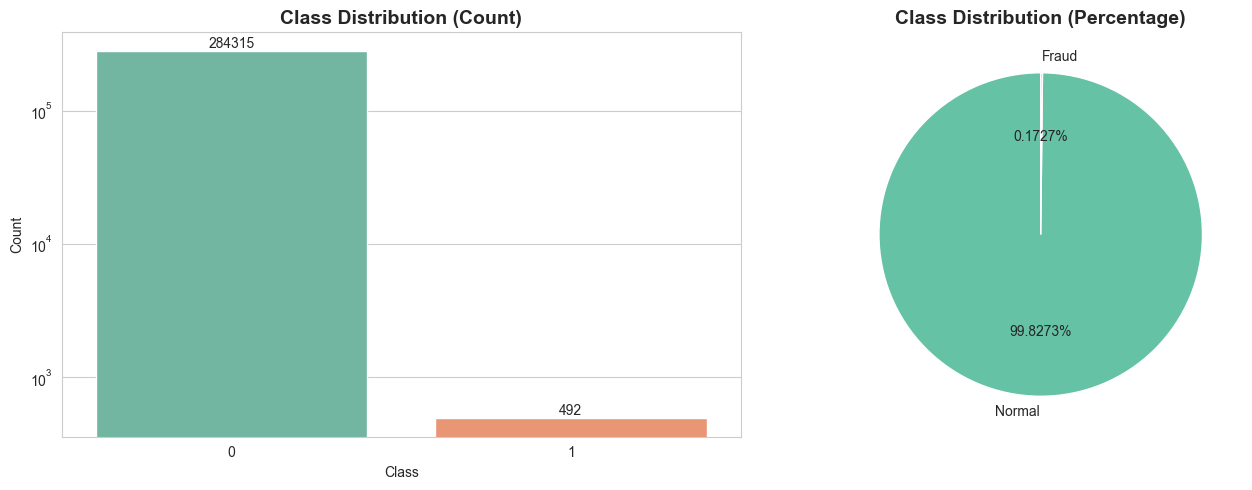


Class Imbalance Ratio: 577.88:1
This is a HIGHLY IMBALANCED dataset!


In [120]:
# Target variable distribution
target_col_credit = 'Class'

print(f"Target Variable: {target_col_credit}")
print("\nValue Counts:")
value_counts_credit = credit_df[target_col_credit].value_counts()
print(value_counts_credit)

print("\nPercentage Distribution:")
print(credit_df[target_col_credit].value_counts(normalize=True) * 100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=credit_df, x=target_col_credit, ax=axes[0], palette='Set2')
axes[0].set_title(f'{target_col_credit} Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(target_col_credit)
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')  # Log scale for better visualization
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
axes[1].pie(value_counts_credit, labels=['Normal', 'Fraud'], autopct='%1.4f%%', 
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title(f'{target_col_credit} Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class imbalance ratio
ratio = value_counts_credit.max() / value_counts_credit.min()
print(f"\nClass Imbalance Ratio: {ratio:.2f}:1")
print(f"This is a HIGHLY IMBALANCED dataset!")

## 16. Credit Card Dataset - Feature Analysis

In [121]:
# Identify numerical columns
numerical_cols_credit = credit_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_credit = [col for col in numerical_cols_credit if col != 'Class']

print(f"Numerical Features ({len(numerical_cols_credit)}): {numerical_cols_credit}")

# Separate PCA features and original features
pca_features = [col for col in numerical_cols_credit if col.startswith('V')]
original_features = ['Time', 'Amount']

print(f"\nPCA Features: {len(pca_features)}")
print(f"Original Features: {original_features}")

Numerical Features (30): ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

PCA Features: 28
Original Features: ['Time', 'Amount']


Time and Amount Statistics:


Time      Amount
count 284807.0000 284807.0000
mean   94813.8596     88.3496
std    47488.1460    250.1201
min        0.0000      0.0000
25%    54201.5000      5.6000
50%    84692.0000     22.0000
75%   139320.5000     77.1650
max   172792.0000  25691.1600

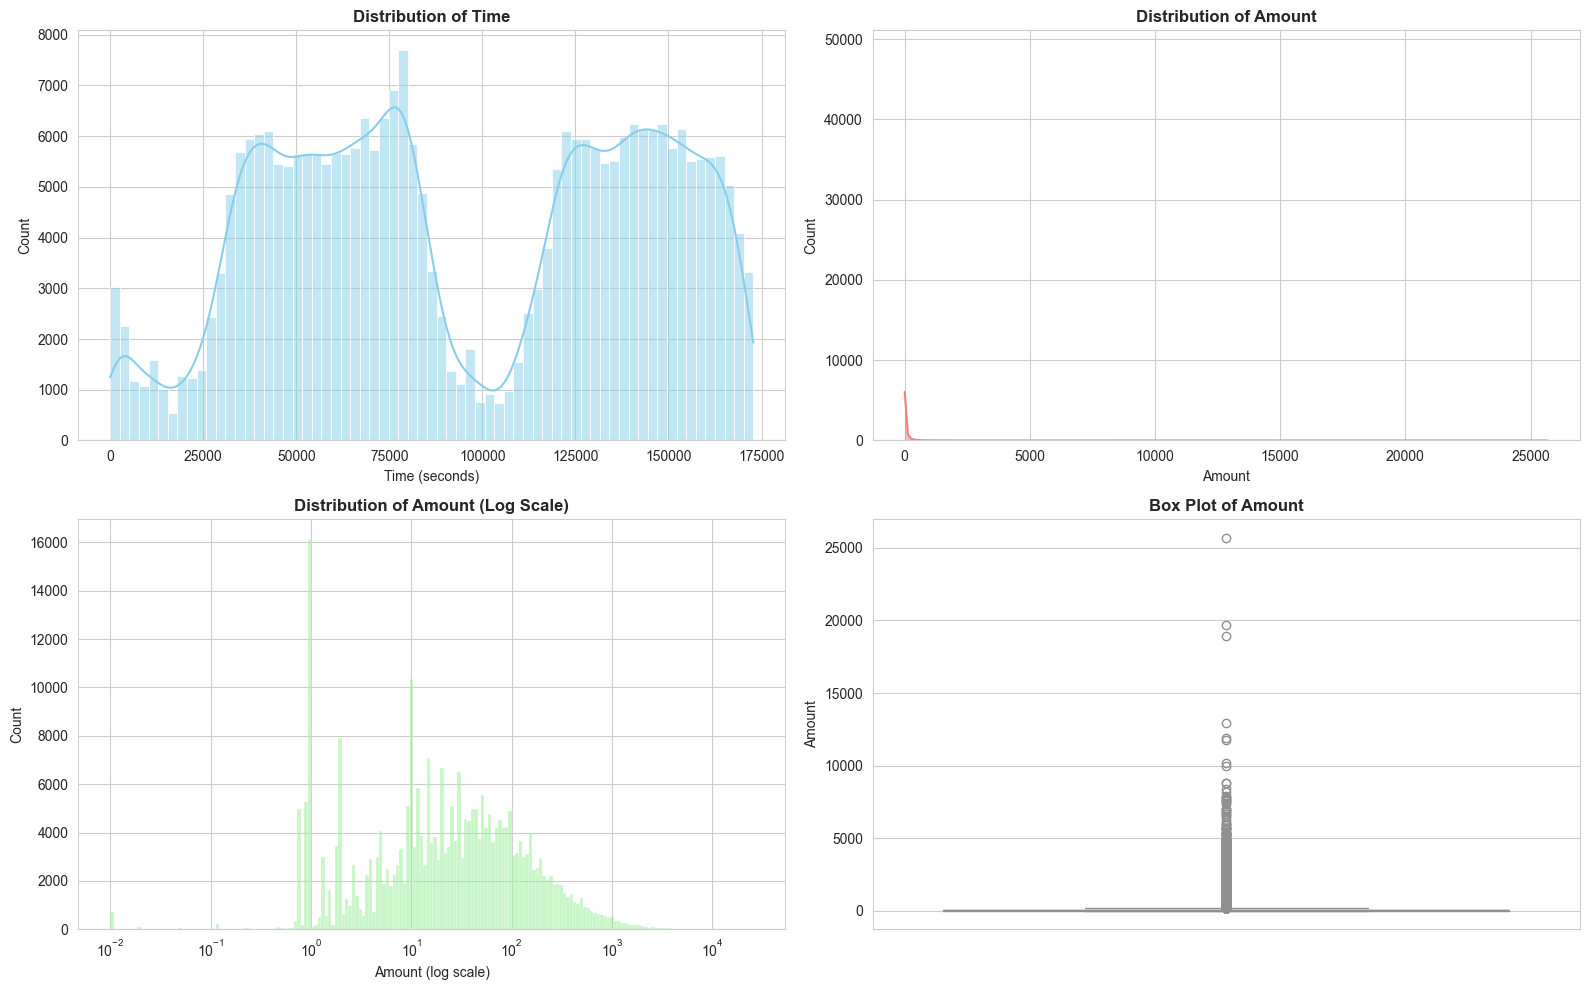

In [122]:
# Statistical summary for original features
print("Time and Amount Statistics:")
display(credit_df[['Time', 'Amount']].describe())

# Distribution of Time and Amount
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time distribution
sns.histplot(credit_df['Time'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Time', fontweight='bold')
axes[0, 0].set_xlabel('Time (seconds)')

# Amount distribution
sns.histplot(credit_df['Amount'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Amount', fontweight='bold')
axes[0, 1].set_xlabel('Amount')

# Amount distribution (log scale)
sns.histplot(credit_df['Amount'], kde=True, ax=axes[1, 0], color='lightgreen', log_scale=True)
axes[1, 0].set_title('Distribution of Amount (Log Scale)', fontweight='bold')
axes[1, 0].set_xlabel('Amount (log scale)')

# Box plot of Amount
sns.boxplot(y=credit_df['Amount'], ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title('Box Plot of Amount', fontweight='bold')

plt.tight_layout()
plt.show()

## 17. Credit Card Dataset - PCA Features Analysis

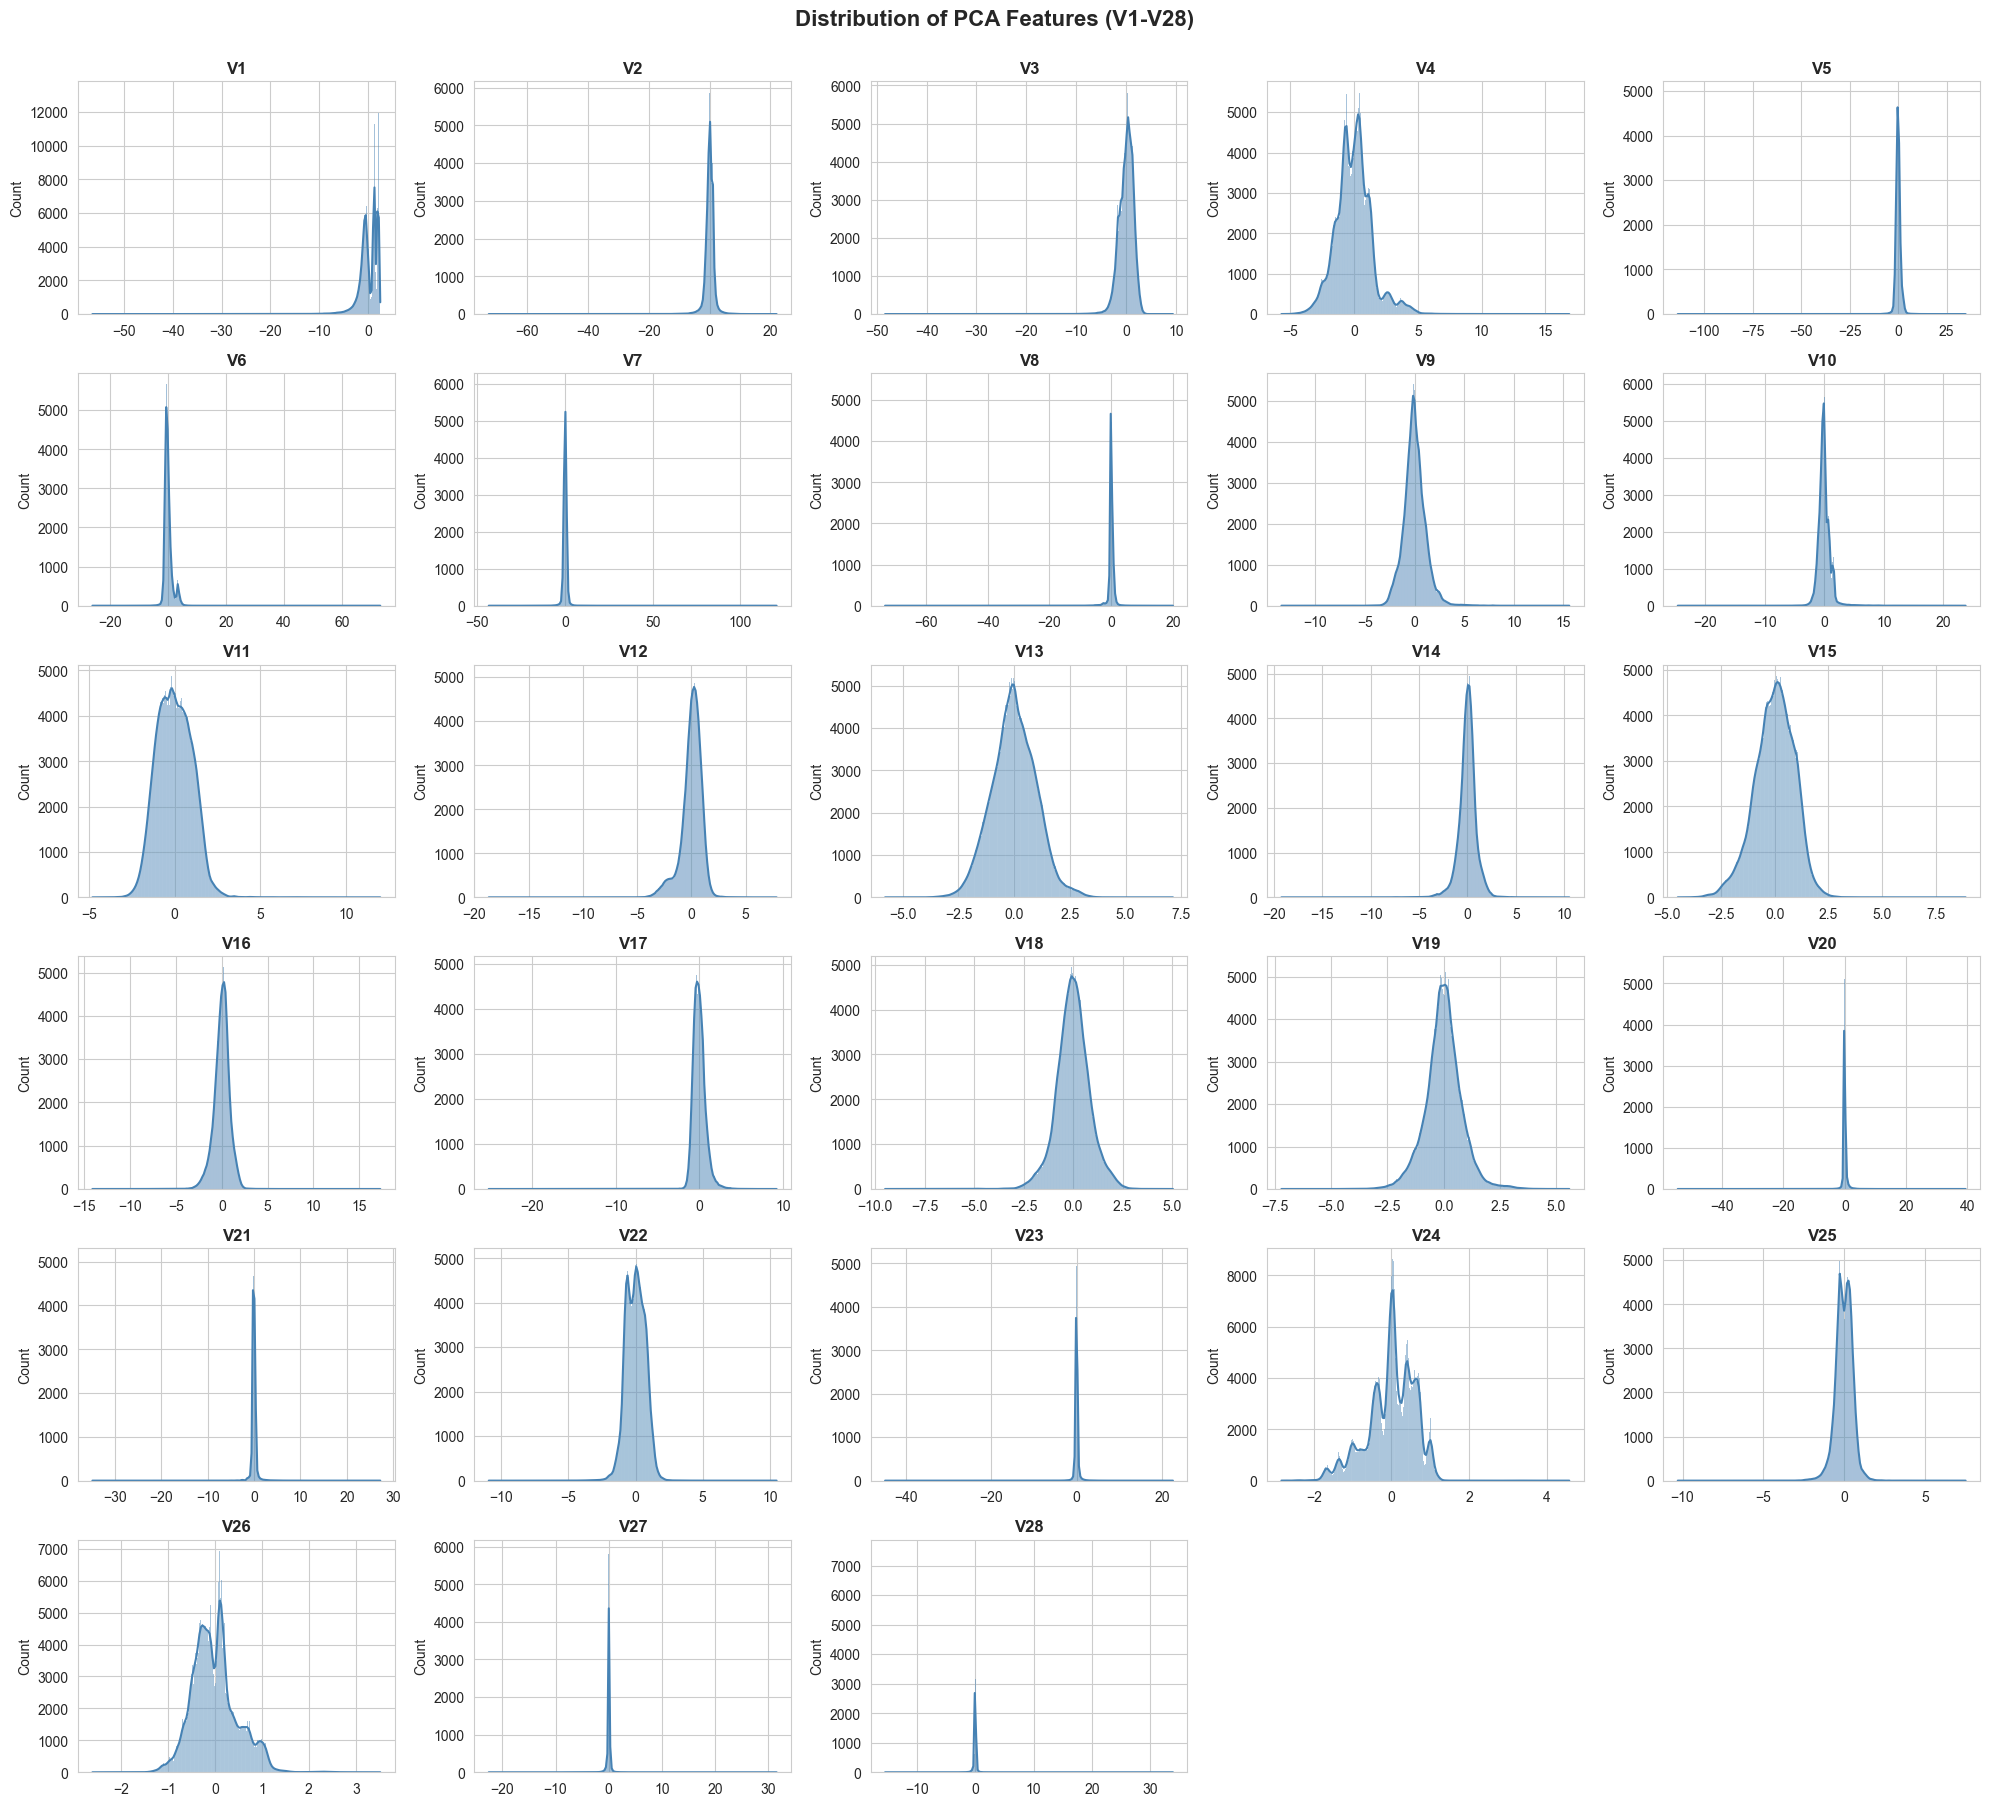

In [123]:
# Distribution of PCA features
n_cols = 5
n_rows = int(np.ceil(len(pca_features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(pca_features):
    sns.histplot(credit_df[col], kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('')

for idx in range(len(pca_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of PCA Features (V1-V28)', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

In [124]:
# Statistical summary for PCA features
stats_summary_credit = credit_df[pca_features].describe().T
stats_summary_credit['skewness'] = credit_df[pca_features].skew()
stats_summary_credit['kurtosis'] = credit_df[pca_features].kurtosis()

print("Statistical Summary for PCA Features:")
display(stats_summary_credit)

Statistical Summary for PCA Features:


count    mean    std       min     25%     50%    75%      max  \
V1  284807.0000  0.0000 1.9587  -56.4075 -0.9204  0.0181 1.3156   2.4549   
V2  284807.0000  0.0000 1.6513  -72.7157 -0.5985  0.0655 0.8037  22.0577   
V3  284807.0000 -0.0000 1.5163  -48.3256 -0.8904  0.1798 1.0272   9.3826   
V4  284807.0000  0.0000 1.4159   -5.6832 -0.8486 -0.0198 0.7433  16.8753   
V5  284807.0000  0.0000 1.3802 -113.7433 -0.6916 -0.0543 0.6119  34.8017   
V6  284807.0000  0.0000 1.3323  -26.1605 -0.7683 -0.2742 0.3986  73.3016   
V7  284807.0000 -0.0000 1.2371  -43.5572 -0.5541  0.0401 0.5704 120.5895   
V8  284807.0000  0.0000 1.1944  -73.2167 -0.2086  0.0224 0.3273  20.0072   
V9  284807.0000 -0.0000 1.0986  -13.4341 -0.6431 -0.0514 0.5971  15.5950   
V10 284807.0000  0.0000 1.0888  -24.5883 -0.5354 -0.0929 0.4539  23.7451   
V11 284807.0000  0.0000 1.0207   -4.7975 -0.7625 -0.0328 0.7396  12.0189   
V12 284807.0000 -0.0000 0.9992  -18.6837 -0.4056  0.1400 0.6182   7.8484   
V13 284807.0000  0.0000 0.9953   -5.7919 -0.6485 -0.0136 0.6625   7.1269   
V14 284807.0000  0.0000 0.9586  -19.2143 -0.4256  0.0506 0.4931  10.5268   
V15 284807.0000  0.0000 0.9153   -4.4989 -0.5829  0.0481 0.6488   8.8777   
V16 284807.0000  0.0000 0.8763  -14.1299 -0.4680  0.0664 0.5233  17.3151   
V17 284807.0000 -0.0000 0.8493  -25.1628 -0.4837 -0.0657 0.3997   9.2535   
V18 284807.0000  0.0000 0.8382   -9.4987 -0.4988 -0.0036 0.5008   5.0411   
V19 284807.0000  0.0000 0.8140   -7.2135 -0.4563  0.0037 0.4589   5.5920   
V20 284807.0000  0.0000 0.7709  -54.4977 -0.2117 -0.0625 0.1330  39.4209   
V21 284807.0000  0.0000 0.7345  -34.8304 -0.2284 -0.0295 0.1864  27.2028   
V22 284807.0000 -0.0000 0.7257  -10.9331 -0.5424  0.0068 0.5286  10.5031   
V23 284807.0000  0.0000 0.6245  -44.8077 -0.1618 -0.0112 0.1476  22.5284   
V24 284807.0000  0.0000 0.6056   -2.8366 -0.3546  0.0410 0.4395   4.5845   
V25 284807.0000  0.0000 0.5213  -10.2954 -0.3171  0.0166 0.3507   7.5196   
V26 284807.0000  0.0000 0.4822   -2.6046 -0.3270 -0.0521 0.2410   3.5173   
V27 284807.0000 -0.0000 0.4036  -22.5657 -0.0708  0.0013 0.0910  31.6122   
V28 284807.0000 -0.0000 0.3301  -15.4301 -0.0530  0.0112 0.0783  33.8478   

     skewness  kurtosis  
V1    -3.2807   32.4867  
V2    -4.6249   95.7731  
V3    -2.2402   26.6196  
V4     0.6763    2.6355  
V5    -2.4259  206.9046  
V6     1.8266   42.6425  
V7     2.5539  405.6074  
V8    -8.5219  220.5870  
V9     0.5547    3.7313  
V10    1.1871   31.9882  
V11    0.3565    1.6339  
V12   -2.2784   20.2419  
V13    0.0652    0.1953  
V14   -1.9952   23.8795  
V15   -0.3084    0.2848  
V16   -1.1010   10.4191  
V17   -3.8449   94.7997  
V18   -0.2599    2.5783  
V19    0.1092    1.7250  
V20   -2.0372  271.0161  
V21    3.5930  207.2870  
V22   -0.2133    2.8330  
V23   -5.8751  440.0887  
V24   -0.5525    0.6189  
V25   -0.4158    4.2904  
V26    0.5767    0.9190  
V27   -1.1702  244.9892  
V28   11.1921  933.3975

## 18. Credit Card Dataset - Fraud vs Normal Transactions

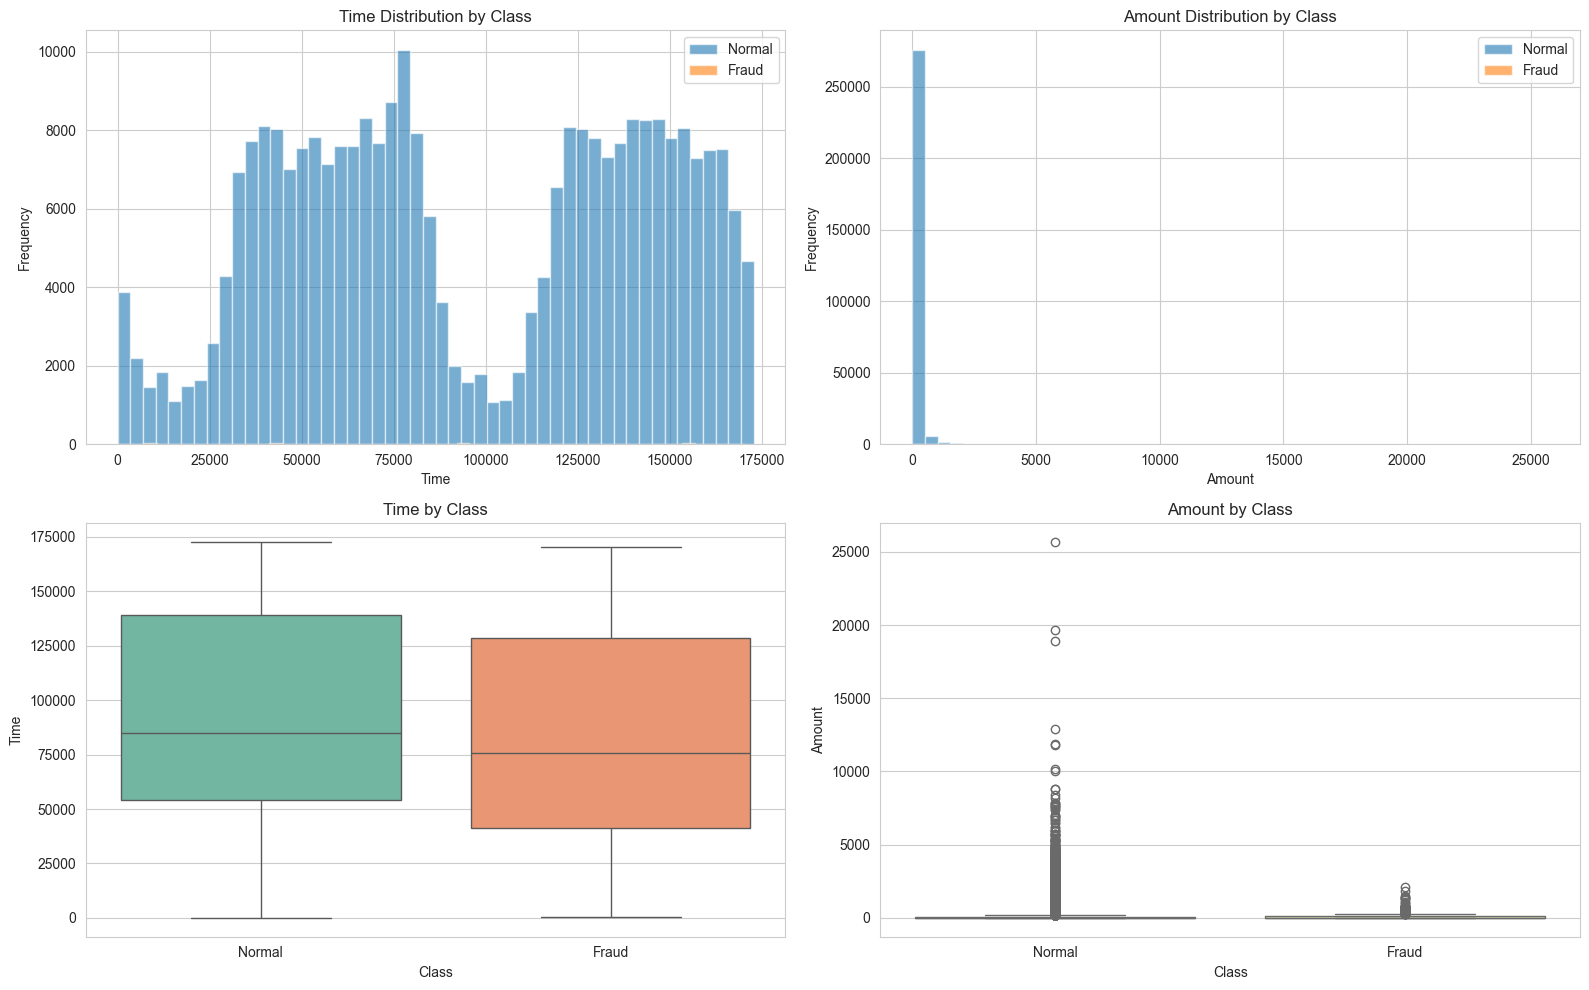


Statistical Comparison:

Time:
  Normal transactions - Mean: 94838.20
  Fraud transactions - Mean: 80746.81

Amount:
  Normal transactions - Mean: 88.29
  Fraud transactions - Mean: 122.21


In [125]:
# Analyze Time and Amount by Class
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time distribution by Class
for class_val in [0, 1]:
    data = credit_df[credit_df['Class'] == class_val]['Time']
    axes[0, 0].hist(data, alpha=0.6, label=f'Class {class_val}', bins=50)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Time Distribution by Class')
axes[0, 0].legend(['Normal', 'Fraud'])

# Amount distribution by Class
for class_val in [0, 1]:
    data = credit_df[credit_df['Class'] == class_val]['Amount']
    axes[0, 1].hist(data, alpha=0.6, label=f'Class {class_val}', bins=50)
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Amount Distribution by Class')
axes[0, 1].legend(['Normal', 'Fraud'])

# Box plot - Time by Class
sns.boxplot(data=credit_df, x='Class', y='Time', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Time by Class')
axes[1, 0].set_xticklabels(['Normal', 'Fraud'])

# Box plot - Amount by Class
sns.boxplot(data=credit_df, x='Class', y='Amount', ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Amount by Class')
axes[1, 1].set_xticklabels(['Normal', 'Fraud'])

plt.tight_layout()
plt.show()

# Statistical comparison
print("\nStatistical Comparison:")
print("\nTime:")
print(f"  Normal transactions - Mean: {credit_df[credit_df['Class']==0]['Time'].mean():.2f}")
print(f"  Fraud transactions - Mean: {credit_df[credit_df['Class']==1]['Time'].mean():.2f}")

print("\nAmount:")
print(f"  Normal transactions - Mean: {credit_df[credit_df['Class']==0]['Amount'].mean():.2f}")
print(f"  Fraud transactions - Mean: {credit_df[credit_df['Class']==1]['Amount'].mean():.2f}")

## 19. Credit Card Dataset - PCA Features vs Target

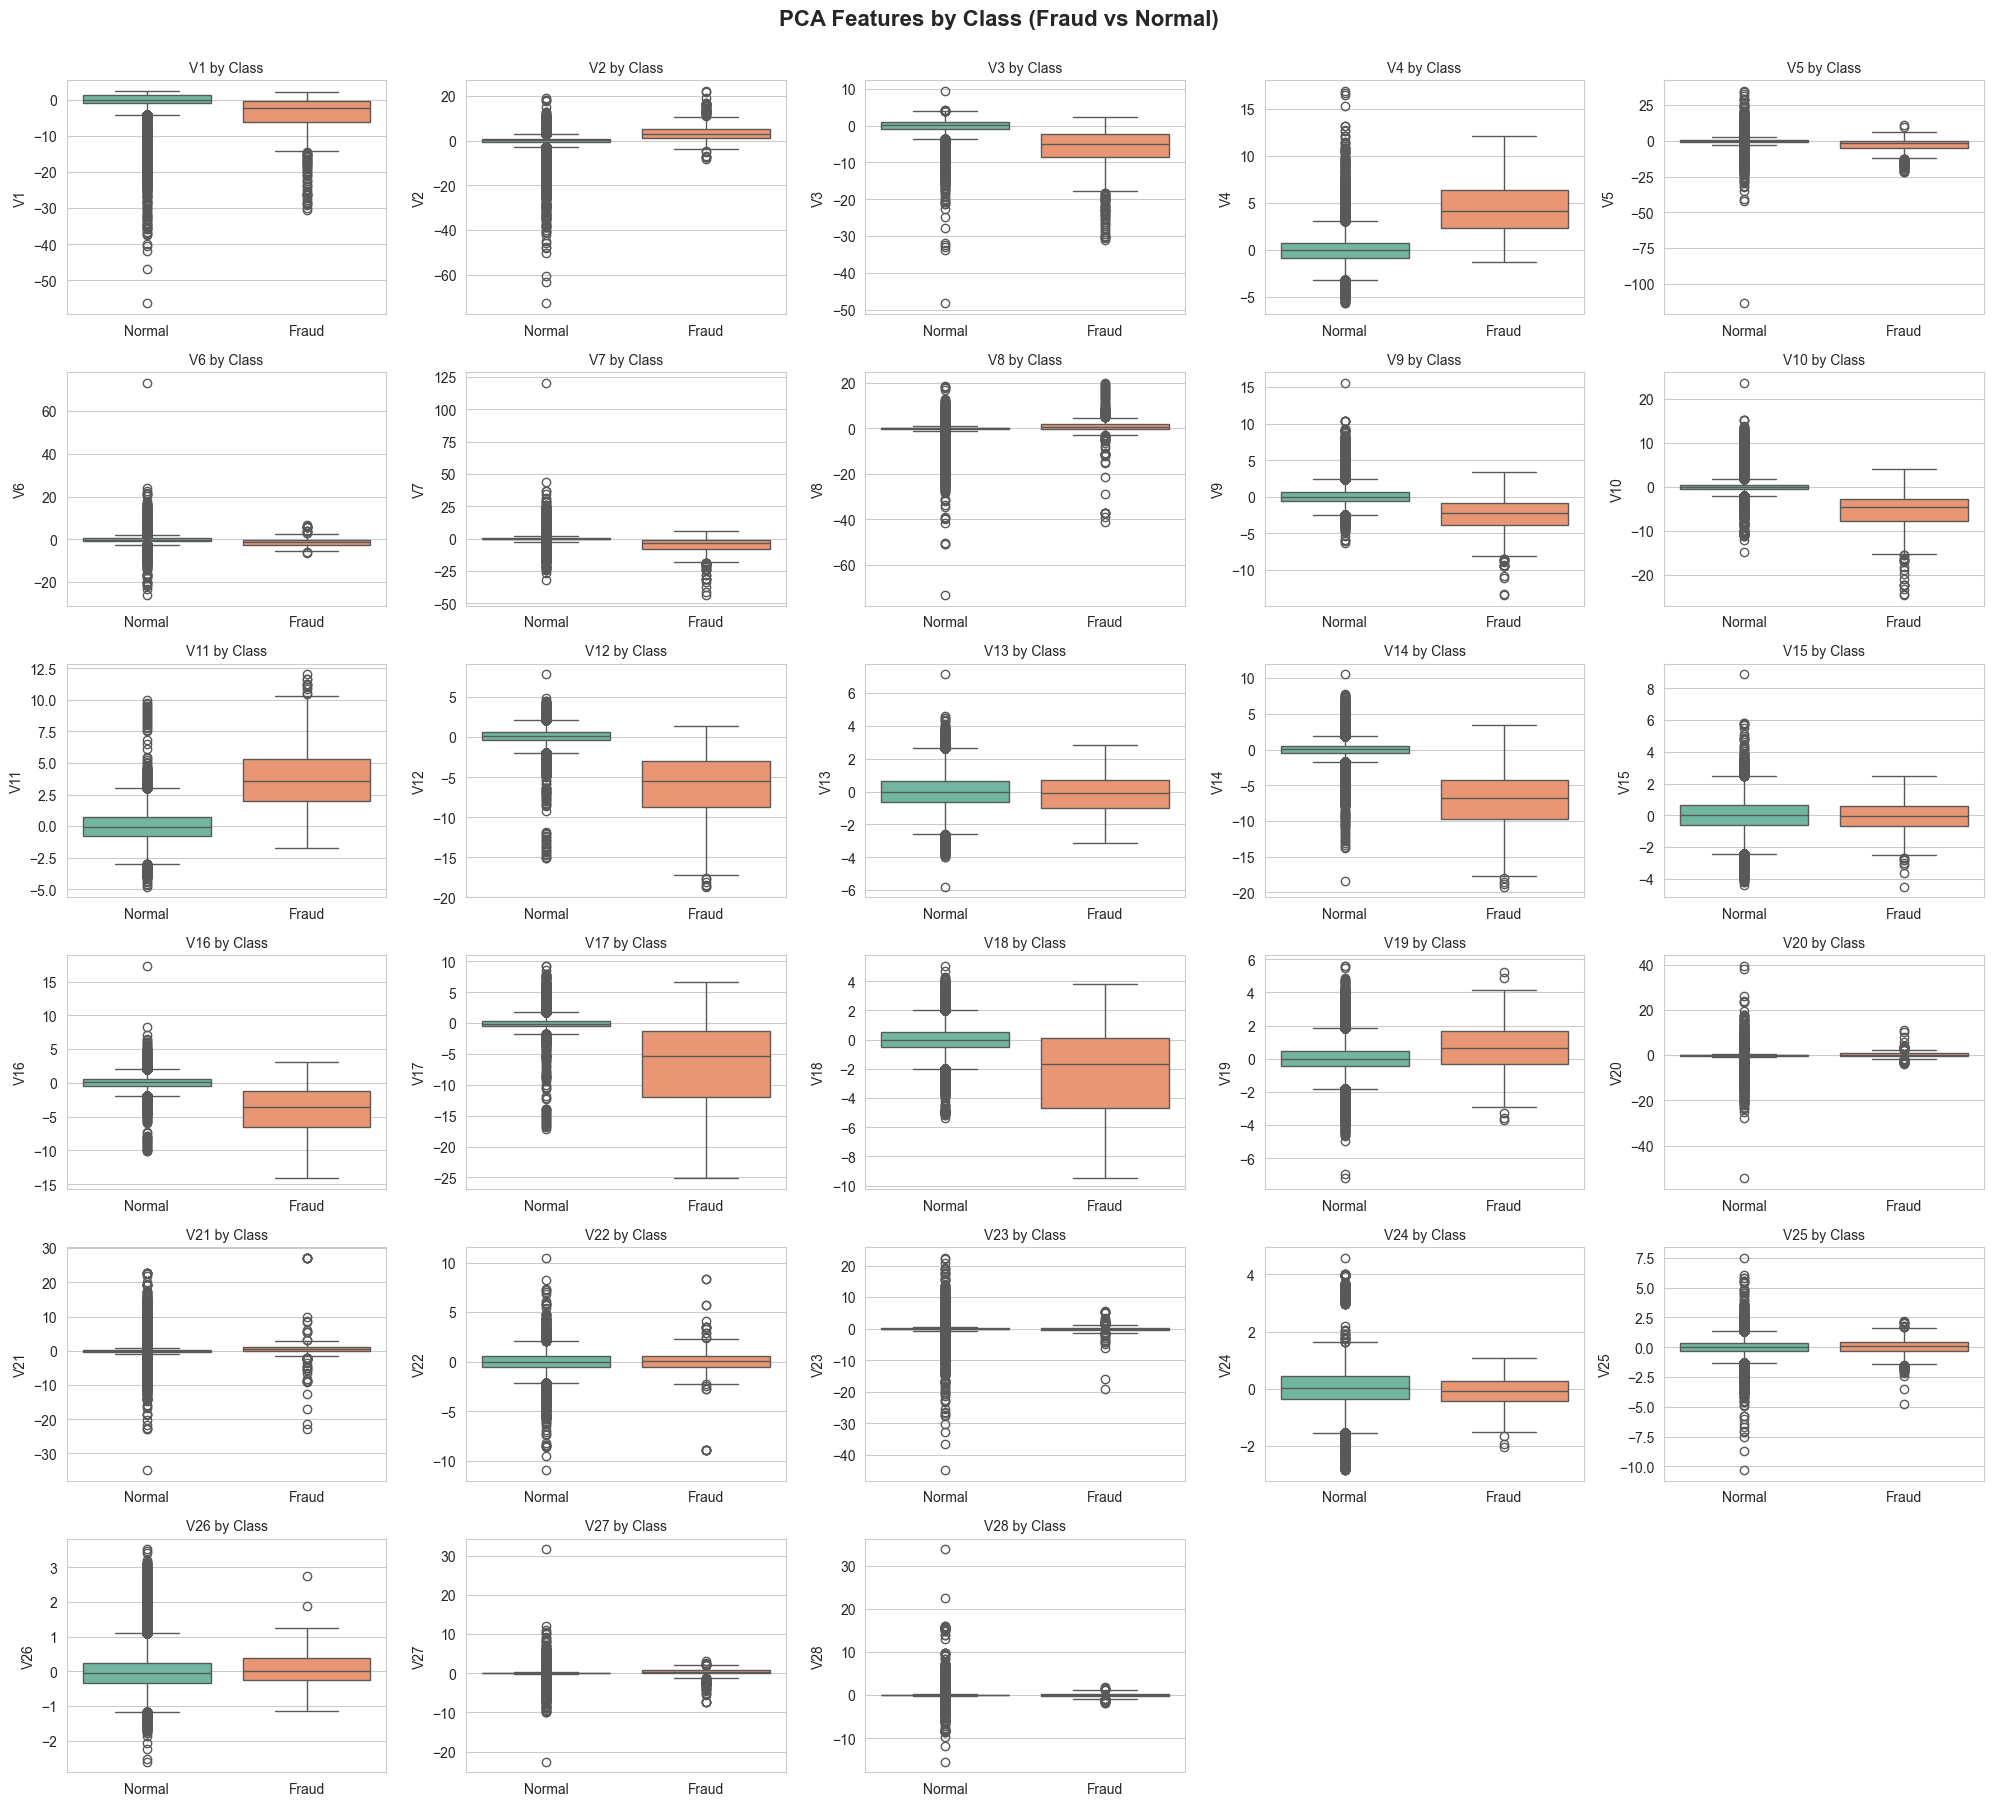

In [126]:
# Box plots for PCA features by Class
n_cols = 5
n_rows = int(np.ceil(len(pca_features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(pca_features):
    sns.boxplot(data=credit_df, x='Class', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} by Class', fontsize=10)
    axes[idx].set_xticklabels(['Normal', 'Fraud'])
    axes[idx].set_xlabel('')

for idx in range(len(pca_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('PCA Features by Class (Fraud vs Normal)', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

## 20. Credit Card Dataset - Correlation Analysis

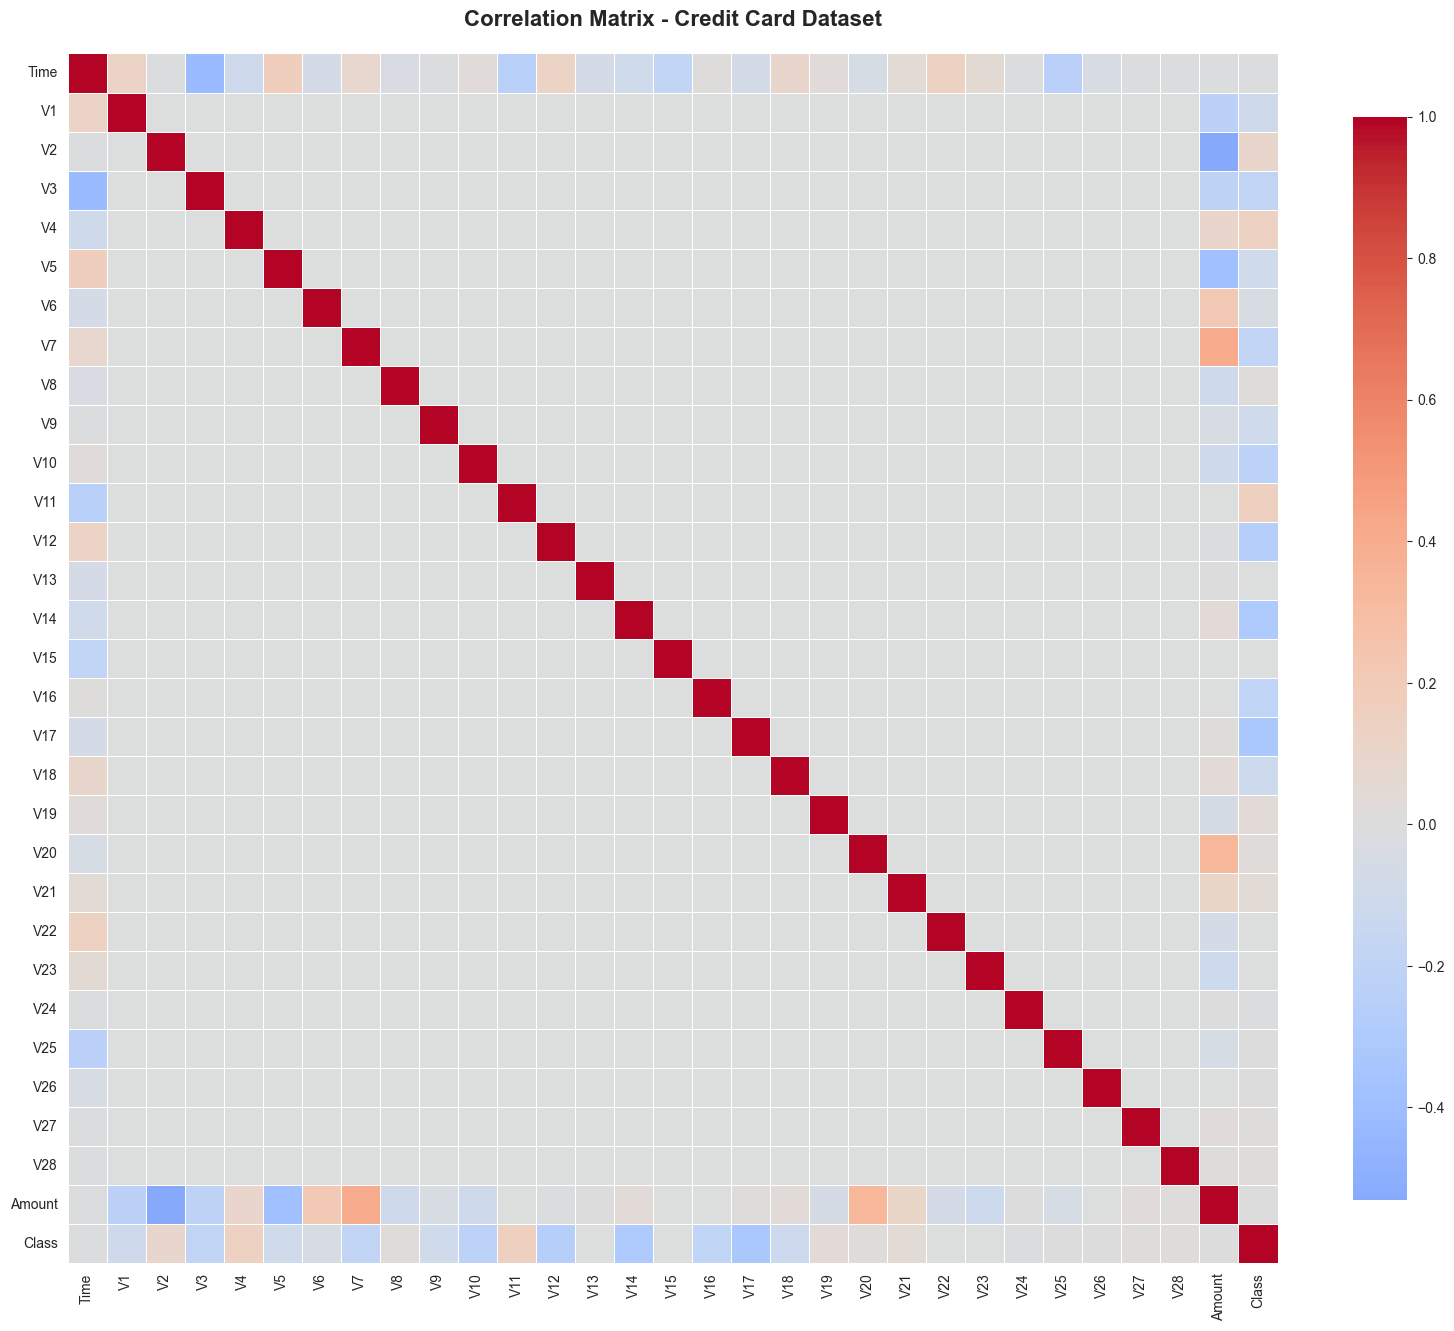


Top 15 Features Correlated with Target (Class):


V17   0.3265
V14   0.3025
V12   0.2606
V10   0.2169
V16   0.1965
V3    0.1930
V7    0.1873
V11   0.1549
V4    0.1334
V18   0.1115
V1    0.1013
V9    0.0977
V5    0.0950
V2    0.0913
V6    0.0436
Name: Class, dtype: float64

In [127]:
# Correlation matrix for all features
correlation_matrix_credit = credit_df.corr()

# Heatmap (full)
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_credit, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Credit Card Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with target
print("\nTop 15 Features Correlated with Target (Class):")
target_corr_credit = correlation_matrix_credit['Class'].abs().sort_values(ascending=False)
display(target_corr_credit[1:16])  # Exclude self-correlation

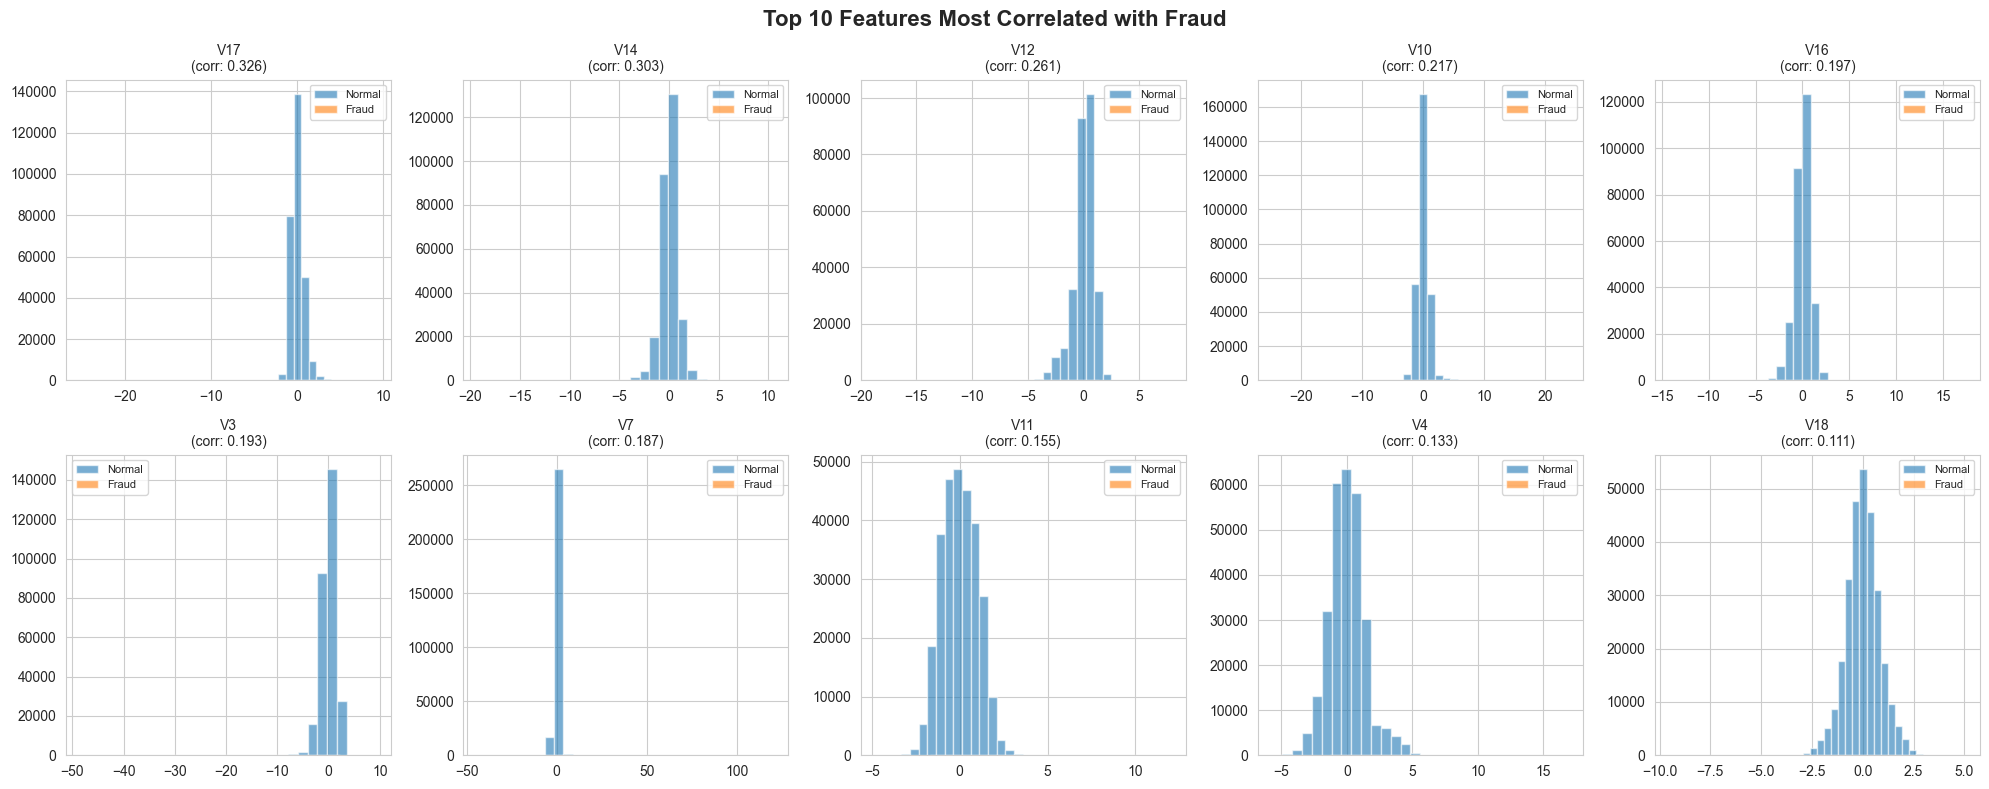

In [128]:
# Visualize top correlations with target
top_corr_features = target_corr_credit[1:11].index.tolist()  # Top 10

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_corr_features):
    for class_val in [0, 1]:
        data = credit_df[credit_df['Class'] == class_val][feature]
        axes[idx].hist(data, alpha=0.6, bins=30)
    axes[idx].set_title(f'{feature}\n(corr: {target_corr_credit[feature]:.3f})', fontsize=10)
    axes[idx].legend(['Normal', 'Fraud'], fontsize=8)
    axes[idx].set_xlabel('')

plt.suptitle('Top 10 Features Most Correlated with Fraud', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [129]:
# ============================================================================
# COMPREHENSIVE INSIGHTS ANALYSIS - CREDIT CARD FRAUD DATASET
# ============================================================================

print("="*90)
print(" "*15 + "CREDIT CARD FRAUD DATASET - DETAILED INSIGHTS REPORT")
print("="*90)

# 1. FRAUD DISTRIBUTION INSIGHTS
print("\n" + "─"*90)
print("1️⃣  FRAUD DISTRIBUTION & CLASS IMBALANCE")
print("─"*90)

fraud_dist = credit_df['Class'].value_counts()
fraud_pct = credit_df['Class'].value_counts(normalize=True) * 100

print(f"\n📊 Transaction Classification:")
print(f"   • Normal Transactions (0): {fraud_dist[0]:,} ({fraud_pct[0]:.4f}%)")
print(f"   • Fraudulent Transactions (1): {fraud_dist[1]:,} ({fraud_pct[1]:.4f}%)")
print(f"   • Imbalance Ratio: {fraud_dist[0]/fraud_dist[1]:.1f}:1")

print(f"\n   🚨 CRITICAL INSIGHT:")
print(f"      This is a SEVERELY IMBALANCED dataset!")
print(f"      Only {fraud_pct[1]:.4f}% of transactions are fraudulent")
print(f"      For every 1 fraud, there are {fraud_dist[0]/fraud_dist[1]:.0f} normal transactions")

# 2. TEMPORAL PATTERNS
print("\n" + "─"*90)
print("2️⃣  TEMPORAL PATTERNS & TIMING INSIGHTS")
print("─"*90)

print(f"\n🕐 Time Coverage:")
total_hours = credit_df['Time'].max() / 3600
total_days = total_hours / 24
print(f"   • Total Time Span: {total_hours:.1f} hours ({total_days:.1f} days)")
print(f"   • Time Range: 0 to {credit_df['Time'].max():,.0f} seconds")

# Time distribution of fraud
credit_df['Time_hours'] = credit_df['Time'] / 3600

fraud_time = credit_df[credit_df['Class'] == 1]['Time_hours']
normal_time = credit_df[credit_df['Class'] == 0]['Time_hours']

print(f"\n   Transaction Timing:")
print(f"   • Normal Transactions - Mean Time: {normal_time.mean():.1f} hours")
print(f"   • Fraud Transactions - Mean Time: {fraud_time.mean():.1f} hours")
print(f"   • Median Time Difference: {abs(fraud_time.median() - normal_time.median()):.1f} hours")

# Peak fraud hours
fraud_by_hour = credit_df[credit_df['Class'] == 1].groupby(credit_df['Time_hours'].astype(int)).size()
if len(fraud_by_hour) > 0:
    peak_hour = fraud_by_hour.idxmax()
    peak_count = fraud_by_hour.max()
    print(f"\n   ⏰ Peak Fraud Activity:")
    print(f"      • Hour {peak_hour}: {peak_count} fraudulent transactions")
    print(f"      💡 INSIGHT: Monitor transactions more carefully during this period")

# 3. TRANSACTION AMOUNT INSIGHTS
print("\n" + "─"*90)
print("3️⃣  TRANSACTION AMOUNT PATTERNS")
print("─"*90)

fraud_amounts = credit_df[credit_df['Class'] == 1]['Amount']
normal_amounts = credit_df[credit_df['Class'] == 0]['Amount']

print(f"\n💰 Normal Transactions:")
print(f"   • Mean Amount: ${normal_amounts.mean():.2f}")
print(f"   • Median Amount: ${normal_amounts.median():.2f}")
print(f"   • Max Amount: ${normal_amounts.max():.2f}")
print(f"   • 95th Percentile: ${normal_amounts.quantile(0.95):.2f}")

print(f"\n💳 Fraudulent Transactions:")
print(f"   • Mean Amount: ${fraud_amounts.mean():.2f}")
print(f"   • Median Amount: ${fraud_amounts.median():.2f}")
print(f"   • Max Amount: ${fraud_amounts.max():.2f}")
print(f"   • 95th Percentile: ${fraud_amounts.quantile(0.95):.2f}")

mean_diff = fraud_amounts.mean() - normal_amounts.mean()
median_diff = fraud_amounts.median() - normal_amounts.median()

print(f"\n   📊 Comparison:")
print(f"   • Mean Difference: ${mean_diff:.2f} ({'higher' if mean_diff > 0 else 'lower'} for fraud)")
print(f"   • Median Difference: ${median_diff:.2f} ({'higher' if median_diff > 0 else 'lower'} for fraud)")

if abs(mean_diff) > 50 or abs(median_diff) > 50:
    print(f"   💡 KEY INSIGHT: Significant difference in transaction amounts between fraud and normal")
else:
    print(f"   💡 KEY INSIGHT: Similar transaction amounts - amount alone may not be discriminative")

# Amount ranges
print(f"\n   💵 Fraud by Amount Range:")
ranges = [(0, 50), (50, 100), (100, 200), (200, 500), (500, 10000)]
for low, high in ranges:
    count = ((fraud_amounts >= low) & (fraud_amounts < high)).sum()
    pct = count / len(fraud_amounts) * 100
    print(f"   • ${low:4d} - ${high:5d}: {count:4d} frauds ({pct:5.1f}%)")

# 4. PCA FEATURES ANALYSIS
print("\n" + "─"*90)
print("4️⃣  PCA FEATURES INSIGHTS")
print("─"*90)

print(f"\n🔐 Feature Transformation:")
print(f"   • Total PCA Components: {len(pca_features)}")
print(f"   • Features are anonymized via PCA for confidentiality")
print(f"   • Original feature meanings are not disclosed")

# Correlation with fraud
pca_fraud_corr = credit_df[pca_features + ['Class']].corr()['Class'].abs().sort_values(ascending=False)

print(f"\n   🎯 Top 10 Most Discriminative PCA Components:")
for idx, (feature, corr) in enumerate(pca_fraud_corr[1:11].items(), 1):
    bars = "█" * int(corr * 100)
    impact = "Strong" if corr > 0.3 else "Moderate" if corr > 0.15 else "Weak"
    print(f"   {idx:2d}. {feature:5s} │ {bars:<30s} │ {corr:.4f} ({impact})")

# Most important features
strong_features = pca_fraud_corr[pca_fraud_corr > 0.3].index.tolist()
if 'Class' in strong_features:
    strong_features.remove('Class')
print(f"\n   💡 INSIGHT: {len(strong_features)} PCA features show strong correlation (>0.3) with fraud")

# 5. FRAUD DETECTION CHALLENGE
print("\n" + "─"*90)
print("5️⃣  FRAUD DETECTION CHALLENGES")
print("─"*90)

print(f"\n⚠️  Key Challenges:")
print(f"   1. Extreme Class Imbalance ({fraud_dist[0]/fraud_dist[1]:.0f}:1 ratio)")
print(f"      • Traditional accuracy metric is meaningless")
print(f"      • A model predicting all transactions as 'normal' would be {fraud_pct[0]:.2f}% accurate!")
print(f"      • Need precision/recall trade-off optimization")

print(f"\n   2. Cost of Errors:")
print(f"      • False Negative (missing fraud): Direct financial loss")
print(f"      • False Positive (flagging normal): Customer inconvenience, investigation cost")
print(f"      • Asymmetric cost function needed")

print(f"\n   3. Feature Interpretability:")
print(f"      • PCA transformation makes features non-interpretable")
print(f"      • Cannot explain WHY a transaction is flagged")
print(f"      • May require additional explanation methods")

# 6. DATA QUALITY ASSESSMENT
print("\n" + "─"*90)
print("6️⃣  DATA QUALITY ASSESSMENT")
print("─"*90)

print(f"\n✅ Quality Metrics:")
print(f"   • Missing Values: {credit_df.isnull().sum().sum()} (0%)")
print(f"   • Duplicate Rows: {credit_df.duplicated().sum()}")
print(f"   • Data Types: All numerical (ready for modeling)")
print(f"   • Outliers: Expected in fraud detection (frauds are outliers by nature)")

# Verify PCA scaling
pca_means = credit_df[pca_features].mean()
pca_stds = credit_df[pca_features].std()

print(f"\n   📏 PCA Feature Scaling:")
print(f"   • Mean range: [{pca_means.min():.6f}, {pca_means.max():.6f}]")
print(f"   • Std range: [{pca_stds.min():.4f}, {pca_stds.max():.4f}]")
print(f"   • All PCA features are already standardized ✓")

print(f"\n   • Time feature:")
print(f"      - Range: [0, {credit_df['Time'].max():,.0f}] seconds")
print(f"      - Needs scaling: YES (different scale from PCA features)")

print(f"\n   • Amount feature:")
print(f"      - Range: [${credit_df['Amount'].min():.2f}, ${credit_df['Amount'].max():.2f}]")
print(f"      - Needs scaling: YES (different scale from PCA features)")

# 7. STATISTICAL TESTS
print("\n" + "─"*90)
print("7️⃣  STATISTICAL SIGNIFICANCE TESTS")
print("─"*90)

from scipy.stats import ttest_ind, mannwhitneyu

# Test for Amount
t_stat_amt, p_val_amt = ttest_ind(fraud_amounts, normal_amounts)
u_stat_amt, p_val_mw_amt = mannwhitneyu(fraud_amounts, normal_amounts)

print(f"\n📊 Amount Distribution Test:")
print(f"   • T-test p-value: {p_val_amt:.2e}")
print(f"   • Mann-Whitney U p-value: {p_val_mw_amt:.2e}")
if p_val_amt < 0.05:
    print(f"   • Result: SIGNIFICANT difference in amounts ✓")
else:
    print(f"   • Result: NO significant difference in amounts")

# Test for Time
fraud_time_sec = credit_df[credit_df['Class'] == 1]['Time']
normal_time_sec = credit_df[credit_df['Class'] == 0]['Time']
t_stat_time, p_val_time = ttest_ind(fraud_time_sec, normal_time_sec)

print(f"\n⏰ Time Distribution Test:")
print(f"   • T-test p-value: {p_val_time:.2e}")
if p_val_time < 0.05:
    print(f"   • Result: SIGNIFICANT difference in timing ✓")
else:
    print(f"   • Result: NO significant difference in timing")

# 8. FRAUD RATE ANALYSIS
print("\n" + "─"*90)
print("8️⃣  FRAUD RATE ANALYSIS BY SEGMENTS")
print("─"*90)

# By time periods
credit_df['hour_of_day'] = (credit_df['Time'] / 3600) % 24
credit_df['time_period'] = pd.cut(credit_df['hour_of_day'], 
                                   bins=[0, 6, 12, 18, 24],
                                   labels=['Night (0-6h)', 'Morning (6-12h)', 'Afternoon (12-18h)', 'Evening (18-24h)'])

print(f"\n🕐 Fraud Rate by Time of Day:")
for period in ['Night (0-6h)', 'Morning (6-12h)', 'Afternoon (12-18h)', 'Evening (18-24h)']:
    if period in credit_df['time_period'].values:
        period_data = credit_df[credit_df['time_period'] == period]
        fraud_rate = period_data['Class'].mean() * 100
        fraud_count = period_data['Class'].sum()
        total_count = len(period_data)
        print(f"   • {period:20s}: {fraud_count:4d}/{total_count:6d} ({fraud_rate:.4f}%)")

# By amount buckets
credit_df['amount_bucket'] = pd.cut(credit_df['Amount'], 
                                     bins=[0, 50, 100, 200, 500, 10000],
                                     labels=['$0-50', '$50-100', '$100-200', '$200-500', '$500+'])

print(f"\n💰 Fraud Rate by Amount Range:")
for bucket in ['$0-50', '$50-100', '$100-200', '$200-500', '$500+']:
    if bucket in credit_df['amount_bucket'].values:
        bucket_data = credit_df[credit_df['amount_bucket'] == bucket]
        fraud_rate = bucket_data['Class'].mean() * 100
        fraud_count = bucket_data['Class'].sum()
        total_count = len(bucket_data)
        print(f"   • {bucket:12s}: {fraud_count:4d}/{total_count:6d} ({fraud_rate:.4f}%)")

# 9. RECOMMENDATIONS
print("\n" + "─"*90)
print("9️⃣  CRITICAL RECOMMENDATIONS FOR FRAUD DETECTION")
print("─"*90)

print(f"""
🎯 Handling Class Imbalance (CRITICAL):
   1. ⚠️  DO NOT use accuracy as evaluation metric
   2. ✓ Use: Precision-Recall AUC, F1-Score, ROC-AUC
   3. ✓ Consider: SMOTE, ADASYN, or other resampling techniques
   4. ✓ Use class weights in models
   5. ✓ Try anomaly detection approaches (Isolation Forest, One-Class SVM)
   6. ✓ MANDATORY: Stratified train-test split

📊 Evaluation Strategy:
   1. Primary Metric: Precision-Recall AUC (better for imbalanced data)
   2. Secondary Metrics: 
      • Precision @ fixed recall (e.g., 90% recall)
      • F1-Score
      • Matthews Correlation Coefficient (MCC)
   3. Business Metrics:
      • Cost-weighted accuracy
      • Expected monetary value

🔧 Feature Engineering:
   1. ✓ Scale Time and Amount features (use StandardScaler or RobustScaler)
   2. ✓ Consider time-based features: hour of day, day of week
   3. ✓ Keep PCA features as-is (already scaled)
   4. ✓ Try feature interactions with top PCA components

🤖 Model Selection Priority:
   1. Ensemble Methods:
      • XGBoost with scale_pos_weight parameter
      • LightGBM with is_unbalance=True
      • Random Forest with class_weight='balanced'
   
   2. Anomaly Detection:
      • Isolation Forest
      • Local Outlier Factor (LOF)
      • AutoEncoders (Neural Networks)
   
   3. Cost-Sensitive Learning:
      • Custom loss functions
      • Threshold optimization

⚡ Top Predictive Features to Monitor:
""")

# Show top features
for idx, (feature, corr) in enumerate(pca_fraud_corr[1:6].items(), 1):
    print(f"   {idx}. {feature}: {corr:.4f} correlation")

print(f"""
🔍 Threshold Optimization:
   • Default 0.5 threshold is WRONG for imbalanced data
   • Optimize threshold based on business cost
   • Example: If missing fraud costs 100x more than false alarm,
     use lower threshold (e.g., 0.1 or 0.05)

📈 Cross-Validation:
   • Use Stratified K-Fold (maintain fraud ratio in each fold)
   • Minimum 5 folds recommended
   • Consider time-based split if temporal ordering matters
""")

print("="*90)

# Clean up temporary columns
credit_df.drop(['hour_of_day', 'time_period', 'amount_bucket'], axis=1, inplace=True)

               CREDIT CARD FRAUD DATASET - DETAILED INSIGHTS REPORT

──────────────────────────────────────────────────────────────────────────────────────────
1️⃣  FRAUD DISTRIBUTION & CLASS IMBALANCE
──────────────────────────────────────────────────────────────────────────────────────────

📊 Transaction Classification:
   • Normal Transactions (0): 284,315 (99.8273%)
   • Fraudulent Transactions (1): 492 (0.1727%)
   • Imbalance Ratio: 577.9:1

   🚨 CRITICAL INSIGHT:
      This is a SEVERELY IMBALANCED dataset!
      Only 0.1727% of transactions are fraudulent
      For every 1 fraud, there are 578 normal transactions

──────────────────────────────────────────────────────────────────────────────────────────
2️⃣  TEMPORAL PATTERNS & TIMING INSIGHTS
──────────────────────────────────────────────────────────────────────────────────────────

🕐 Time Coverage:
   • Total Time Span: 48.0 hours (2.0 days)
   • Time Range: 0 to 172,792 seconds

   Transaction Timing:
   • Normal Transaction

## 🔍 DETAILED INSIGHTS: Credit Card Dataset - Complete Analysis

## 21. Credit Card Dataset - Outlier Analysis

In [130]:
# Outlier detection for original features
outlier_summary_credit = []

for col in ['Time', 'Amount']:
    Q1 = credit_df[col].quantile(0.25)
    Q3 = credit_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = credit_df[(credit_df[col] < lower_bound) | (credit_df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(credit_df)) * 100
    
    outlier_summary_credit.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': round(outlier_percentage, 2)
    })

outlier_df_credit = pd.DataFrame(outlier_summary_credit)

print("Outlier Summary for Original Features:")
display(outlier_df_credit)

Outlier Summary for Original Features:


Feature         Q1          Q3        IQR  Lower_Bound  Upper_Bound  \
0    Time 54201.5000 139320.5000 85119.0000  -73477.0000  266999.0000   
1  Amount     5.6000     77.1650    71.5650    -101.7475     184.5125   

   Outlier_Count  Outlier_Percentage  
0              0              0.0000  
1          31904             11.2000

## 22. Time-based Analysis

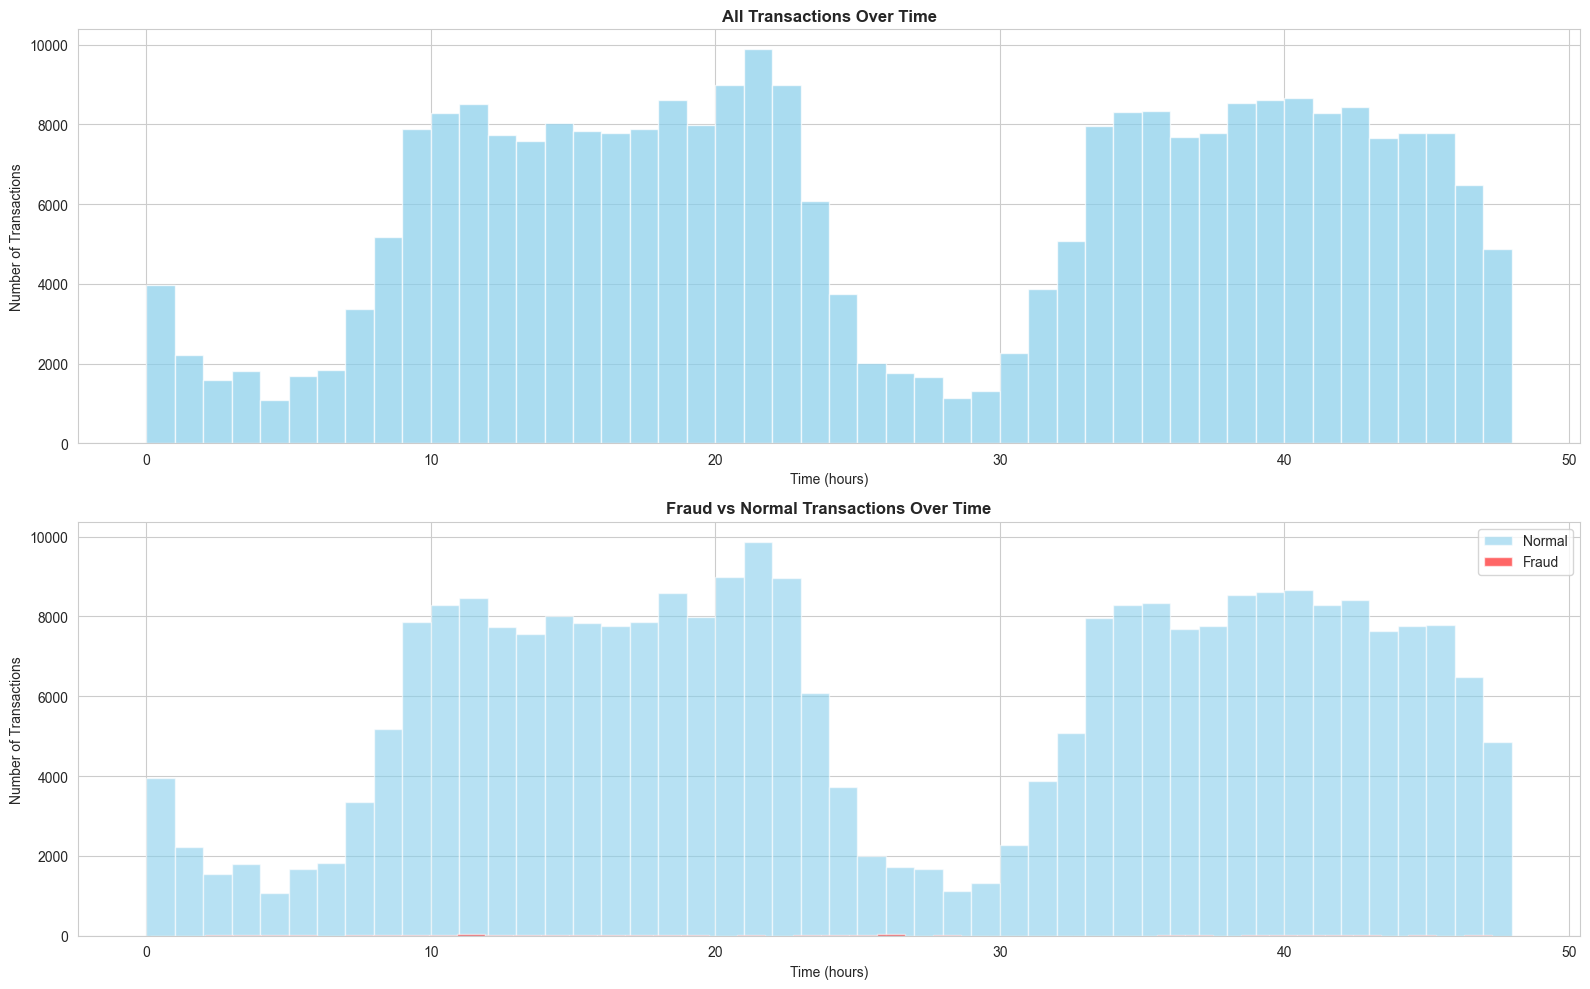

In [131]:
# Convert Time to hours
credit_df['Time_hours'] = credit_df['Time'] / 3600

# Fraud transactions over time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# All transactions over time
axes[0].hist(credit_df['Time_hours'], bins=48, color='skyblue', alpha=0.7)
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('All Transactions Over Time', fontweight='bold')

# Fraud vs Normal over time
for class_val, label, color in [(0, 'Normal', 'skyblue'), (1, 'Fraud', 'red')]:
    data = credit_df[credit_df['Class'] == class_val]['Time_hours']
    axes[1].hist(data, bins=48, alpha=0.6, label=label, color=color)
axes[1].set_xlabel('Time (hours)')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title('Fraud vs Normal Transactions Over Time', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

In [132]:
# ============================================================================
# FINAL INSIGHTS: SIDE-BY-SIDE COMPARISON & MODELING ROADMAP
# ============================================================================

print("="*100)
print(" "*30 + "COMPARATIVE ANALYSIS & MODELING GUIDE")
print("="*100)

# Create comprehensive comparison
comparison_data = {
    'Aspect': [
        'Dataset Size',
        'Number of Features',
        'Target Variable',
        'Class Balance',
        'Imbalance Severity',
        'Missing Values',
        'Duplicates',
        'Domain',
        'Primary Challenge',
        'Feature Types',
        'Feature Interpretability',
        'Outliers',
        'Recommended Scaling'
    ],
    'Cardio Train Dataset': [
        f"{len(cardio_df):,} samples",
        f"{len(cardio_df.columns)-1} features",
        'cardio (0/1)',
        f"{cardio_df['cardio'].value_counts().max()/cardio_df['cardio'].value_counts().min():.2f}:1",
        '⚠️ Moderate' if cardio_df['cardio'].value_counts().max()/cardio_df['cardio'].value_counts().min() > 1.5 else '✅ Low',
        f"{cardio_df.isnull().sum().sum()} (0%)",
        f"{cardio_df.duplicated().sum()}",
        '🏥 Healthcare',
        'Data quality, outliers',
        'Mixed (numerical + categorical)',
        '✅ Highly interpretable',
        '⚠️ Many physiological outliers',
        'StandardScaler'
    ],
    'Credit Card Dataset': [
        f"{len(credit_df):,} samples",
        f"{len(credit_df.columns)-1} features",
        'Class (0/1)',
        f"{credit_df['Class'].value_counts().max()/credit_df['Class'].value_counts().min():.1f}:1",
        '🚨 SEVERE',
        f"{credit_df.isnull().sum().sum()} (0%)",
        f"{credit_df.duplicated().sum()}",
        '💳 Finance',
        'Extreme class imbalance',
        'All numerical (PCA)',
        '❌ Not interpretable (PCA)',
        '✅ Expected (fraud = anomaly)',
        'Only Time & Amount'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n📊 DATASET COMPARISON TABLE:")
print("="*100)
display(comparison_df)

# Key Differences
print("\n" + "="*100)
print("🔍 KEY DIFFERENCES & IMPLICATIONS")
print("="*100)

print(f"""
┌─ CARDIO TRAIN DATASET ────────────────────────────────────────────────────┐
│                                                                              │
│  ✅ ADVANTAGES:                                                             │
│     • Well-balanced classes - easier to train                               │
│     • Interpretable features - can explain predictions to doctors           │
│     • Medical domain knowledge can guide feature engineering                │
│     • Clear feature meanings (age, BP, cholesterol, etc.)                   │
│                                                                              │
│  ⚠️  CHALLENGES:                                                            │
│     • Data quality issues (impossible BP values)                            │
│     • Outliers need careful handling                                        │
│     • Medical accuracy is critical (false negatives = missed diagnosis)     │
│     • Feature correlation (BP features are related)                         │
│                                                                              │
│  🎯 PRIORITY ACTIONS:                                                       │
│     1. Clean outliers (especially BP > 250 or < 60)                         │
│     2. Feature engineering (BMI, pulse pressure already done ✓)             │
│     3. Domain-driven feature selection                                      │
│     4. Ensemble methods for robust predictions                              │
│                                                                              │
└──────────────────────────────────────────────────────────────────────────────┘

┌─ CREDIT CARD DATASET ─────────────────────────────────────────────────────┐
│                                                                              │
│  ✅ ADVANTAGES:                                                             │
│     • Clean data (no missing values)                                        │
│     • PCA features already scaled                                           │
│     • Large sample size                                                     │
│     • Clear fraud/normal separation in top features                         │
│                                                                              │
│  🚨 CRITICAL CHALLENGES:                                                    │
│     • EXTREME class imbalance (578:1 ratio!)                                │
│     • Cannot use accuracy metric                                            │
│     • High cost of false negatives (missed fraud)                           │
│     • PCA makes interpretation impossible                                   │
│     • Threshold optimization crucial                                        │
│                                                                              │
│  🎯 PRIORITY ACTIONS:                                                       │
│     1. MUST use stratified sampling                                         │
│     2. Try SMOTE/ADASYN or class weighting                                  │
│     3. Focus on Precision-Recall curve, not ROC                             │
│     4. Consider anomaly detection approaches                                │
│     5. Optimize decision threshold based on business cost                   │
│                                                                              │
└──────────────────────────────────────────────────────────────────────────────┘
""")

# Detailed Modeling Recommendations
print("\n" + "="*100)
print("🤖 COMPLETE MODELING ROADMAP")
print("="*100)

print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                         CARDIO TRAIN - MODELING PIPELINE                     ║
╚══════════════════════════════════════════════════════════════════════════════╝

📋 STEP 1: DATA PREPROCESSING
   ┌────────────────────────────────────────────────────────────────────┐
   │ 1.1 Outlier Treatment                                              │
   │     • Remove: ap_hi < 60 or > 250, ap_lo < 40 or > 150             │
   │     • Remove: height < 130 or > 220 cm                             │
   │     • Remove: weight < 30 or > 250 kg                              │
   │     • Alternative: Use RobustScaler instead of removing            │
   │                                                                    │
   │ 1.2 Feature Engineering (DONE ✓)                                   │
   │     • BMI = weight / (height/100)²                                 │
   │     • pulse_pressure = ap_hi - ap_lo                               │
   │     • mean_arterial_pressure = (ap_hi + 2*ap_lo) / 3               │
   │     • Consider: age × cholesterol interaction                      │
   │                                                                    │
   │ 1.3 Encoding                                                       │
   │     • One-hot encode: bmi_category, age_group                      │
   │     • Keep binary as-is: gender, smoke, alco, active               │
   │     • Ordinal encode: cholesterol, gluc (1,2,3 → keep as numeric) │
   │                                                                    │
   │ 1.4 Scaling                                                        │
   │     • StandardScaler for: age, height, weight, bp, bmi, etc.       │
   │     • After train-test split!                                      │
   └────────────────────────────────────────────────────────────────────┘

🔧 STEP 2: TRAIN-TEST SPLIT
   • Use: train_test_split with stratify=y
   • Split: 80-20 or 70-30
   • Random state: Set for reproducibility

🎯 STEP 3: MODEL SELECTION (Try in this order)
   ┌────────────────────────────────────────────────────────────────────┐
   │ Priority 1: Ensemble Methods                                       │
   │   • XGBoost (fast, handles mixed features well)                    │
   │   • LightGBM (very fast for large data)                            │
   │   • Random Forest (interpretable, robust)                          │
   │                                                                    │
   │ Priority 2: Gradient Boosting                                      │
   │   • CatBoost (handles categorical features natively)               │
   │   • GradientBoostingClassifier (sklearn)                           │
   │                                                                    │
   │ Priority 3: Linear Models (for comparison)                         │
   │   • Logistic Regression with L2 regularization                     │
   │   • SVM with RBF kernel                                            │
   │                                                                    │
   │ Priority 4: Neural Networks (if time permits)                      │
   │   • Simple MLP with 2-3 hidden layers                              │
   │   • Use dropout for regularization                                 │
   └────────────────────────────────────────────────────────────────────┘

📊 STEP 4: EVALUATION METRICS
   • Primary: ROC-AUC, F1-Score
   • Secondary: Precision, Recall, Sensitivity, Specificity
   • Medical Focus: Minimize False Negatives (missed diagnosis)
   • Consider: Cost matrix (FN cost > FP cost)

🔍 STEP 5: HYPERPARAMETER TUNING
   • Use: RandomizedSearchCV or Optuna
   • CV Strategy: StratifiedKFold (5-10 folds)
   • Optimize for: ROC-AUC or F1-Score

⚙️  STEP 6: FEATURE IMPORTANCE
   • Extract feature importance from tree models
   • Use SHAP values for explanation
   • Validate with medical domain knowledge


╔══════════════════════════════════════════════════════════════════════════════╗
║                      CREDIT CARD - FRAUD DETECTION PIPELINE                  ║
╚══════════════════════════════════════════════════════════════════════════════╝

📋 STEP 1: DATA PREPROCESSING
   ┌────────────────────────────────────────────────────────────────────┐
   │ 1.1 Feature Scaling                                                │
   │     • PCA features (V1-V28): Already scaled ✓                      │
   │     • Time: Apply StandardScaler                                   │
   │     • Amount: Apply RobustScaler (due to outliers)                 │
   │                                                                    │
   │ 1.2 Feature Engineering (Optional)                                 │
   │     • Time: hour_of_day = (Time / 3600) % 24                       │
   │     • Time: day_number = Time // 86400                             │
   │     • Amount: log(Amount + 1) - try log transformation             │
   │     • Interactions: Amount × V1, Amount × V2, etc. (top features)  │
   └────────────────────────────────────────────────────────────────────┘

🔧 STEP 2: TRAIN-TEST SPLIT ⚠️ CRITICAL!
   • MUST use stratify=y to maintain fraud ratio
   • Split: 80-20 (ensure enough frauds in test set)
   • Check: Verify fraud % is same in train and test

⚖️  STEP 3: HANDLE CLASS IMBALANCE ⚠️ MOST IMPORTANT STEP!
   ┌────────────────────────────────────────────────────────────────────┐
   │ Choose ONE of these approaches:                                    │
   │                                                                    │
   │ Option A: Resampling (Recommended)                                 │
   │   • SMOTE (Synthetic Minority Over-sampling)                       │
   │   • ADASYN (Adaptive Synthetic Sampling)                           │
   │   • Combined: SMOTETomek or SMOTEENN                               │
   │   ⚠️  Apply ONLY to training data, never to test data!            │
   │                                                                    │
   │ Option B: Class Weights (Easier)                                   │
   │   • XGBoost: scale_pos_weight = 578                                │
   │   • LightGBM: is_unbalance=True                                    │
   │   • RandomForest: class_weight='balanced'                          │
   │   • Sklearn: compute_class_weight('balanced')                      │
   │                                                                    │
   │ Option C: Anomaly Detection (Different approach)                   │
   │   • Isolation Forest                                               │
   │   • One-Class SVM                                                  │
   │   • Autoencoder (train on normal transactions only)                │
   │   • Local Outlier Factor (LOF)                                     │
   │                                                                    │
   │ Option D: Cost-Sensitive Learning                                  │
   │   • Custom loss function with asymmetric costs                     │
   │   • Focal Loss                                                     │
   └────────────────────────────────────────────────────────────────────┘

🎯 STEP 4: MODEL SELECTION (Try multiple approaches)
   ┌────────────────────────────────────────────────────────────────────┐
   │ Approach 1: Supervised Learning with Class Weights                 │
   │   • XGBoost (scale_pos_weight=578)                                 │
   │   • LightGBM (is_unbalance=True)                                   │
   │   • Random Forest (class_weight='balanced')                        │
   │                                                                    │
   │ Approach 2: Resampled Data                                         │
   │   • Train on SMOTE-balanced data                                   │
   │   • Use any classifier (Logistic, RF, XGBoost, etc.)               │
   │                                                                    │
   │ Approach 3: Anomaly Detection                                      │
   │   • Isolation Forest (contamination=0.002)                         │
   │   • One-Class SVM                                                  │
   │   • Autoencoder (reconstruction error threshold)                   │
   │                                                                    │
   │ Approach 4: Ensemble All Above                                     │
   │   • Combine predictions from multiple approaches                   │
   │   • Voting or stacking                                             │
   └────────────────────────────────────────────────────────────────────┘

📊 STEP 5: EVALUATION ⚠️ DO NOT USE ACCURACY!
   ┌────────────────────────────────────────────────────────────────────┐
   │ Primary Metrics:                                                   │
   │   1. Precision-Recall AUC (best for imbalanced)                    │
   │   2. Average Precision Score                                       │
   │   3. F1-Score, F2-Score (if recall more important)                 │
   │   4. Matthews Correlation Coefficient (MCC)                        │
   │                                                                    │
   │ Secondary Metrics:                                                 │
   │   • ROC-AUC (but less informative than PR-AUC here)                │
   │   • Confusion Matrix (at optimized threshold)                      │
   │   • Precision @ 90% Recall                                         │
   │   • Recall @ 95% Precision                                         │
   │                                                                    │
   │ Business Metrics:                                                  │
   │   • Cost = (FN × fraud_cost) + (FP × investigation_cost)           │
   │   • Expected Savings                                               │
   └────────────────────────────────────────────────────────────────────┘

🎚️  STEP 6: THRESHOLD OPTIMIZATION ⚠️ CRUCIAL!
   • Default 0.5 is WRONG for imbalanced data
   • Plot Precision-Recall curve
   • Choose threshold based on business requirements:
     - Need high recall? → Lower threshold (0.1 - 0.3)
     - Need high precision? → Higher threshold (0.5 - 0.7)
   • Consider cost: If FN cost = 100 × FP cost, optimize accordingly

🔍 STEP 7: CROSS-VALIDATION
   • Use StratifiedKFold (5-10 folds)
   • Ensure each fold has same fraud %
   • Average metrics across folds

⚙️  STEP 8: FEATURE IMPORTANCE
   • Identify top discriminative features
   • Focus monitoring on high-impact features
   • Use SHAP for explaining individual predictions


╔══════════════════════════════════════════════════════════════════════════════╗
║                              QUICK REFERENCE                                 ║
╚══════════════════════════════════════════════════════════════════════════════╝

CARDIO TRAIN - Quick Start:
   1. Clean outliers in BP
   2. Use existing engineered features (BMI, pulse_pressure, MAP)
   3. StandardScaler on all numerical features
   4. XGBoost or Random Forest
   5. Optimize for F1-Score or ROC-AUC
   6. StratifiedKFold CV

CREDIT CARD - Quick Start:
   1. Scale Time and Amount only
   2. SMOTE or class_weight='balanced'
   3. XGBoost with scale_pos_weight=578
   4. Optimize for Precision-Recall AUC
   5. Threshold optimization (try 0.1, 0.2, 0.3)
   6. StratifiedKFold CV

╔══════════════════════════════════════════════════════════════════════════════╗
║                           COMMON MISTAKES TO AVOID                           ║
╚══════════════════════════════════════════════════════════════════════════════╝

❌ CARDIO TRAIN:
   1. NOT removing physiologically impossible values
   2. Scaling before train-test split (data leakage)
   3. Ignoring feature correlation (e.g., ap_hi and pulse_pressure)
   4. Using only one metric for evaluation

❌ CREDIT CARD:
   1. Using ACCURACY as metric (99.8% by predicting all normal!)
   2. Applying SMOTE before train-test split (DATA LEAKAGE!)
   3. Not stratifying train-test split
   4. Using default 0.5 threshold
   5. Treating it as balanced classification problem
   6. Not considering business cost of different errors

╔══════════════════════════════════════════════════════════════════════════════╗
║                              SUCCESS CHECKLIST                               ║
╚══════════════════════════════════════════════════════════════════════════════╝

CARDIO TRAIN:
   ☐ Cleaned outliers
   ☐ Applied feature engineering
   ☐ Stratified train-test split
   ☐ Proper scaling (after split)
   ☐ Tried multiple models
   ☐ ROC-AUC > 0.75
   ☐ F1-Score > 0.70
   ☐ Interpretable results

CREDIT CARD:
   ☐ Stratified train-test split
   ☐ Handled class imbalance (SMOTE/weights)
   ☐ Used correct metrics (PR-AUC)
   ☐ Optimized threshold
   ☐ PR-AUC > 0.70
   ☐ Recall > 0.80 (catch most frauds)
   ☐ Precision > 0.70 (minimize false alarms)
   ☐ Confusion matrix analysis

""")

print("="*100)
print(" "*35 + "END OF COMPREHENSIVE ANALYSIS")
print("="*100)

                              COMPARATIVE ANALYSIS & MODELING GUIDE

📊 DATASET COMPARISON TABLE:


Aspect             Cardio Train Dataset  \
0               Dataset Size                   70,000 samples   
1         Number of Features                      18 features   
2            Target Variable                     cardio (0/1)   
3              Class Balance                           1.00:1   
4         Imbalance Severity                            ✅ Low   
5             Missing Values                           0 (0%)   
6                 Duplicates                                0   
7                     Domain                     🏥 Healthcare   
8          Primary Challenge           Data quality, outliers   
9              Feature Types  Mixed (numerical + categorical)   
10  Feature Interpretability           ✅ Highly interpretable   
11                  Outliers   ⚠️ Many physiological outliers   
12       Recommended Scaling                   StandardScaler   

             Credit Card Dataset  
0                284,807 samples  
1                    31 features  
2                    Class (0/1)  
3                        577.9:1  
4                       🚨 SEVERE  
5                         0 (0%)  
6                           1081  
7                      💳 Finance  
8        Extreme class imbalance  
9            All numerical (PCA)  
10     ❌ Not interpretable (PCA)  
11  ✅ Expected (fraud = anomaly)  
12            Only Time & Amount


🔍 KEY DIFFERENCES & IMPLICATIONS

┌─ CARDIO TRAIN DATASET ────────────────────────────────────────────────────┐
│                                                                              │
│  ✅ ADVANTAGES:                                                             │
│     • Well-balanced classes - easier to train                               │
│     • Interpretable features - can explain predictions to doctors           │
│     • Medical domain knowledge can guide feature engineering                │
│     • Clear feature meanings (age, BP, cholesterol, etc.)                   │
│                                                                              │
│  ⚠️  CHALLENGES:                                                            │
│     • Data quality issues (impossible BP values)                            │
│     • Outliers need careful handling                                        │
│     • Medical accuracy is critical (false negatives = missed diagnosis)     │
│     

## 🎯 ACTIONABLE INSIGHTS: Complete Modeling Guide

## 23. Summary Statistics by Dataset

In [133]:
# Summary comparison
summary = pd.DataFrame({
    'Metric': [
        'Total Rows',
        'Total Columns',
        'Numerical Features',
        'Target Variable',
        'Missing Values',
        'Duplicate Rows',
        'Class Imbalance Ratio',
        'Target Class 0 Count',
        'Target Class 1 Count'
    ],
    'Cardio Train': [
        len(cardio_df),
        len(cardio_df.columns),
        len(numerical_cols),
        'cardio',
        cardio_df.isnull().sum().sum(),
        cardio_df.duplicated().sum(),
        f"{cardio_df['cardio'].value_counts().max() / cardio_df['cardio'].value_counts().min():.2f}:1",
        cardio_df['cardio'].value_counts()[0],
        cardio_df['cardio'].value_counts()[1]
    ],
    'Credit Card': [
        len(credit_df),
        len(credit_df.columns),
        len(numerical_cols_credit),
        'Class',
        credit_df.isnull().sum().sum(),
        credit_df.duplicated().sum(),
        f"{credit_df['Class'].value_counts().max() / credit_df['Class'].value_counts().min():.2f}:1",
        credit_df['Class'].value_counts()[0],
        credit_df['Class'].value_counts()[1]
    ]
})

print("\n" + "="*80)
print("DATASET COMPARISON SUMMARY")
print("="*80)
display(summary)


DATASET COMPARISON SUMMARY


Metric Cardio Train Credit Card
0             Total Rows        70000      284807
1          Total Columns           19          32
2     Numerical Features           15          30
3        Target Variable       cardio       Class
4         Missing Values            0           0
5         Duplicate Rows            0        1081
6  Class Imbalance Ratio       1.00:1    577.88:1
7   Target Class 0 Count        35021      284315
8   Target Class 1 Count        34979         492

## 24. Key Insights & Recommendations

### Cardio Train Dataset Insights:

1. **Class Balance**: Check the class imbalance ratio above
2. **Key Features**: Age, blood pressure (ap_hi, ap_lo), BMI, and cholesterol levels show strong correlation with cardiovascular disease
3. **Data Quality**: Check for outliers in blood pressure readings (some might be physiologically impossible)
4. **Feature Engineering**: Derived features like BMI, pulse pressure, and MAP may improve model performance

### Credit Card Dataset Insights:

1. **Severe Class Imbalance**: This is a highly imbalanced dataset (>500:1 ratio)
2. **PCA Features**: Features are already transformed through PCA, making interpretation difficult
3. **Fraud Patterns**: Certain PCA components show strong correlation with fraud
4. **Time & Amount**: Fraud transactions show different patterns in timing and amount compared to normal transactions

### Recommendations:

**For Cardio Train:**
- Handle outliers in blood pressure readings
- Consider stratified sampling for train/test split
- Use derived medical features (BMI, pulse pressure)
- Apply standard scaling for features with different ranges

**For Credit Card:**
- **CRITICAL**: Use stratified sampling to maintain class distribution
- Consider resampling techniques (SMOTE, ADASYN) or class weights
- Use appropriate evaluation metrics (Precision, Recall, F1, AUC-ROC) instead of accuracy
- Feature scaling for Time and Amount features
- Cross-validation with stratification

---
# End of EDA
---